
`**Copyright of Gajarajan, 2021 **       `


# *Runnning Modified Version with euclidean distance*

In [ ]:
!git clone https://github.com/jundongl/scikit-feature.git

Cloning into 'scikit-feature'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 1086 (delta 54), reused 105 (delta 33), pack-reused 957
Receiving objects: 100% (1086/1086), 194.80 MiB | 37.80 MiB/s, done.
Resolving deltas: 100% (640/640), done.


In [ ]:
cd scikit-feature/

/content/scikit-feature


In [ ]:
!python setup.py install

running install
running build
running build_py
creating build
creating build/lib
creating build/lib/skfeature
copying skfeature/__init__.py -> build/lib/skfeature
creating build/lib/skfeature/utility
copying skfeature/utility/entropy_estimators.py -> build/lib/skfeature/utility
copying skfeature/utility/mutual_information.py -> build/lib/skfeature/utility
copying skfeature/utility/__init__.py -> build/lib/skfeature/utility
copying skfeature/utility/construct_W.py -> build/lib/skfeature/utility
copying skfeature/utility/data_discretization.py -> build/lib/skfeature/utility
copying skfeature/utility/sparse_learning.py -> build/lib/skfeature/utility
copying skfeature/utility/unsupervised_evaluation.py -> build/lib/skfeature/utility
creating build/lib/skfeature/function
copying skfeature/function/__init__.py -> build/lib/skfeature/function
creating build/lib/skfeature/function/information_theoretical_based
copying skfeature/function/information_theoretical_based/DISR.py -> build/lib/skfeat

In [ ]:
!pip install voting

In [ ]:
def sdi(data_sdi):
    """ Given a hash { 'species': count } , returns the SDI
    
    >>> sdi({'a': 10, 'b': 20, 'c': 30,})
    1.0114042647073518"""
    
    from math import log as ln
    #from __builtin__ import sum
    import numpy as np
    def p(n, N_sdi):
        """ Relative abundance """
        #print(N,type(N))
        #n=float(n)
        if n is  0:
            return 0
        else:
            return (float(n)/N_sdi) * ln(float(n)/N_sdi)
    #print(data_sdi.values(),type(data_sdi.values()))
    N_sdi = np.sum(list(data_sdi.values()))
    #print(sum)
    #print(N_sdi)
    H=-1*np.sum(p(n, N_sdi) for n in data_sdi.values() if n is not 0)
    EH=H/(ln(len(data_sdi.values())))
    if math.isnan(EH):
      return 1
    else:
      return EH

In [ ]:
# import traceback
# import copy
# import collections
# M_arr=[1,2,3,4,5,6,8,10]
# #M_arr=M_arr[::-1]
# for M in M_arr:
#   import pandas as pd
#   import numpy as np
#   from skfeature.utility.mutual_information import su_calculation
#   import math
#   import pickle
#   from sklearn.impute import SimpleImputer
#   from sklearn.preprocessing import LabelEncoder
#   import os
#   import time
#   enc = LabelEncoder()
#   imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#   #ds_name='test_dataset_workflow'
#   ds_name='LSVT'
#   df=pd.read_csv(('/content/drive/My Drive/FYP/Dataset/%s.csv')%(ds_name))
#   df=df.replace('?',np.nan)
#   enc.fit(df[df.columns[-1]])
#   df[df.columns[-1]] = enc.transform(df[df.columns[-1]])
#   imp=imp.fit(df)
#   data_arr=imp.transform(df)
#   #print(df.columns)
#   df= pd.DataFrame(data=data_arr,columns=df.columns)
#   print(df.head())
#   ## creating directories
#   if not os.path.exists(('/content/drive/My Drive/FYP/%s')%(ds_name)):
#       reduced_datasets=('/content/drive/My Drive/FYP/%s/reduced_datasets')%(ds_name)
#       results_csv=(('/content/drive/My Drive/FYP/%s/results_csv')%(ds_name))
#       temp_storage=('/content/drive/My Drive/FYP/%s/temp')%(ds_name)
#       results_graphs=(('/content/drive/My Drive/FYP/%s/results_graphs')%(ds_name))
#       os.makedirs(('/content/drive/My Drive/FYP/%s')%(ds_name))
#       os.makedirs(reduced_datasets)
#       os.makedirs(results_csv)
#       os.makedirs(results_graphs)
#       os.makedirs(temp_storage)
    
#   else:
    
#     print("Error Already File Exists!!!!")
#     reduced_datasets=('/content/drive/My Drive/FYP/%s/reduced_datasets')%(ds_name)
#     results_csv=(('/content/drive/My Drive/FYP/%s/results_csv')%(ds_name))
#     temp_storage=('/content/drive/My Drive/FYP/%s/temp')%(ds_name)
#     results_graphs=(('/content/drive/My Drive/FYP/%s/results_graphs')%(ds_name))
#     import sys
#     #sys.exit("Error message")
#   start = time.time()
#   ##only one gbest
#   gbest_tracer=-1
#   ### Removing irrelvant features with delta value
#   X = df.values
#   n_samples, n_features = X.shape
#   n_features = n_features-1
#   y = X[:,-1]
#   # t1[:,0] stores index of features, t1[:,1] stores symmetrical uncertainty of features
#   t1 = np.zeros((n_features, 2))
#   for i in range(n_features):
#       f = X[:, i]
#       t1[i, 0] = i
#       t1[i, 1] = su_calculation(f, y)
#   su_max = t1[:,1].max()
#   delta = 0.1 * su_max
#   '''print("Symmetrical Uncertainity ",t1[:,1])
#   print("MAX SU ",su_max)
#   '''
#   F = t1[t1[:, 1] > delta, :]
#   '''print("Features Selected ",F)'''
#   print(("No. of Features selected with threshold :%f")%(len(F)))
#   ### Calculating sub-swarm sizes and feature in sub-swarms
#   # # sub swarms
#   #M=10

#   n_s_features=F.shape[0]
#   #temp_fe=n_s_features
#   temp_fe=n_s_features
#   # if temp_fe<500:
#   #   M=3
#   # elif temp_fe>1000 and temp_fe<4000:
#   #   M=6
#   # elif temp_fe>4000:
#   #   M=10
#   # else:
#   #   M=5
#   #M=1
#   print("No. of Sub-swarms ",M)
#   reduced_datasets+='/M_'+str(M)
#   results_csv+='/M_'+str(M)
#   temp_storage+='/M_'+str(M)
#   results_graphs+='/M_'+str(M)
#   os.makedirs(reduced_datasets)
#   os.makedirs(results_csv)
#   os.makedirs(results_graphs)
#   os.makedirs(temp_storage)
#   #M=10
#   N=n_s_features//20
#   N=min(N,300)
#   # if N<=0:
#   #   N=4*n_s_features
#   #   M=2
#   #   print("No. of sub-swarms changed to ",M)
#   N=max(N,100)
#   l=math.floor(n_s_features/M)
#   F1=F[F[:,1].argsort(kind='mergesort')]
#   F1=F1[::-1]
#   '''print("Descending order by SU ",F1)'''
#   U= []
#   s=0
#   for i in range(M):
#     if s+l-1 < n_s_features:
#       #U.append(F1[s:s+l-1,0])
#       U.append(F1[s:s+l,0])
#       s=s+l
#     else:
#       #U.append(F1[s:n_s_features-1,0])
#       U.append(F1[s:n_s_features,0])
#   '''print("Index of original features in Sub-swarms ",U)'''

#   ### initialization of sub-swarms
#   Fim=[]
#   for i in U:
#     #print(i)
#     sum_v=0
#     for j in i:
#       #print(j)
#       j=int(j)
#       f=X[:,j]
#       sum_v = sum_v+su_calculation(f, y)
#     Fim.append(sum_v)

#   '''print("Feature Importances ",Fim)'''
#   SN=[]
#   sum_fim=np.sum(Fim)
#   #N=200
#   #N=len(F)//20

#   #N=math.floor((N+300)/2)
#   #N=math.floor(0.5*(N+300))
#   # if N <300:
#   #   N=300
#   # if N <300:
#   #   N=300
#   #N=300
#   #N=300
#   print("No. of particles ",N)
#   for i in Fim:
#     SN.append(math.floor(i/sum_fim*N))
#   SN_max=min(N,2*N/M)
#   SN_min=min(5,N/(2*M))
#   for j,i in enumerate(SN):
#     if i > SN_max:
#       SN[j]=int(SN_max)
#     elif i >= SN_min and i <= SN_max:
#       SN[j]=int(i)
#     elif i < SN_min:
#       SN[j]=int(SN_min)
#   print("Population size in sub-swarms ",SN)
#   ### Main mechanisms
#   import warnings
#   warnings.filterwarnings('ignore')
#   import random
#   #from datetime import datetime

#   #print time

#   time_cal=0
#   # now = datetime.now()
#   # current_time = now.strftime("%H:%M:%S")
#   # print("Current Time =", current_time)
#   #inertia set
#   #w=0.7298
#   #c1=1.49618
#   #c2=1.49618
#   max_eval=7000
#   curr_eval=0
#   #max_eval=100
#   swarms={}
#   #created commonly for easy of calculations
#   swarms['sub-swarm common rel_con']=np.zeros(len(SN))
#   swarms['sub-swarm common rel_div']=np.zeros(len(SN))
#   #adding filter
#   # global_best_tracer=0.0
#   # g_b_t_ind=0
#   print("Initializing........")
#   for i in range(0,len(SN)):
#     swarms['sub-swarm '+str(i)]={}
#     swarms['sub-swarm '+str(i)]['gbest']=None
#     swarms['sub-swarm '+str(i)]['gbest-val']=None
#     swarms['sub-swarm '+str(i)]['particles']={}
#     ##added for divergence
#     swarms['sub-swarm '+str(i)]['fit-par-t']=np.zeros(SN[i])
#     swarms['sub-swarm '+str(i)]['fit-par-t-1']=np.zeros(SN[i])
#     ###
#     sub_swarm_particles=swarms['sub-swarm '+str(i)]['particles']
#     for j in range(0,SN[i]):
#       sub_swarm_particles['particle '+str(j)]={}
#       sub_swarm_particles['particle '+str(j)]['cur_pos']=np.random.uniform(0,1,len(U[i]))
#       #sub_swarm_particles['particle '+str(j)]['cur_vel']=np.random.uniform(0,1,len(U[i]))
#       sub_swarm_particles['particle '+str(j)]['best_pos']=copy.deepcopy(sub_swarm_particles['particle '+str(j)]['cur_pos'])
#       d_t=sub_swarm_particles['particle '+str(j)]['best_pos-val']=fitness_particle(swarms,i,j,curr_eval)
#       #print(d_t)
#       '''print("current,best position,fitness of particle of particle ",i," ",j," ",sub_swarm_particles['particle '+str(j)]['cur_pos'],sub_swarm_particles['particle '+str(j)]['best_pos'],d_t)
#       '''
#       #if (swarms['sub-swarm '+str(i)]['gbest'] is None )or (d_t>swarms['sub-swarm '+str(i)]['gbest-val']):
#       if (d_t>gbest_tracer):
#         '''print("Global best position,fitness before change ",swarms['sub-swarm '+str(i)]['gbest'],swarms['sub-swarm '+str(i)]['gbest-val'])
#         '''
#         swarms['sub-swarm '+str(i)]['gbest']=copy.deepcopy(sub_swarm_particles['particle '+str(j)]['cur_pos'])
#         swarms['sub-swarm '+str(i)]['gbest-val']=d_t
#         gbest_tracer=d_t
#         '''print("Global best position,fitness after change ",swarms['sub-swarm '+str(i)]['gbest'],swarms['sub-swarm '+str(i)]['gbest-val'])
#         '''
#         #print(d_t)
#         #sub_swarm_particles['particle '+str(j)]['best_pos-val']=***********
#       else:
#         if swarms['sub-swarm '+str(i)]['gbest-val']!=gbest_tracer:
#           swarms['sub-swarm '+str(i)]['gbest']=np.zeros(len(U[i]))
#           swarms['sub-swarm '+str(i)]['gbest-val']=gbest_tracer
#       temp_p_f=d_t
#       swarms['sub-swarm '+str(i)]['fit-par-t'][j]=temp_p_f
#       swarms['sub-swarm '+str(i)]['fit-par-t-1'][j]=temp_p_f
#       '''print("Fitness of particle in t,t-1 iterations ",swarms['sub-swarm '+str(i)]['fit-par-t'][j])
#       print(swarms['sub-swarm '+str(i)]['fit-par-t-1'][j])
#       '''
    
#     ##adding fbest for sub-swarm

#     temp_g_f=swarms['sub-swarm '+str(i)]['gbest-val']
#     # if global_best_tracer<temp_g_f:
#     #   global_best_tracer=temp_g_f
#     #   g_b_t_ind=int(i)
#     print("Global best particle accuracy in sub-swarm "+str(i)+" is ",temp_g_f)
#     temp_M_D=MAxDist(swarms,i)
#     swarms['sub-swarm '+str(i)]['fbest t']=temp_M_D
#     swarms['sub-swarm '+str(i)]['fbest t-1']=temp_M_D
#     #swarms['sub-swarm '+str(i)]['fbest t-2']=temp_M_D
#     swarms['sub-swarm '+str(i)]['fbest t-2']=temp_M_D
#     '''print("Best fitness of particle in ",i," ",j," t,t-1,t-2 iterations",swarms['sub-swarm '+str(i)]['fbest t'],swarms['sub-swarm '+str(i)]['fbest t-1'],swarms['sub-swarm '+str(i)]['fbest t-2'])
#     '''
#     print('Initializing Sub-Swarm '+str(i)+' Finished')
#   #deleting unwanted sub-swarms
#   # t_l=len(U[i])
#   # for k in range(g_b_t_ind+1,t_l):
#   #   del(swarms['sub-swarm '+str(k)])
#   #   del(SN[k])
#   #   del(U[k])
#   #   del(Fim[k])
#   # sum_fim=np.sum(Fim)
#   c=1
#   #stop criteria
#   #stop_cre=100
#   stop_cre=30
#   #freq=0
#   while c<=stop_cre :
  
#     SN=[int(ele) for ele in SN]
#     #w=0.9-0.5*c/stop_cre #Good Results when w is not dynamic
#     print("Iteration # "+str(c))
#     print("Population size in sub-swarms ",SN)
#     #print("Value of w :",str(w))
#     pbest_cal=0
#     for n_i in range(0,len(SN)):
#       i=swarms['sub-swarm '+str(n_i)]
#       if gbest_tracer!=swarms['sub-swarm '+str(n_i)]['gbest-val']:
#         #swarms['sub-swarm '+str(n_i)]['gbest-val']=fitness_gbest(swarms,n_i,curr_eval)
#         swarms['sub-swarm '+str(n_i)]['gbest-val']=gbest_tracer
#         pbest_cal=1
#       else:
#         pbest_cal=0
#       #print(i['particles'])
#       for n_j in range(0,SN[n_i]):
#         '''print("For ",n_i," ",n_j)'''
#         j=i['particles']['particle '+str(n_j)]
#         if pbest_cal:
#           swarms['sub-swarm '+str(n_i)]['particles']['particle '+str(n_j)]['best_pos-val']=fitness_particle_re(swarms,n_i,n_j,curr_eval)
#           if  swarms['sub-swarm '+str(n_i)]['particles']['particle '+str(n_j)]['best_pos-val']>gbest_tracer:
#             gbest_tracer= swarms['sub-swarm '+str(n_i)]['particles']['particle '+str(n_j)]['best_pos-val']
#             swarms['sub-swarm '+str(n_i)]['gbest-val']=gbest_tracer
#             swarms['sub-swarm '+str(n_i)]['gbest']=copy.deepcopy(swarms['sub-swarm '+str(n_i)]['particles']['particle '+str(n_j)]['best_pos'])
#         #j['cur_vel']=w*j['cur_vel']+(c1*random.uniform(0, 1))*(j['best_pos']-j['cur_pos'])+(c2*random.uniform(0, 1))*(i['gbest']-j['cur_pos'])
#         mu=0.5*(j['best_pos']+i['gbest'])
#         pb1=i['particles']['particle '+str(np.random.randint(0,SN[n_i]))]['best_pos']
#         pb2=i['particles']['particle '+str(np.random.randint(0,SN[n_i]))]['best_pos']
#         #tri=np.random.uniform(0,1)*np.absolute(pb1-pb2)*math.exp(fitness_particle(swarms,n_i,n_j,curr_eval)-fitness_gbest(swarms,n_i,curr_eval))
#         sub_swarm_particles=swarms['sub-swarm '+str(n_i)]['particles']
#         tri=np.random.uniform(0,1)*np.absolute(pb1-pb2)*math.exp(sub_swarm_particles['particle '+str(n_j)]['best_pos-val']-swarms['sub-swarm '+str(n_i)]['gbest-val'])
#         delta=np.absolute(j['best_pos']-i['gbest'])+tri
#         r4=0.7
#         cmpr4=np.random.uniform(0,1,len(j['cur_pos']))
#         #print(len(j['cur_pos']))
#         t_r4=cmpr4<r4
#         f_r4=cmpr4>=r4
#         '''
#         print("Mu ",mu)
#         print("tri ",tri)
#         print("delta ",delta)
#         print("random particle 1,2 ",pb1,pb2)
#         print(np.random.normal(loc=mu,scale=delta))
#         '''
#         temp_store1=j['cur_pos']==1
#         ### element-wise
#         '''print("Before change current,best position,fitness of particle of particle ",n_i," ",n_j," ",sub_swarm_particles['particle '+str(n_j)]['cur_pos'],sub_swarm_particles['particle '+str(n_j)]['best_pos'],sub_swarm_particles['particle '+str(n_j)]['best_pos-val'])
#         '''
#         j['cur_pos'][t_r4]=np.random.normal(loc=mu,scale=delta,size=len(j['cur_pos']))[t_r4]
#         j['cur_pos'][f_r4]=j['best_pos'][f_r4]
#         # if np.random.uniform(0,1)<r4:
#         #   j['cur_pos']=np.random.normal(loc=mu,scale=delta)
#         # else:
#         #   j['cur_pos']=j['best_pos']
#         ###added 1 line
#         #j['cur_vel']=normalizer(j['cur_vel'])
#         #j['cur_pos']=j['cur_pos']+j['cur_vel']
#         ###added 1 line
#         #print(j['cur_pos'])
#         j['cur_pos']=normalizer(j['cur_pos'])
#         #######testing
#         #print(id(j['cur_pos']))
#         #print(id(swarms['sub-swarm '+str(n_i)]['particles']['particle '+str(n_j)]['cur_pos']))
#         swarms['sub-swarm '+str(n_i)]['particles']['particle '+str(n_j)]['cur_pos']=copy.deepcopy(j['cur_pos'])
#         #print(j['cur_pos'])
#         temp_store2=j['cur_pos']==1
#         #print(temp_store2)
#         #freq+=1
#         cond=(temp_store1==temp_store2).all()
        
#         if not cond:
#           #print(fitness_particle(swarms,i,j))
#           #print(freq)
#           try:
#             d_t_p_c=fitness_particle(swarms,n_i,n_j,curr_eval)
#             #print(id(d_t_p_c))
#             d_t_p_b=sub_swarm_particles['particle '+str(n_j)]['best_pos-val']
#             #d_t_p_b=fitness_particle_re(swarms,n_i,n_j,curr_eval)
#             #print(d_t_p_c,d_t_p_b)
#             '''print("After change current,best position,fitness of particle of particle ",n_i," ",n_j," ",sub_swarm_particles['particle '+str(n_j)]['cur_pos'],sub_swarm_particles['particle '+str(n_j)]['best_pos'],sub_swarm_particles['particle '+str(n_j)]['best_pos-val'])
#             '''
#             print(d_t_p_c,sub_swarm_particles['particle '+str(n_j)]['best_pos-val'],swarms['sub-swarm '+str(n_i)]['gbest-val'])
#             if d_t_p_c>d_t_p_b:
#               '''print("before change current,best position,fitness of particle of particle ",n_i," ",n_j," ",sub_swarm_particles['particle '+str(n_j)]['best_pos'],sub_swarm_particles['particle '+str(n_j)]['best_pos-val'])            
#               '''
#               #############testing
#               swarms['sub-swarm '+str(n_i)]['particles']['particle '+str(n_j)]['best_pos']=copy.deepcopy(swarms['sub-swarm '+str(n_i)]['particles']['particle '+str(n_j)]['cur_pos'])
#               swarms['sub-swarm '+str(n_i)]['particles']['particle '+str(n_j)]['best_pos-val']=d_t_p_c
#               #print(id(swarms['sub-swarm '+str(n_i)]['particles']['particle '+str(n_j)]['best_pos-val']))
#               #print('Best position of paricle '+str(n_j)+'in sub-swarm '+str(n_i)+'changed\n')
#               d_t_g_b=swarms['sub-swarm '+str(n_i)]['gbest-val']
#               #d_t_g_b=fitness_gbest(swarms,n_i,curr_eval)
#               '''print("before change current,best position,fitness of particle of particle ",n_i," ",n_j," ",sub_swarm_particles['particle '+str(n_j)]['best_pos'],sub_swarm_particles['particle '+str(n_j)]['best_pos-val'])            
#               '''
#               #print(d_t_g_b)
#               #print(d_t_p_c,d_t_g_b)
#               if d_t_p_c>gbest_tracer:
#                 '''print("Global best position,fitness before change ",swarms['sub-swarm '+str(n_i)]['gbest'],swarms['sub-swarm '+str(n_i)]['gbest-val'])
#                 '''
#                 #######testing
#                 swarms['sub-swarm '+str(n_i)]  ['gbest']=copy.deepcopy(swarms['sub-swarm '+str(n_i)]['particles']['particle '+str(n_j)]['cur_pos'])
#                 swarms['sub-swarm '+str(n_i)]  ['gbest-val']=d_t_p_c
#                 gbest_tracer=d_t_p_c
#                 '''print("Global best position,fitness after change ",swarms['sub-swarm '+str(n_i)]['gbest'],swarms['sub-swarm '+str(n_i)]['gbest-val'])
#                 '''
#                 print('Global Best position in sub-swarm '+str(n_i)+'changed\n')
              
#           except Exception:
#             traceback.print_exc()
#             print("e1")
#             pass
#           try:
#             #print(id(d_t_p_c))
#             temp_p_f=d_t_p_c
#             swarms['sub-swarm '+str(n_i)]['fit-par-t-1'][n_j]=swarms['sub-swarm '+str(n_i)]['fit-par-t'][n_j]
#             swarms['sub-swarm '+str(n_i)]['fit-par-t'][n_j]=temp_p_f
#             '''print("Fitness of particle in t,t-1 iterations ",swarms['sub-swarm '+str(n_i)]['fit-par-t'][n_j],swarms['sub-swarm '+str(n_i)]['fit-par-t-1'][n_j])
#             '''
#           except:
#             #print(swarms['sub-swarm '+str(n_i)]['fit-par-t-1'])
#             #print(n_i,n_j,SN[n_i])
#             print("e2")
#             pass
#       else:
#         #print("Eureka!!")
#         try:
#           swarms['sub-swarm '+str(n_i)]['fit-par-t-1'][n_j]=swarms['sub-swarm '+str(n_i)]['fit-par-t'][n_j]
#           swarms['sub-swarm '+str(n_i)]['fit-par-t'][n_j]= swarms['sub-swarm '+str(n_i)]['fit-par-t'][n_j]
#         except:
#           print("err")
#           pass
#         curr_eval=curr_eval+1
#         pass
#       swarms['sub-swarm common rel_con'][n_i]=relative_convergence(swarms,n_i,i,curr_eval)
#       swarms['sub-swarm common rel_div'][n_i]=relative_divergence(swarms,n_i)
#     print("Relative Convergence:")
#     print(swarms['sub-swarm common rel_con'])
#     print("Relative Divergence:")
#     print(swarms['sub-swarm common rel_div'])
#     print('gbest: ',gbest_tracer)
#       ##
#       #print(i['gbest'])
#     adaptive_sub_swarm_size(SN,swarms,N,M,max_eval,curr_eval)
#     #if c%5==0:
#     if True:
#       done=time.time()
#       elapsed=done-start
#       elapsed+=time_cal
#       time_cal=elapsed
#       print(("Total time taken: %f")%(time_cal/60))
#       rt=time_cal/60
#       save_file(ds_name)
#       start=time.time()
#     c=c+1
#   plot_pdf('naive bayes')
#   plot_pdf('tree')
#   plot_pdf('svm_linear')
#   plot_pdf('knn')

#   print("For Naive Bayes")
#   mean_clf('naive bayes')
#   print("\nFor Tree")
#   mean_clf('tree')
#   print("\nFor SVM Linear")
#   mean_clf('svm_linear')
#   print("\nFor KNN")
#   mean_clf('knn')
#   # done=time.time()
#   # elapsed=done-start-(extra_time)
#   #print(("Total time taken: %f")%(elapsed/60))

<Figure size 640x480 with 0 Axes>

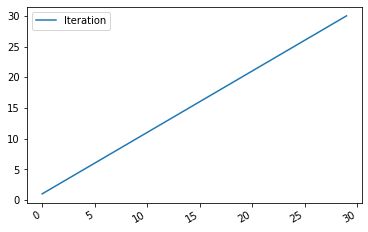

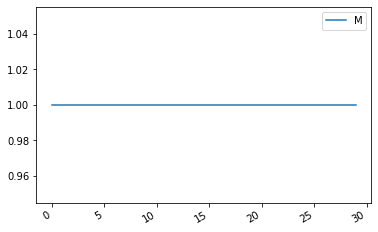

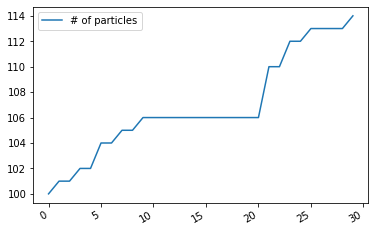

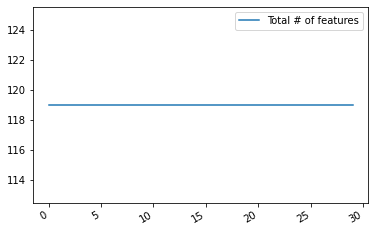

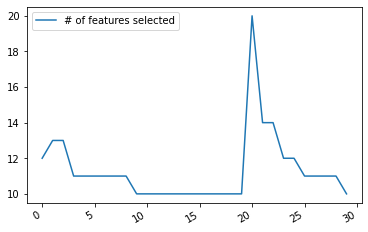

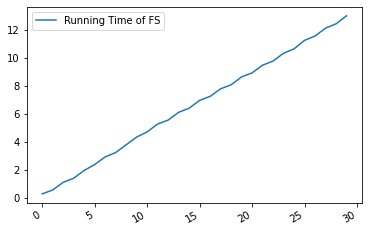

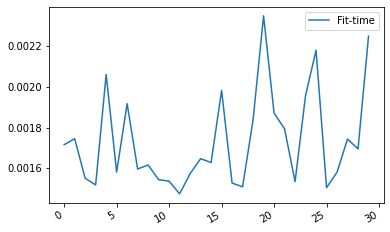

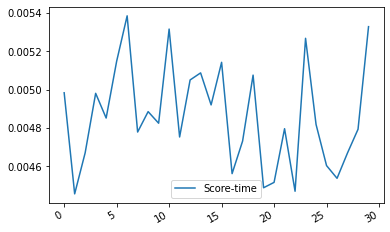

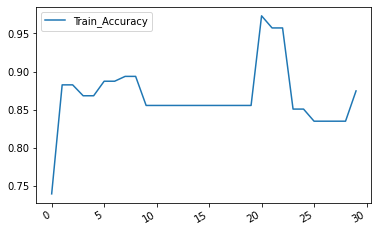

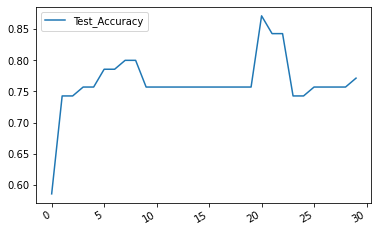

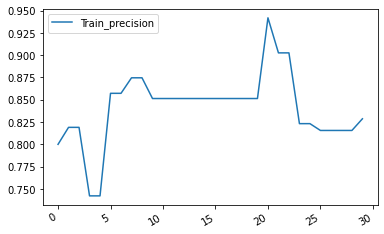

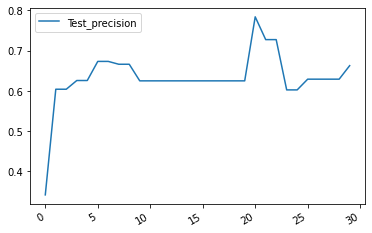

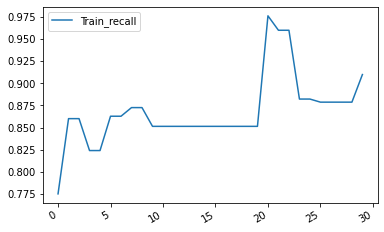

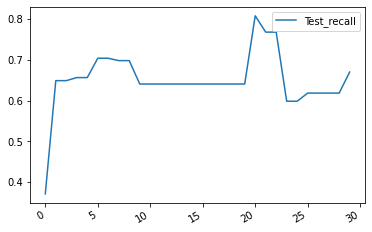

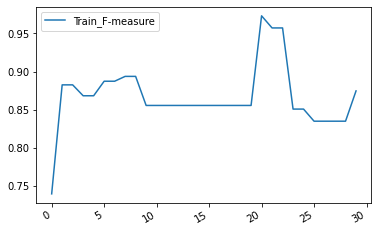

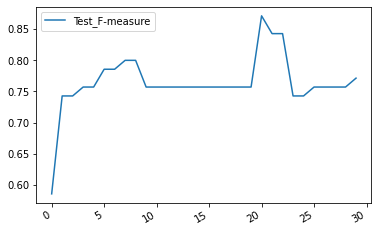

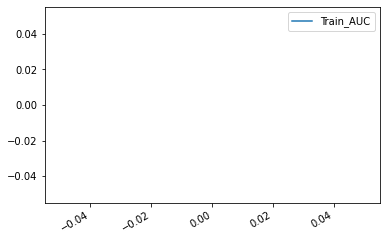

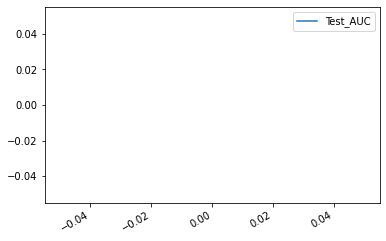

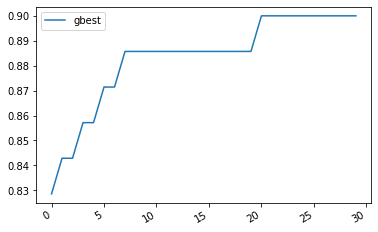

<Figure size 640x480 with 0 Axes>

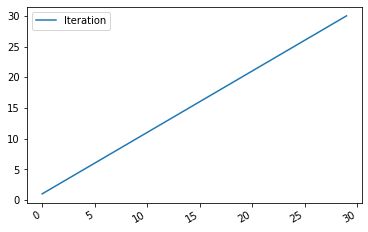

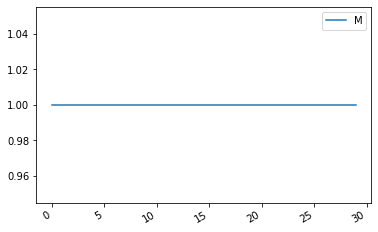

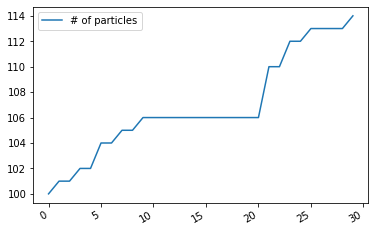

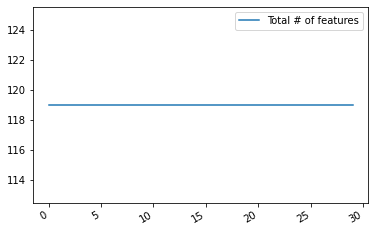

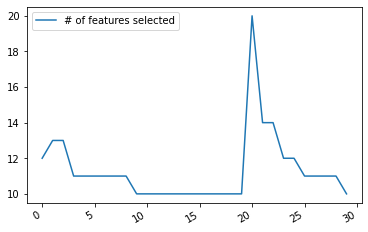

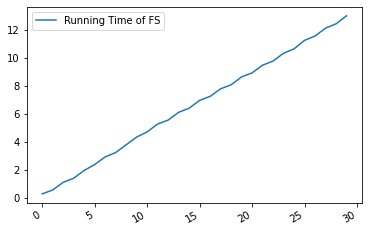

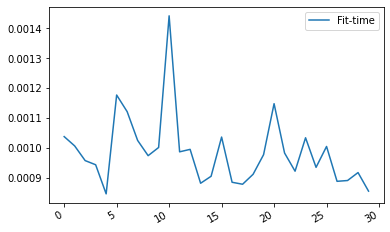

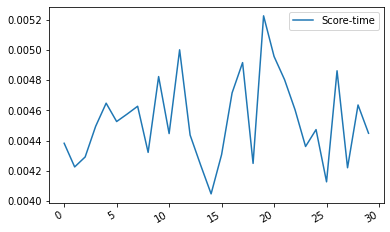

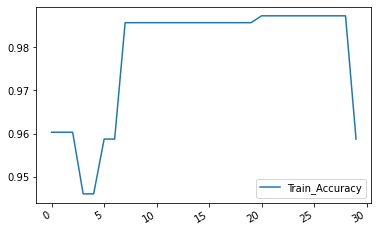

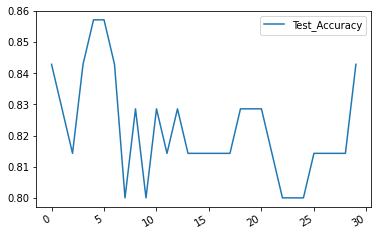

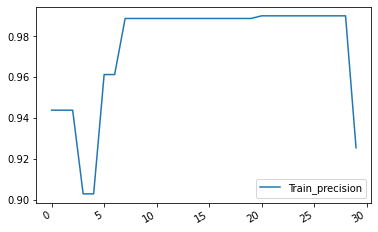

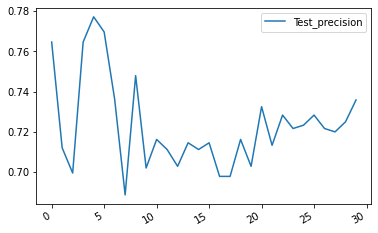

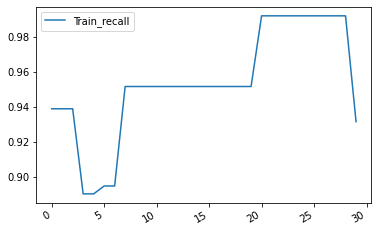

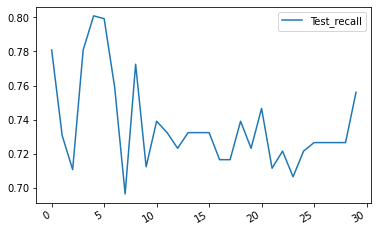

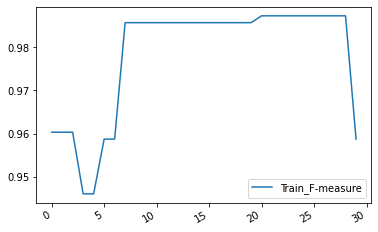

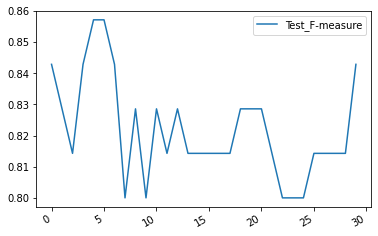

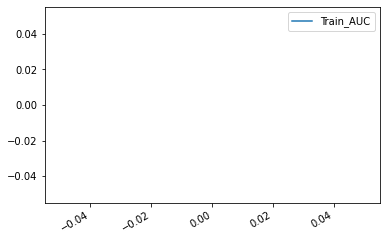

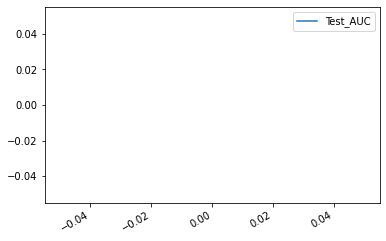

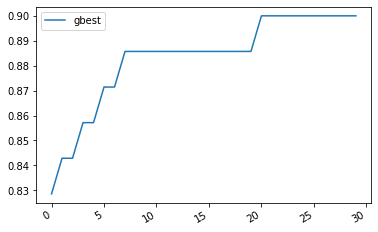

<Figure size 640x480 with 0 Axes>

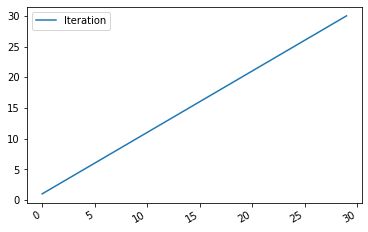

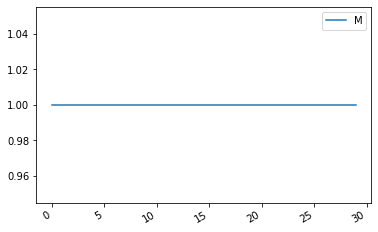

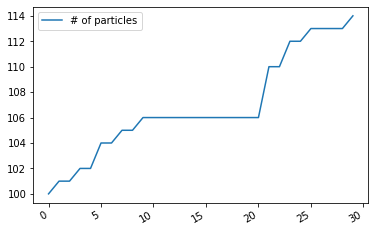

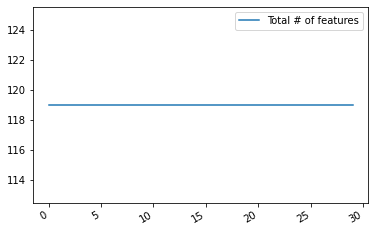

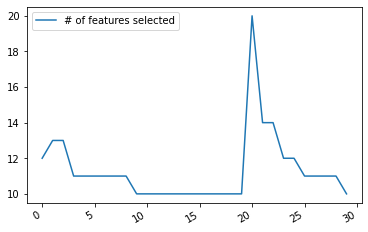

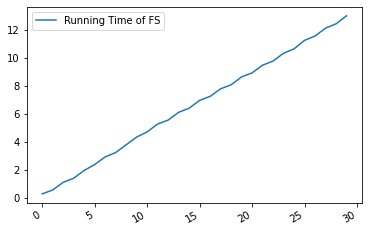

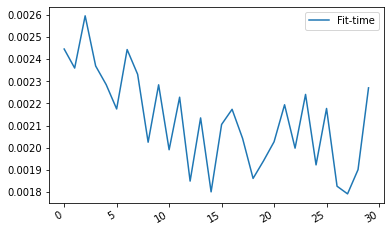

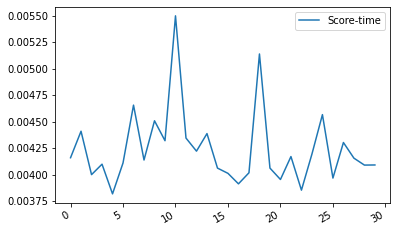

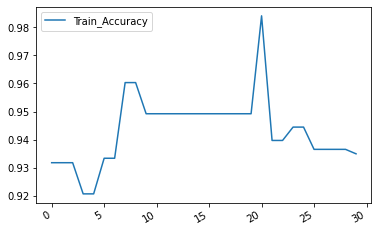

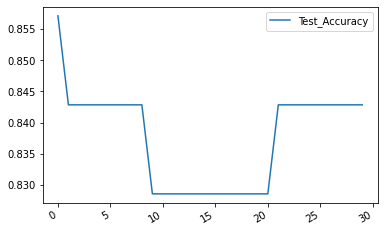

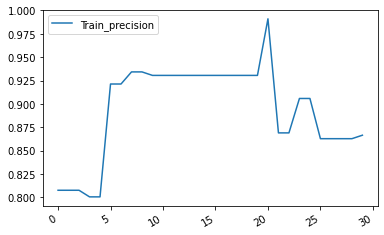

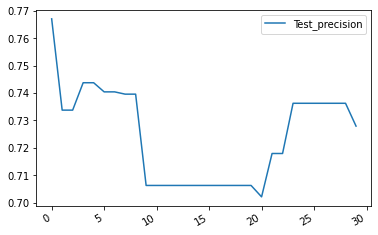

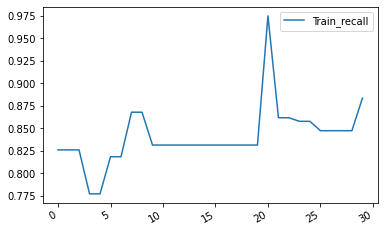

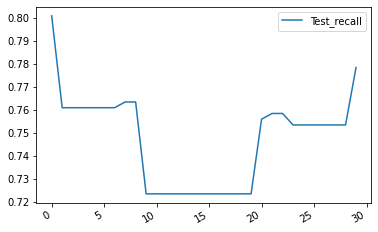

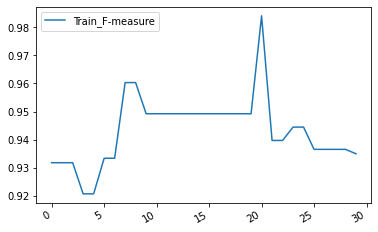

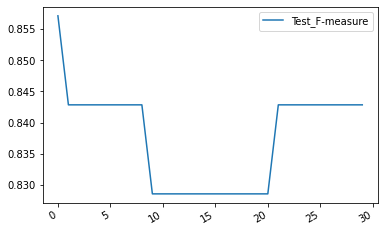

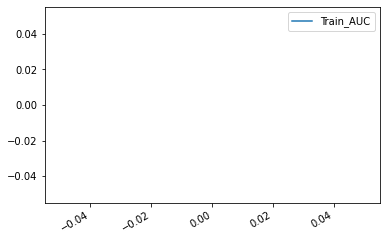

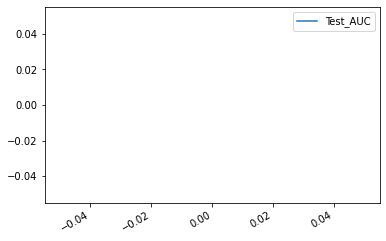

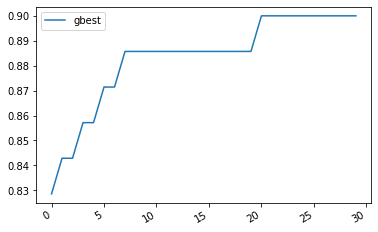

<Figure size 640x480 with 0 Axes>

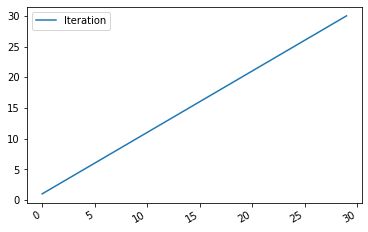

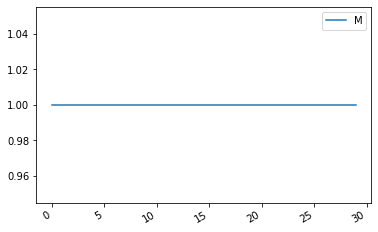

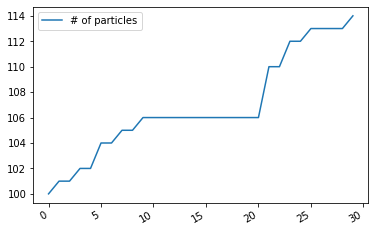

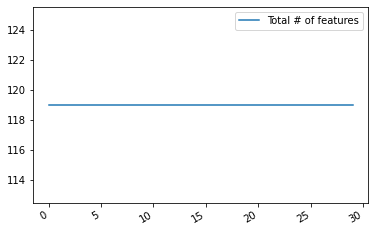

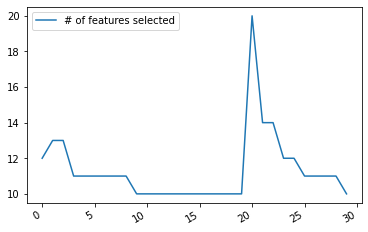

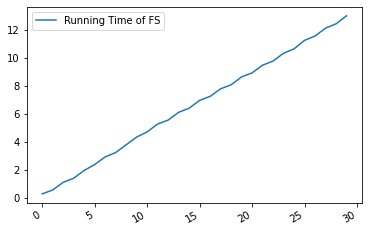

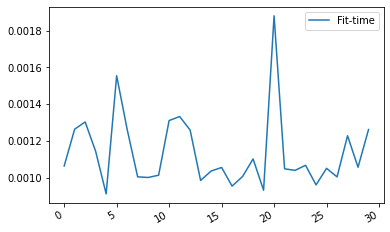

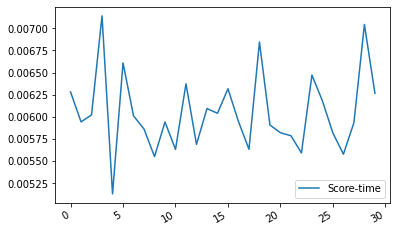

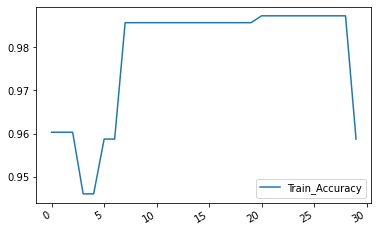

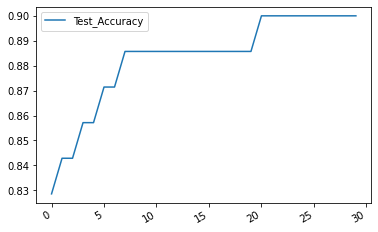

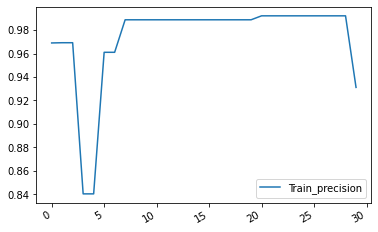

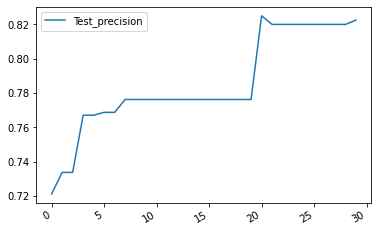

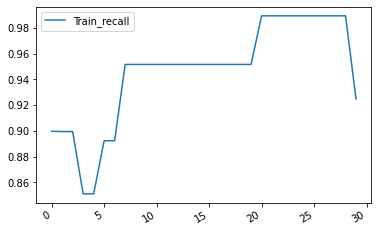

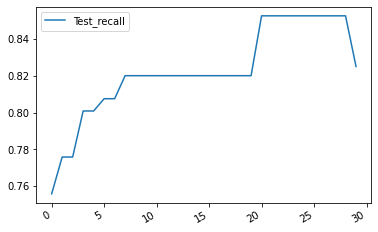

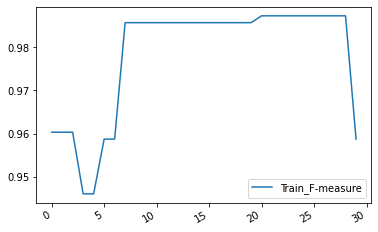

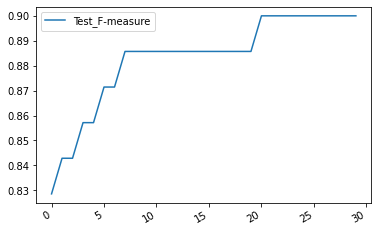

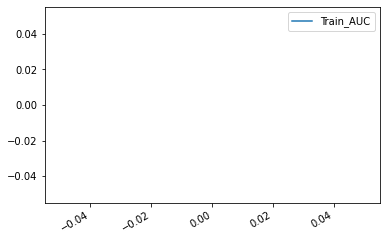

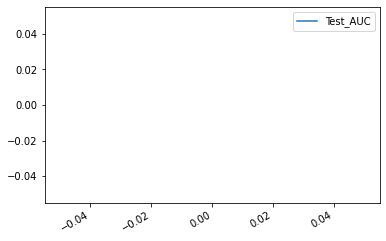

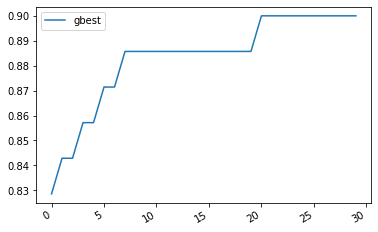

<Figure size 640x480 with 0 Axes>

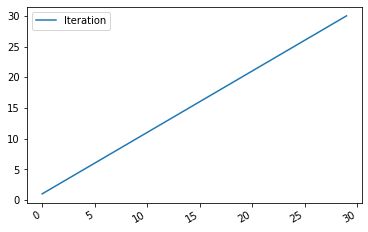

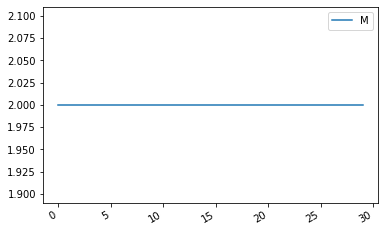

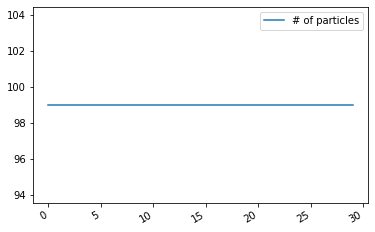

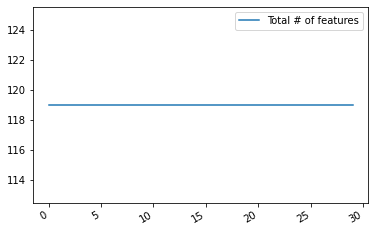

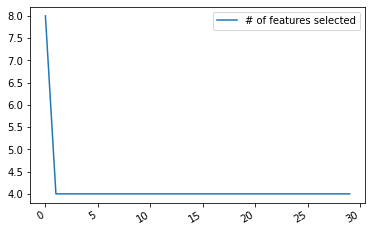

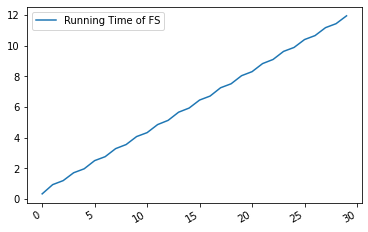

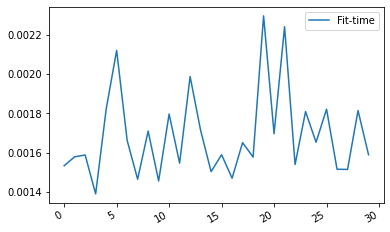

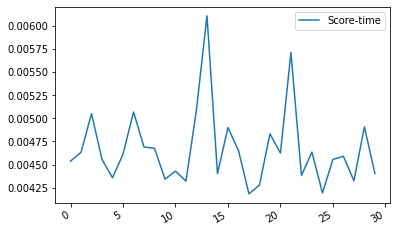

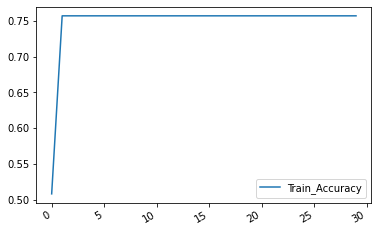

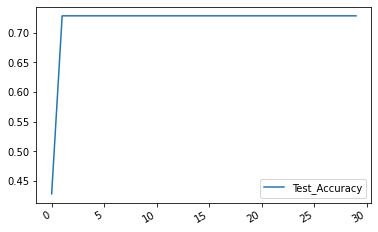

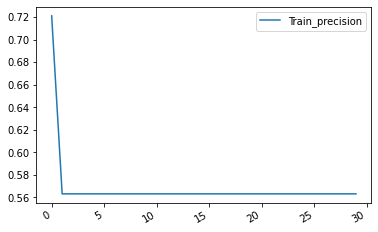

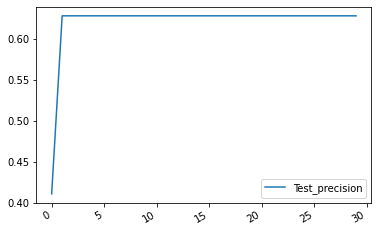

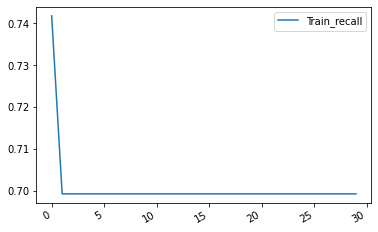

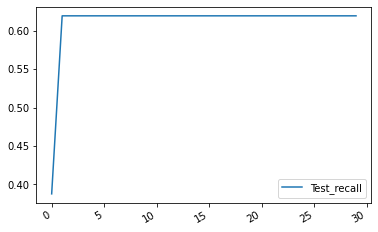

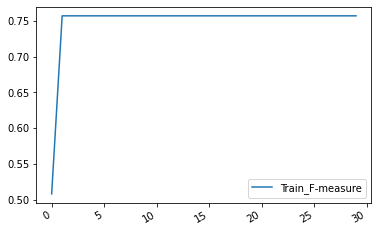

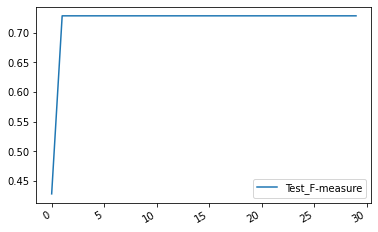

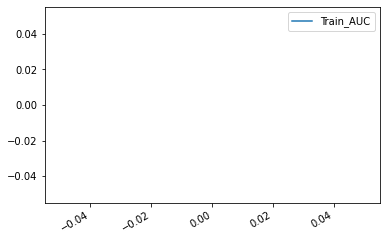

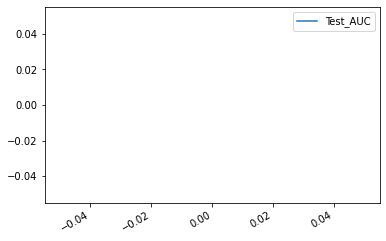

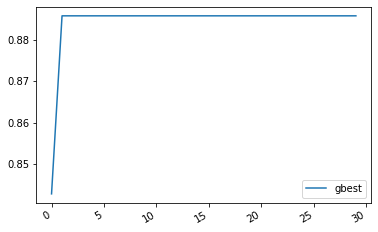

<Figure size 640x480 with 0 Axes>

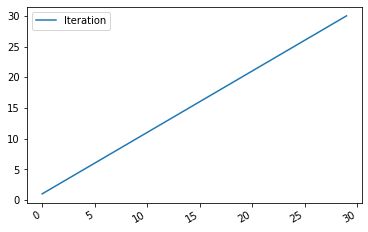

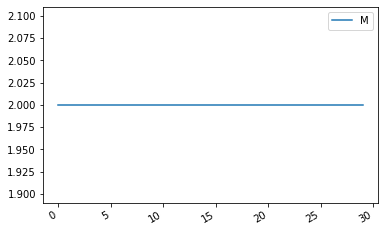

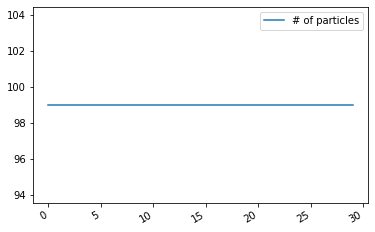

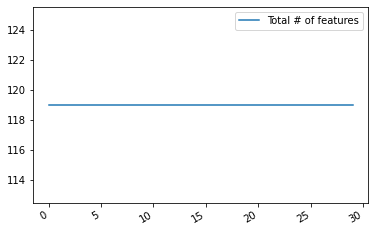

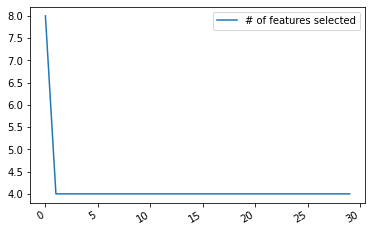

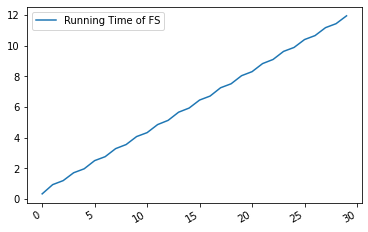

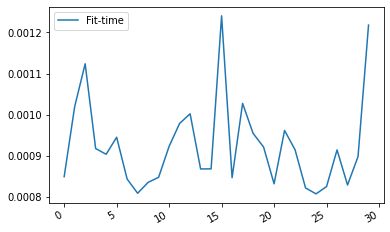

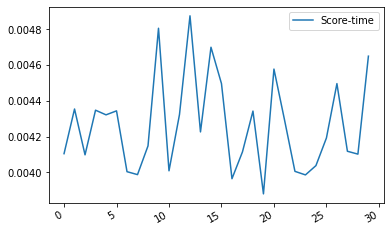

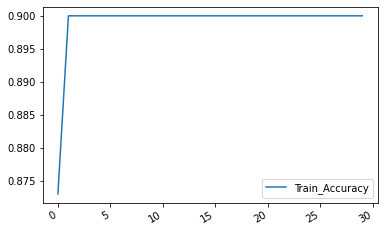

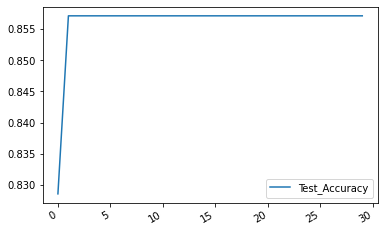

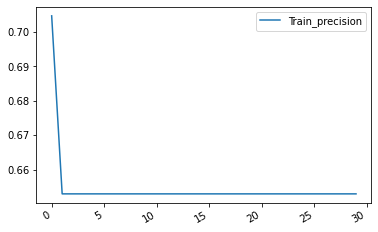

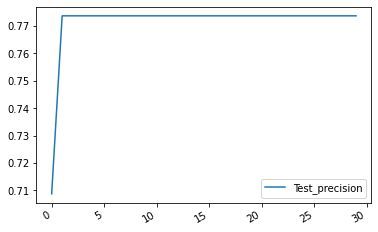

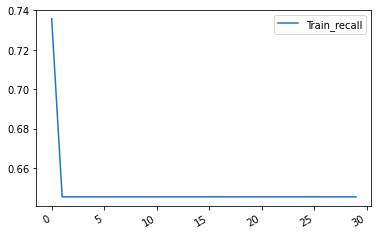

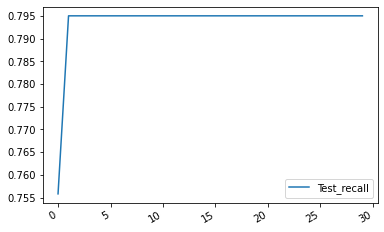

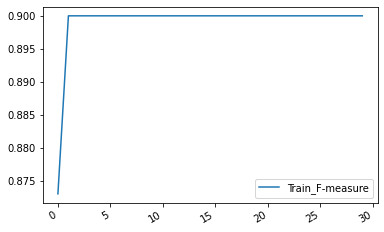

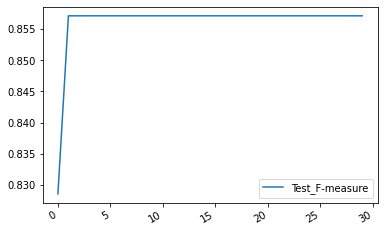

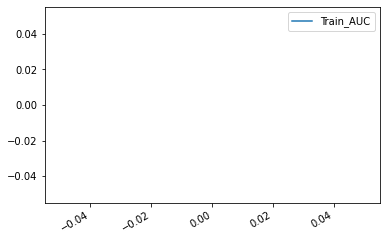

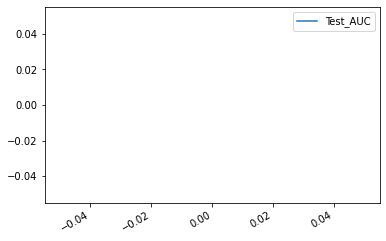

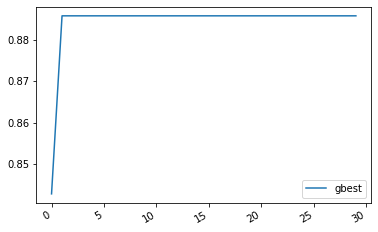

<Figure size 640x480 with 0 Axes>

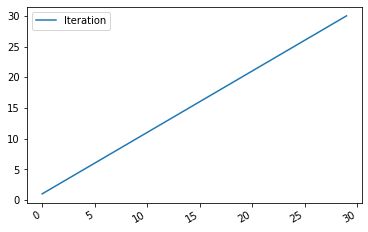

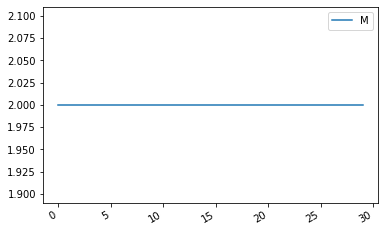

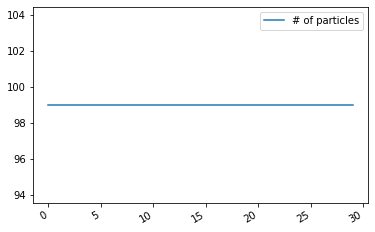

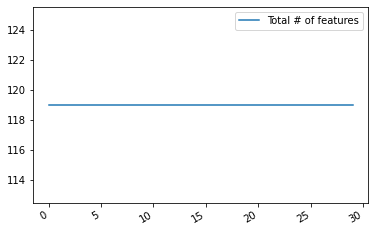

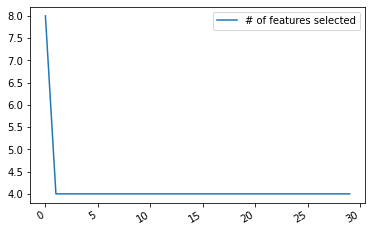

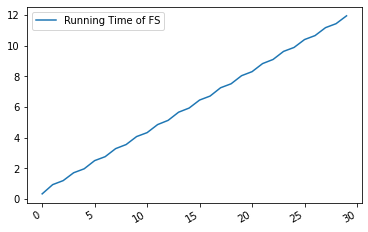

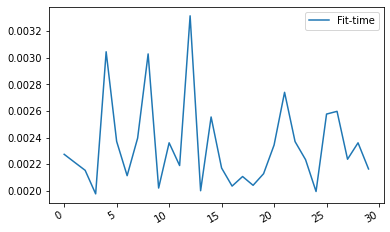

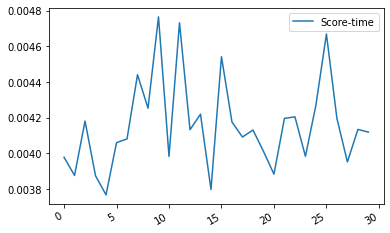

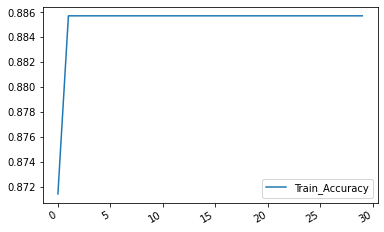

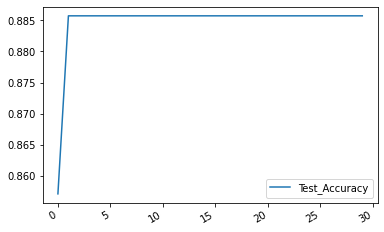

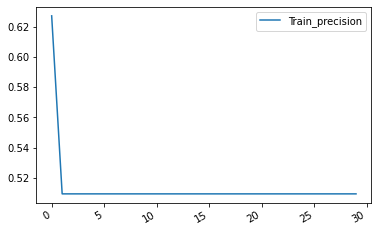

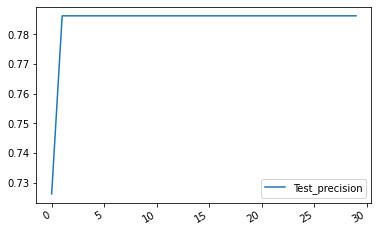

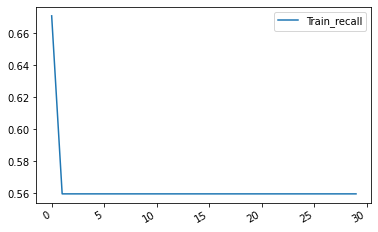

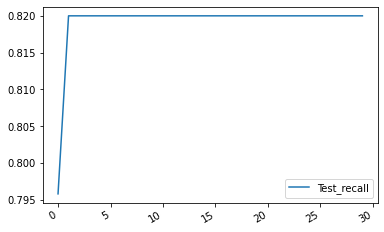

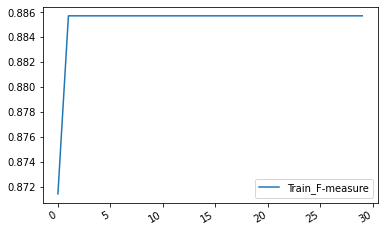

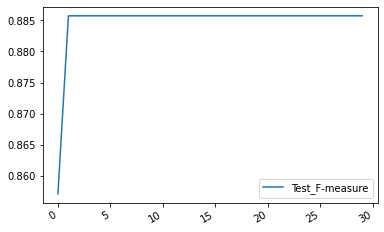

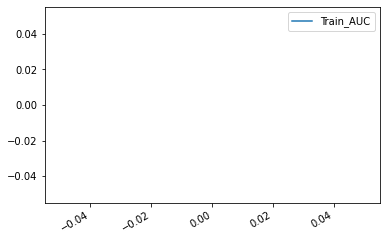

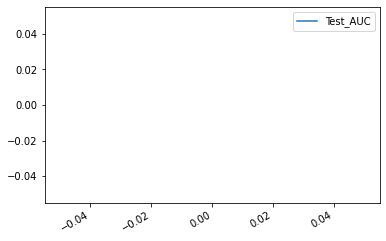

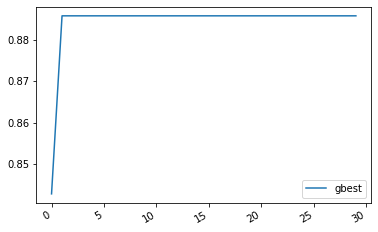

<Figure size 640x480 with 0 Axes>

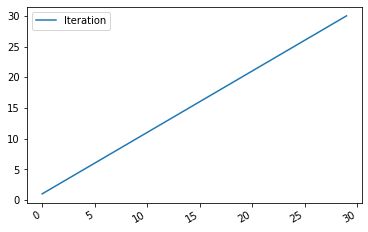

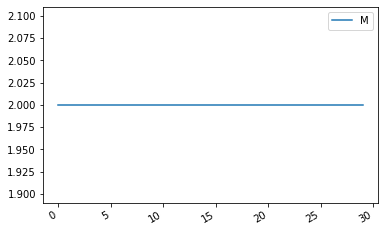

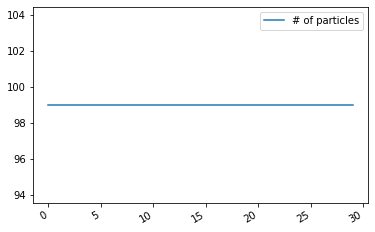

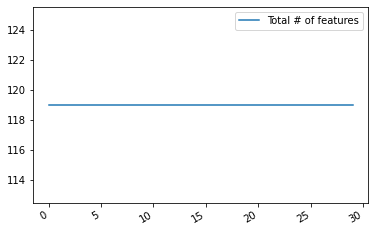

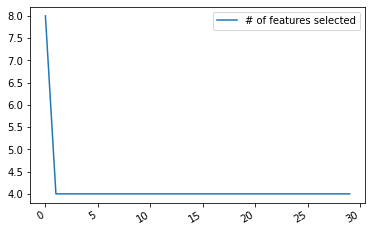

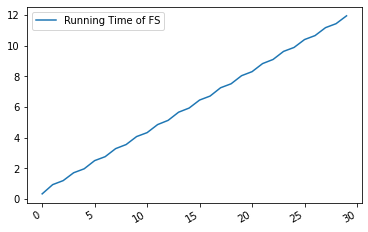

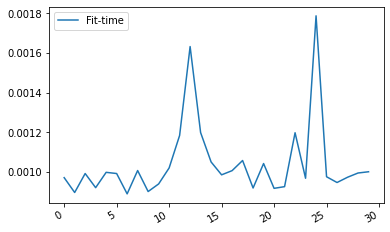

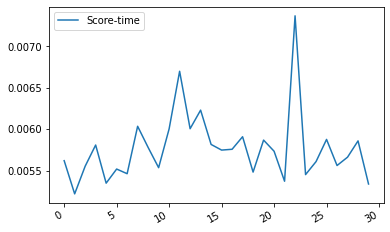

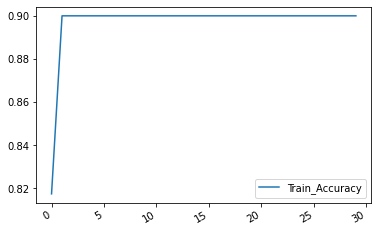

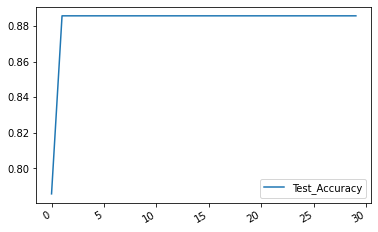

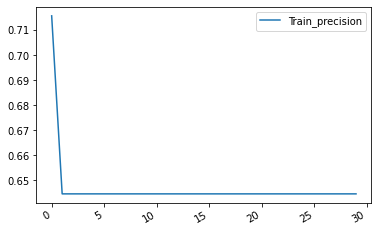

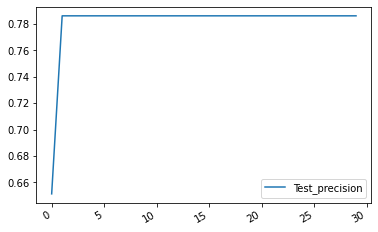

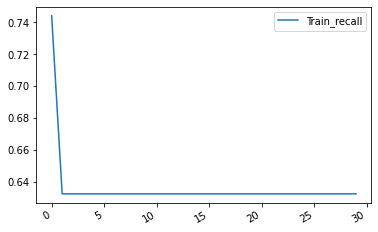

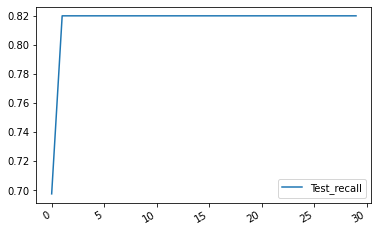

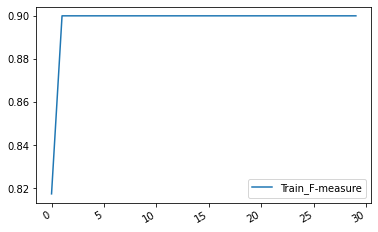

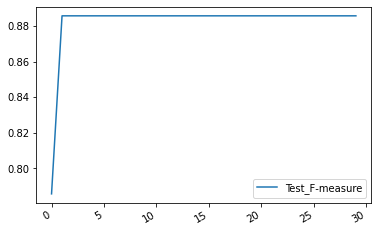

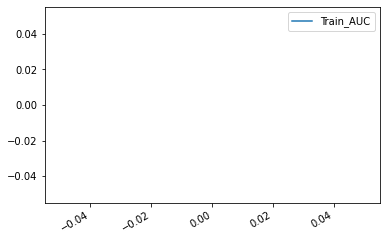

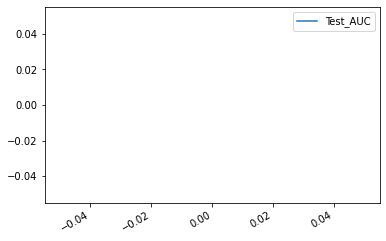

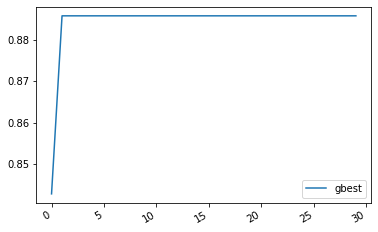

<Figure size 640x480 with 0 Axes>

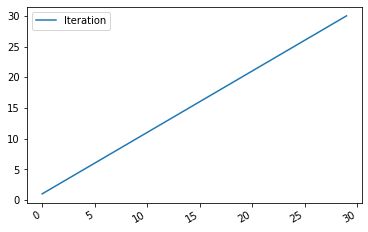

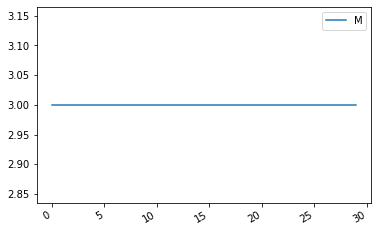

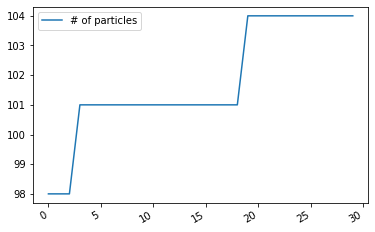

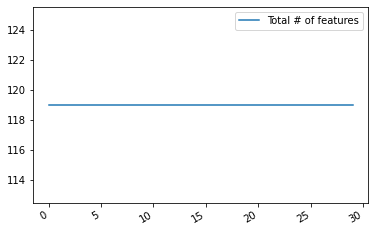

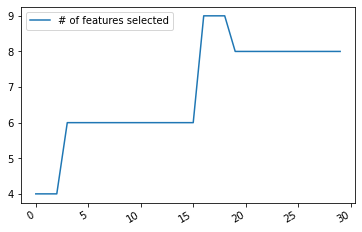

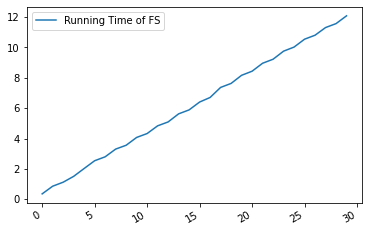

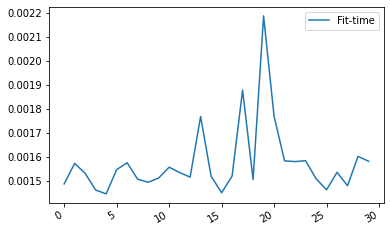

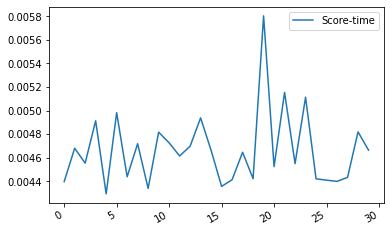

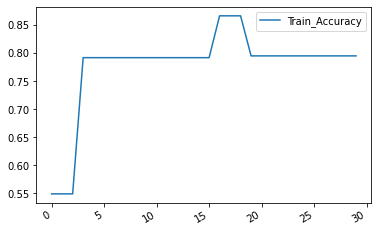

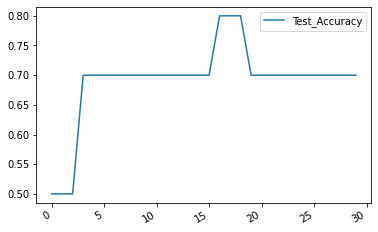

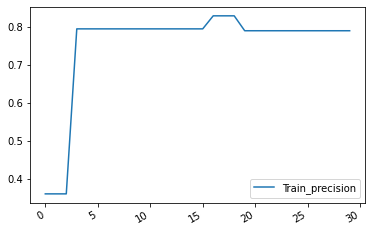

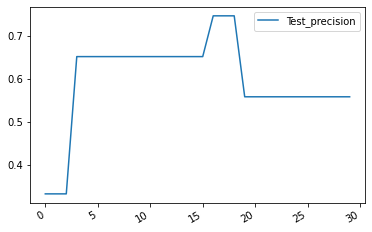

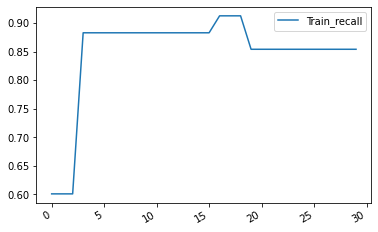

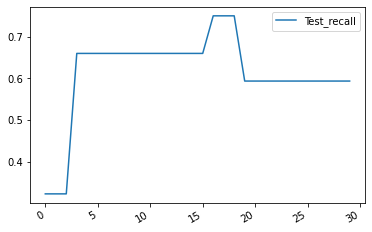

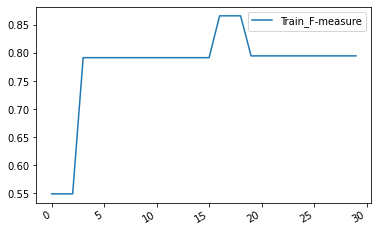

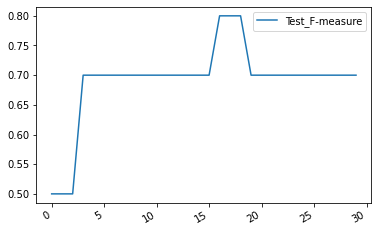

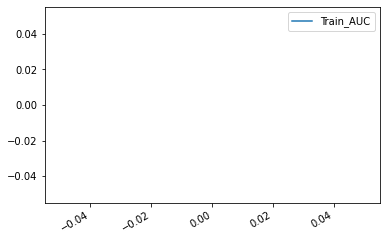

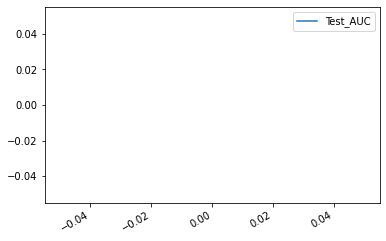

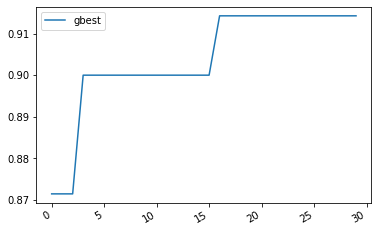

<Figure size 640x480 with 0 Axes>

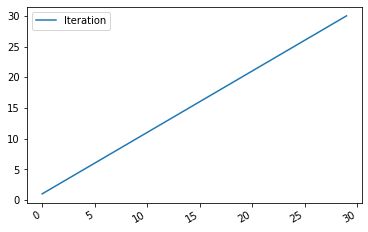

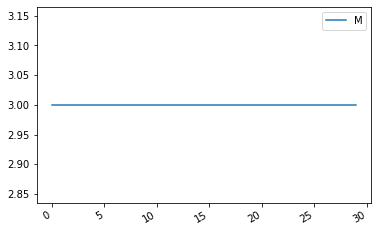

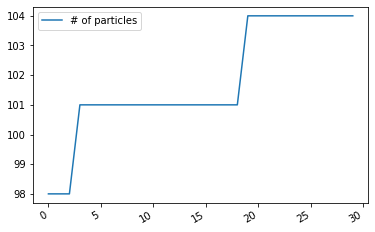

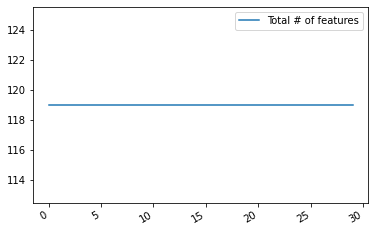

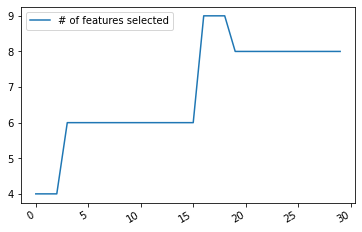

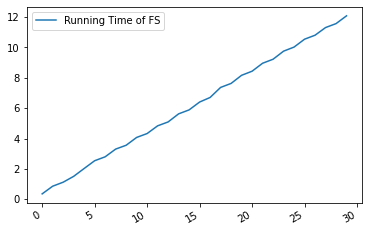

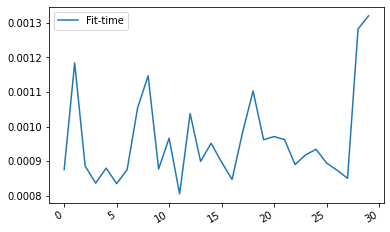

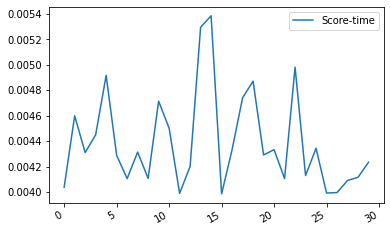

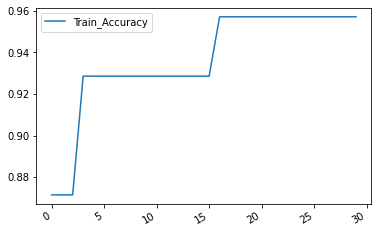

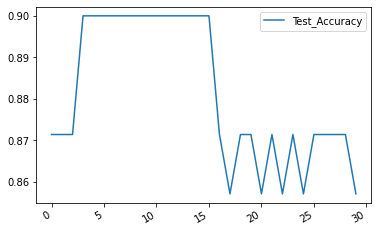

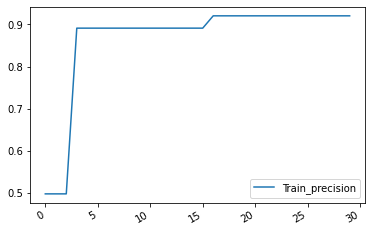

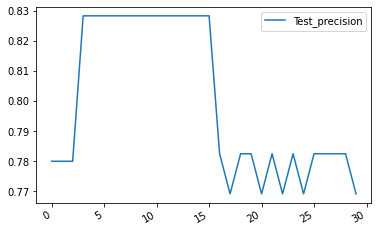

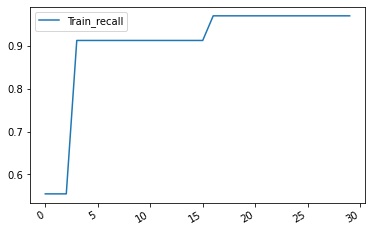

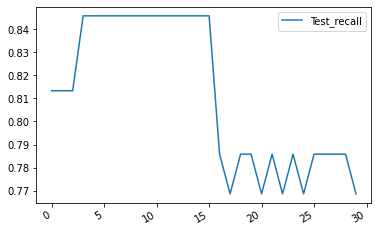

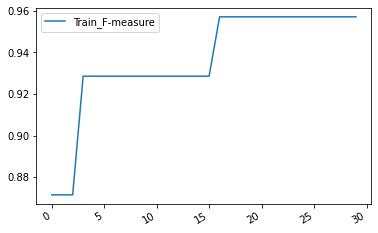

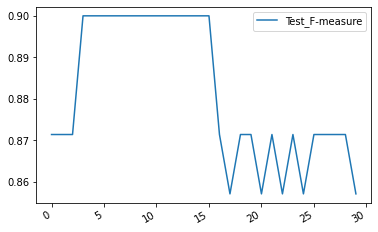

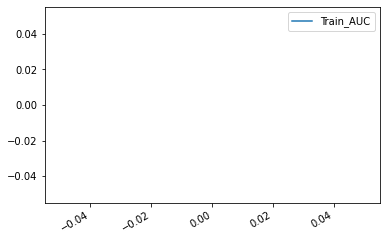

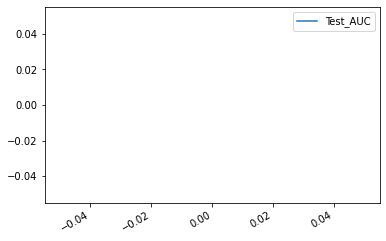

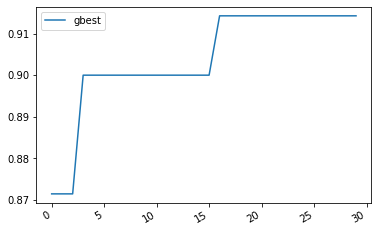

<Figure size 640x480 with 0 Axes>

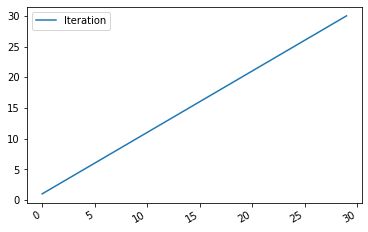

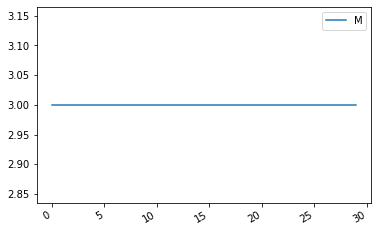

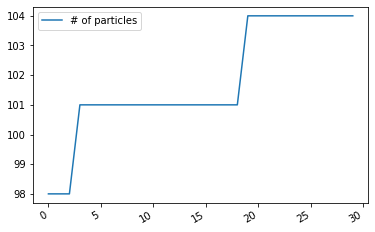

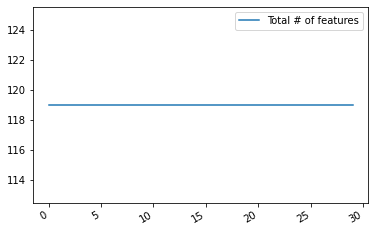

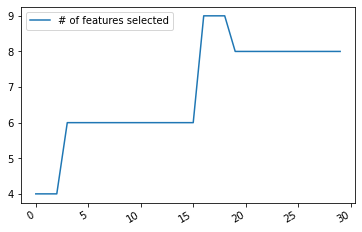

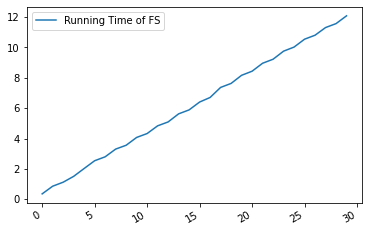

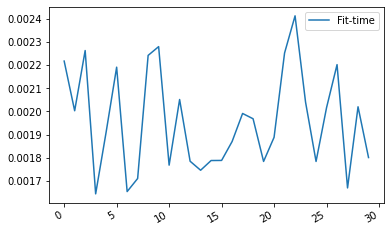

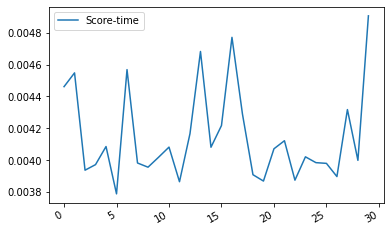

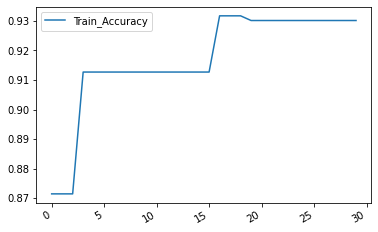

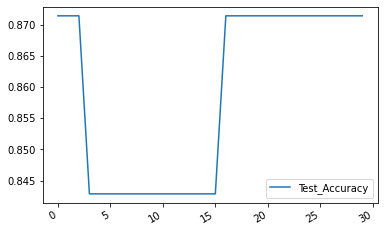

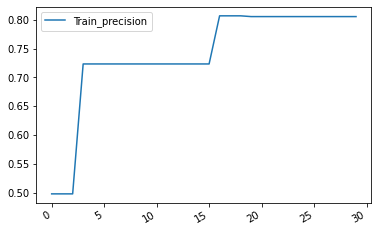

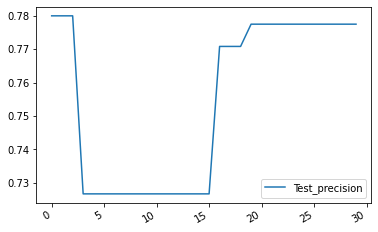

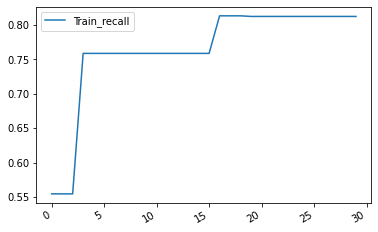

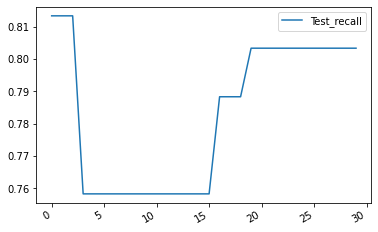

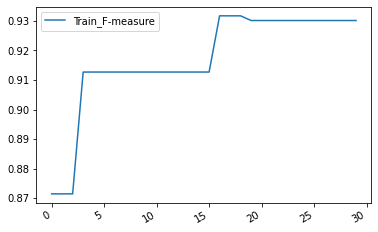

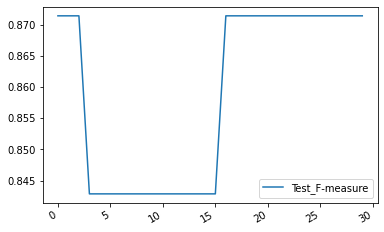

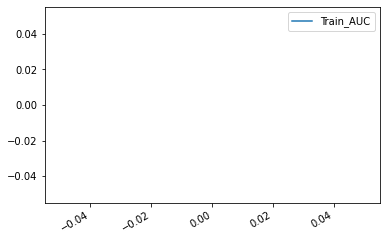

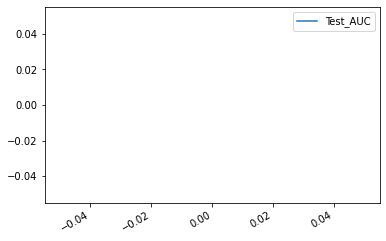

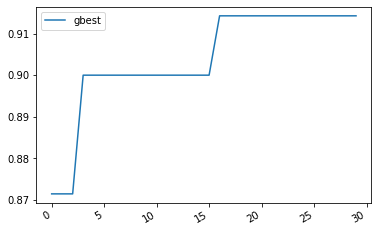

<Figure size 640x480 with 0 Axes>

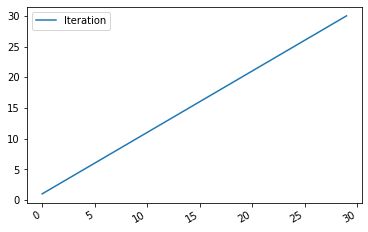

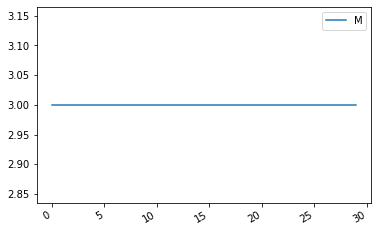

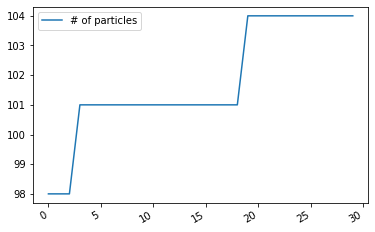

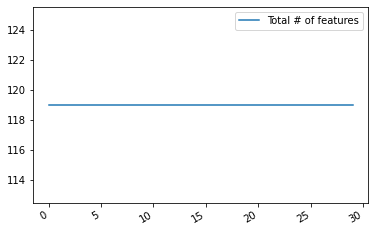

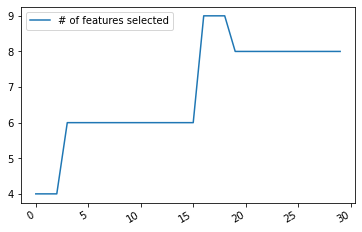

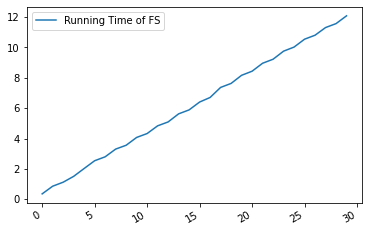

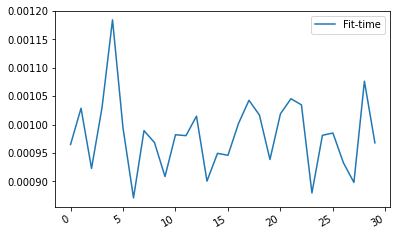

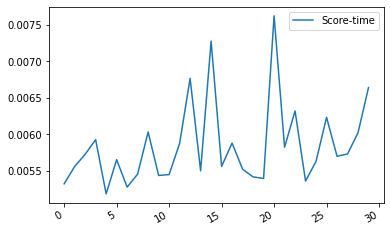

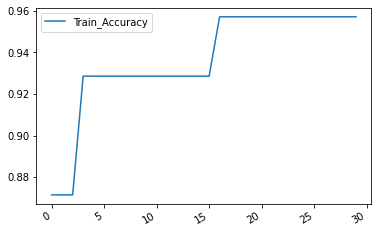

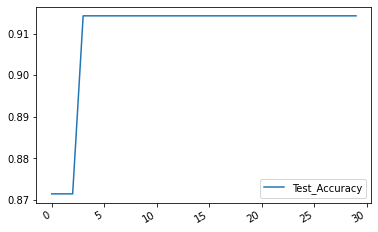

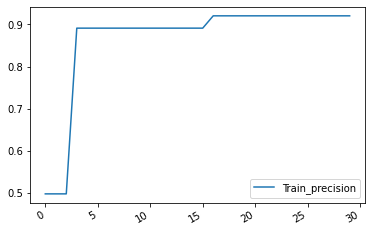

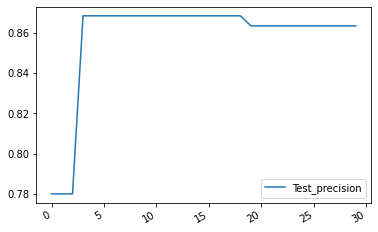

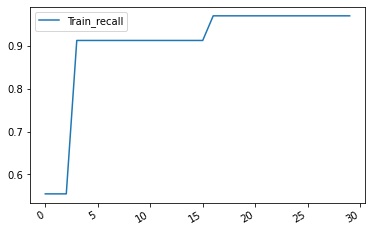

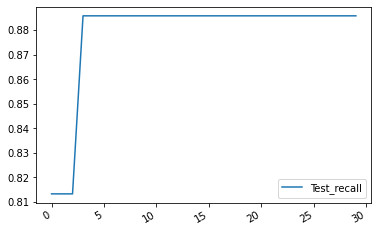

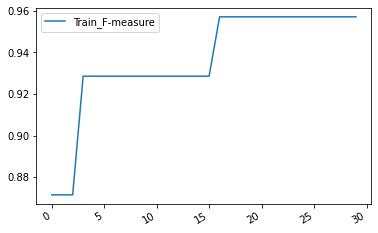

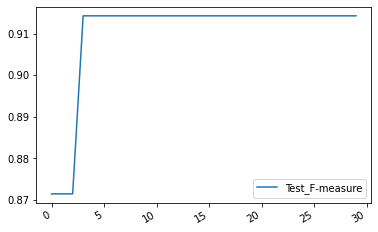

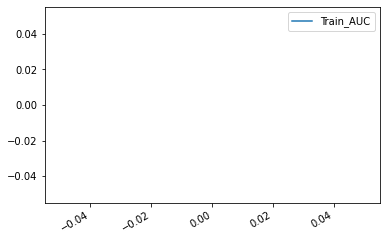

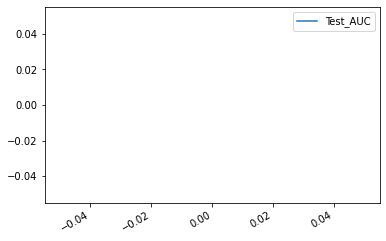

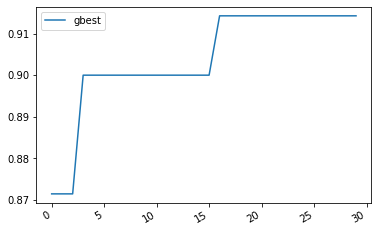

<Figure size 640x480 with 0 Axes>

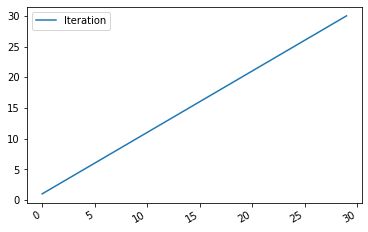

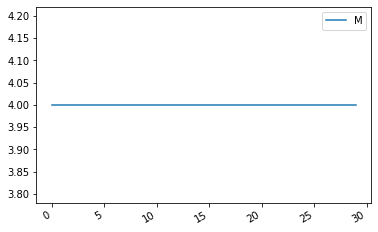

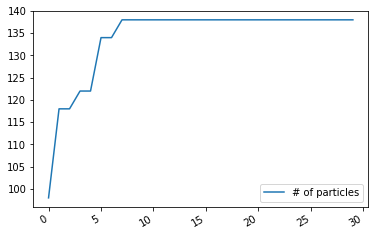

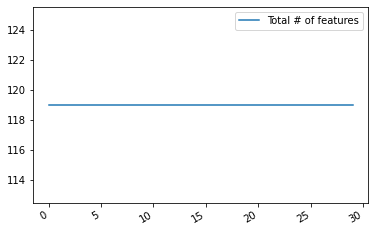

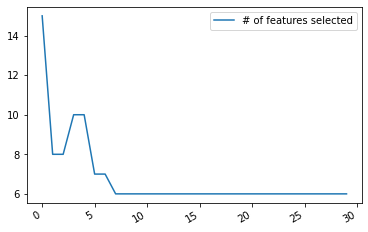

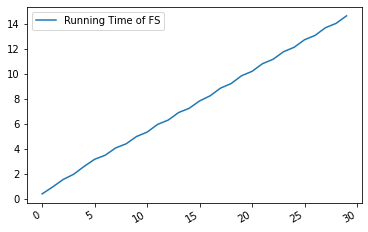

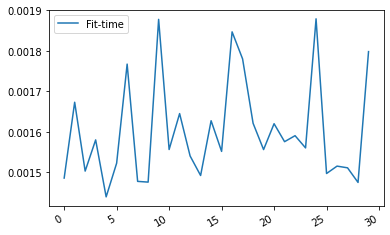

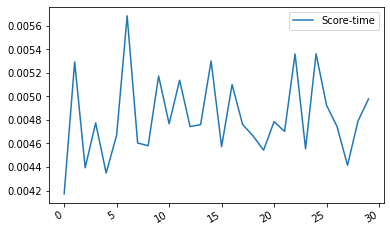

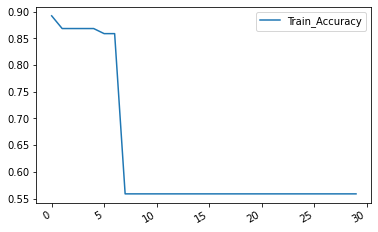

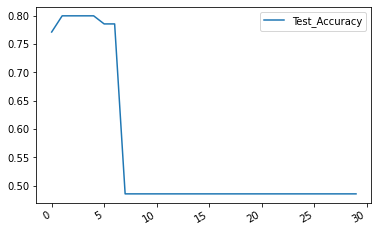

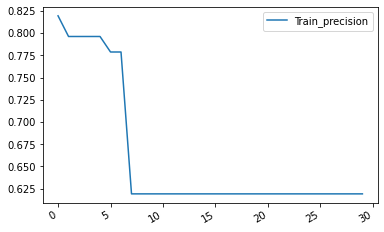

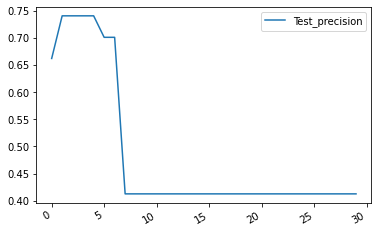

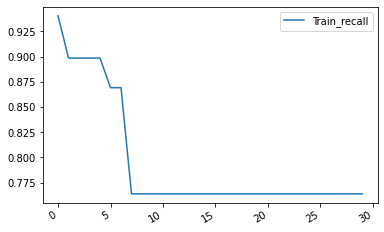

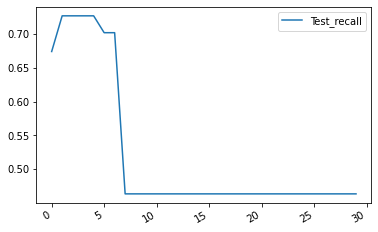

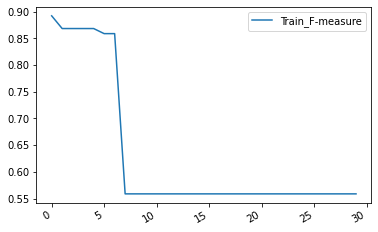

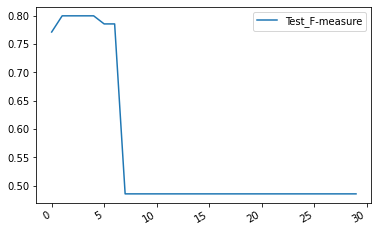

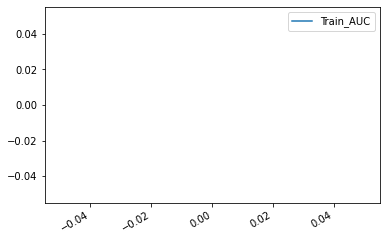

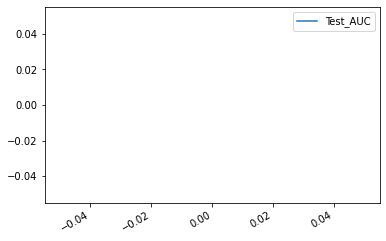

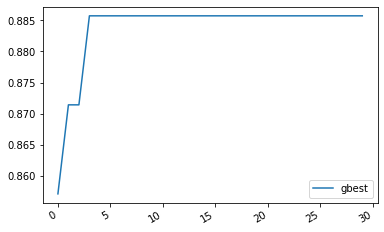

<Figure size 640x480 with 0 Axes>

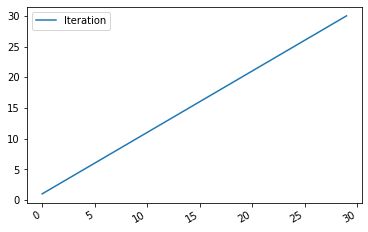

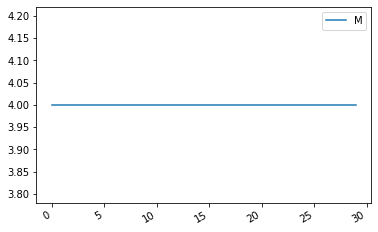

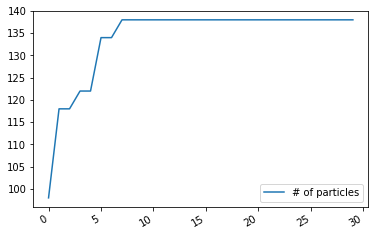

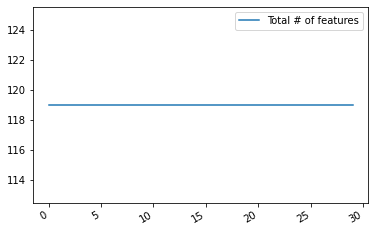

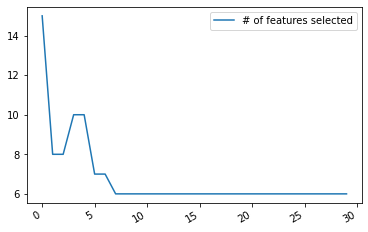

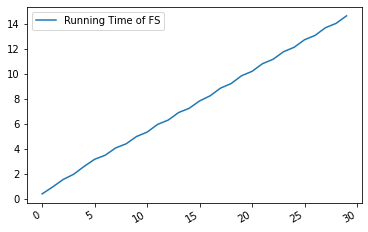

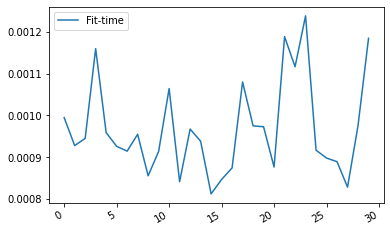

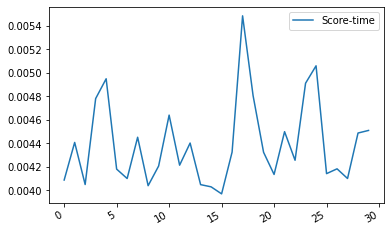

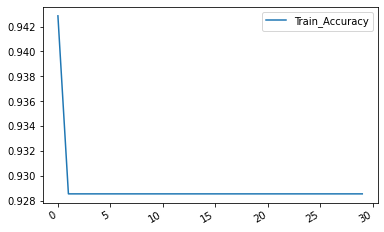

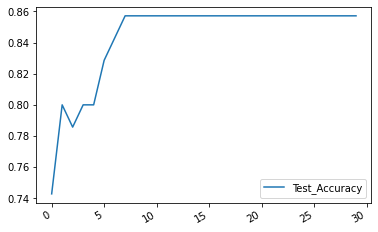

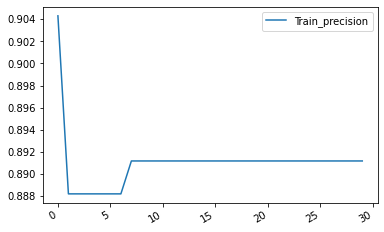

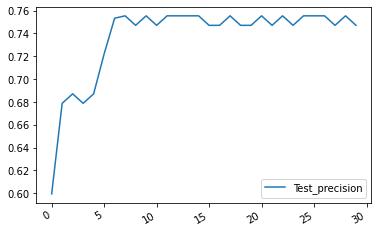

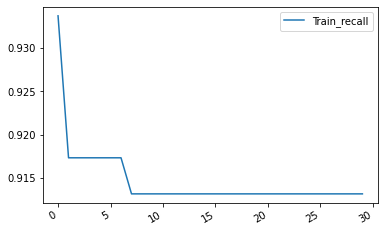

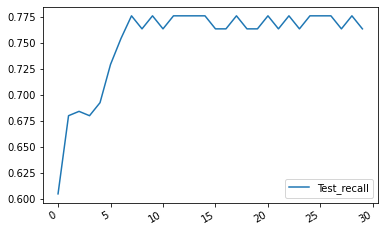

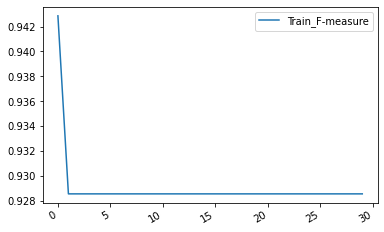

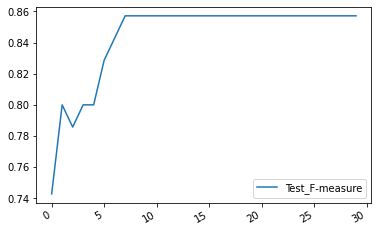

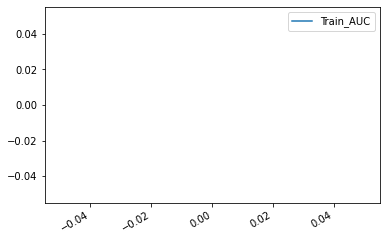

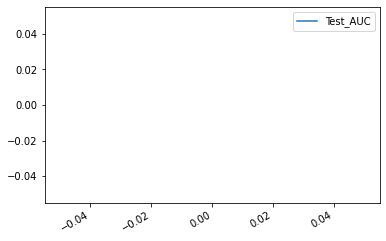

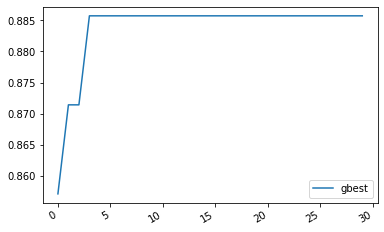

<Figure size 640x480 with 0 Axes>

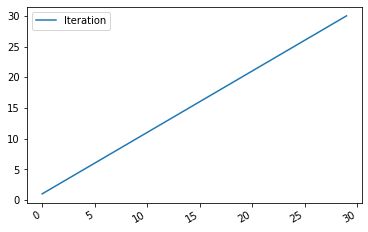

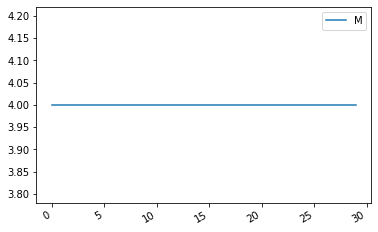

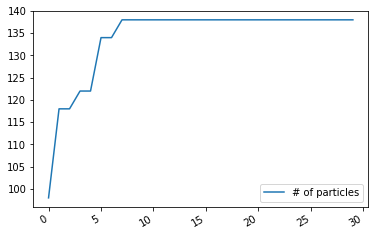

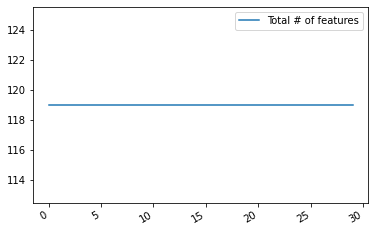

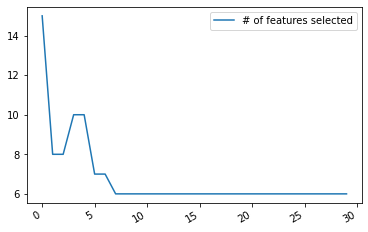

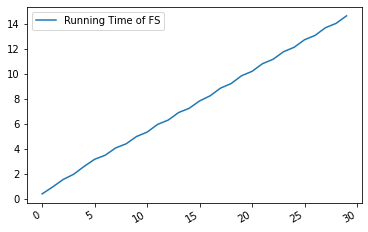

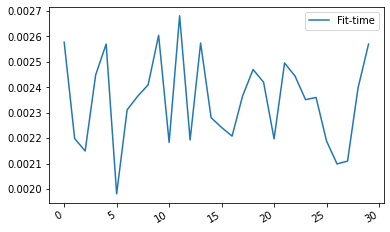

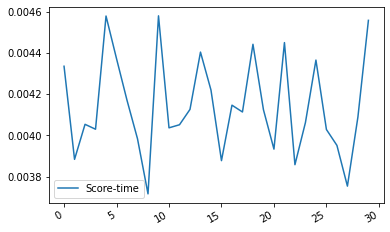

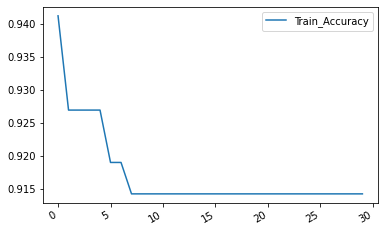

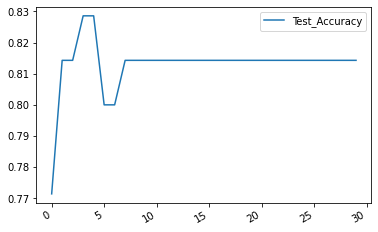

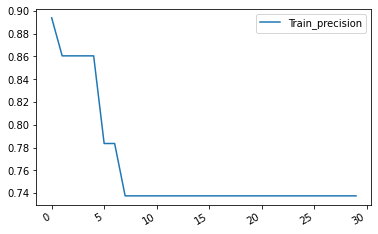

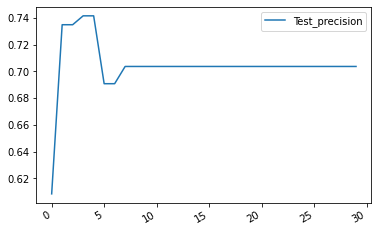

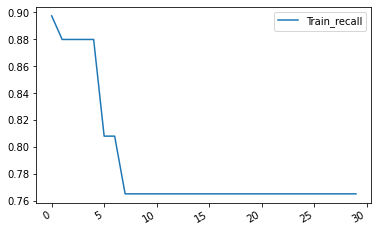

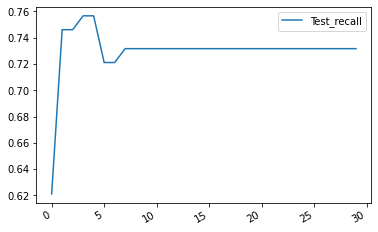

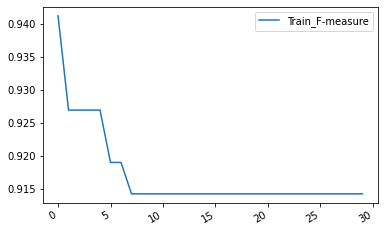

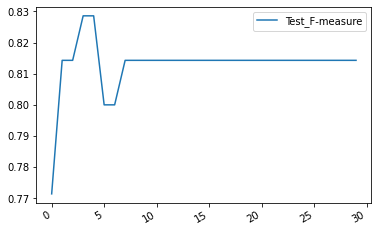

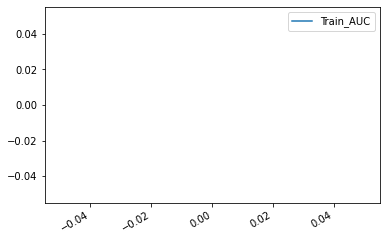

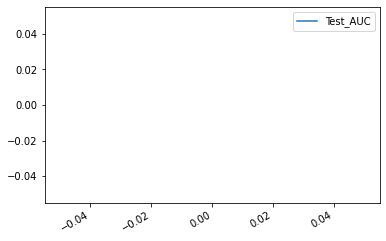

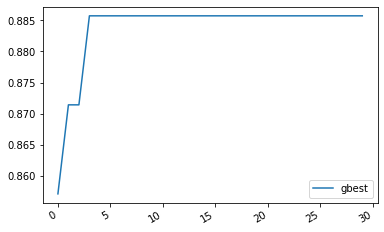

<Figure size 640x480 with 0 Axes>

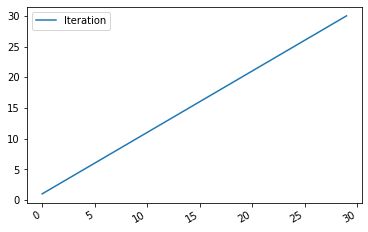

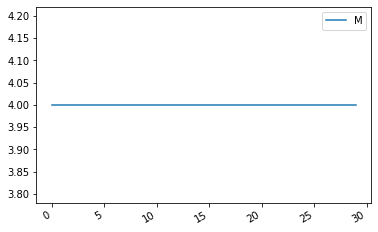

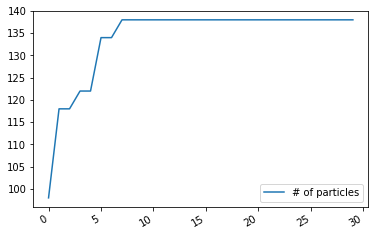

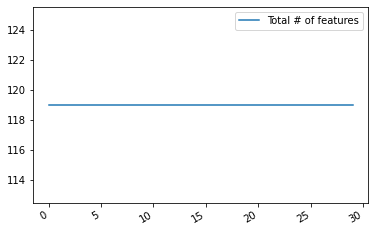

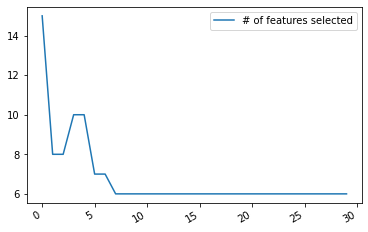

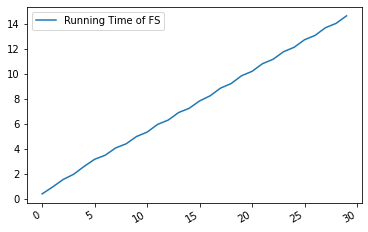

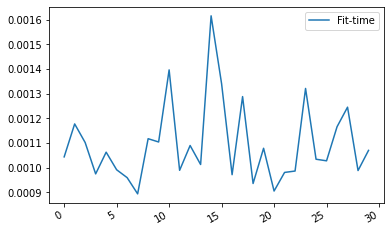

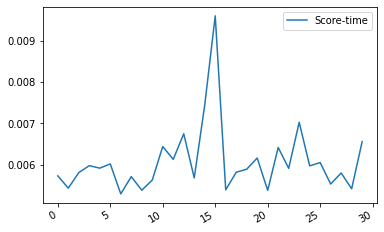

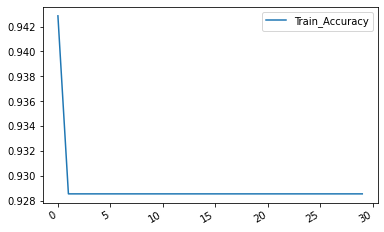

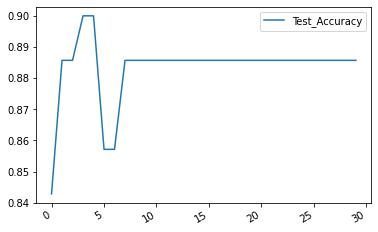

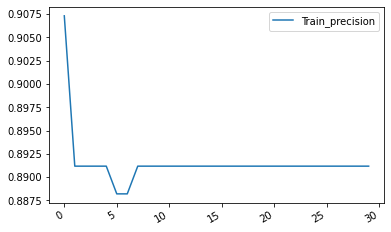

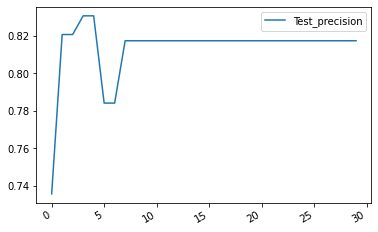

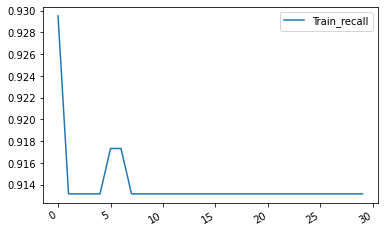

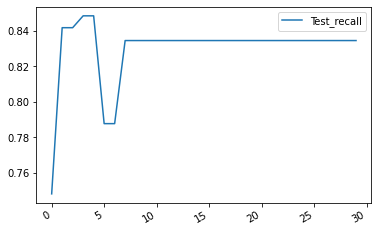

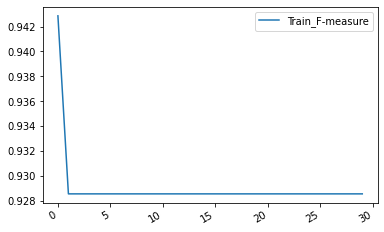

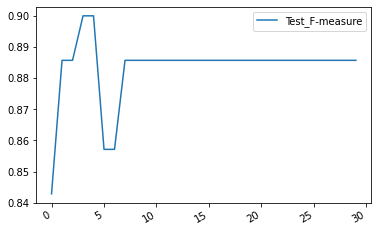

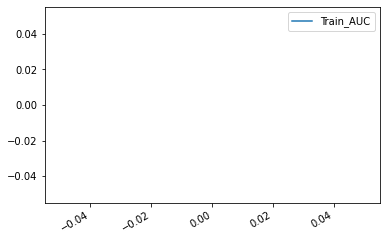

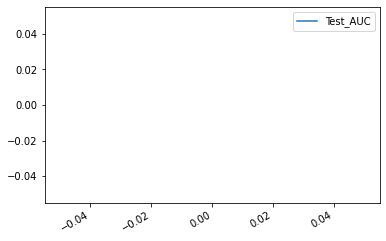

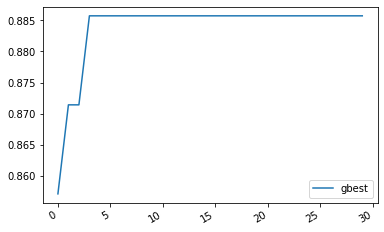

<Figure size 640x480 with 0 Axes>

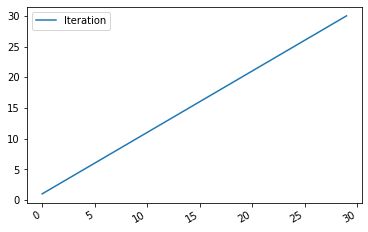

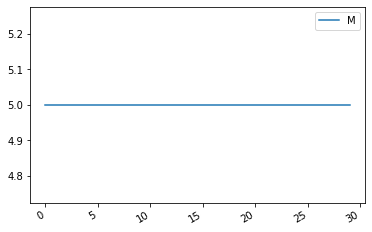

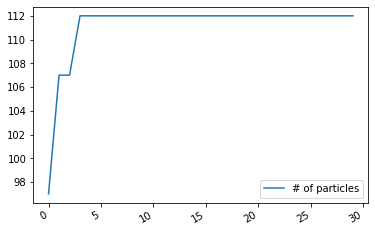

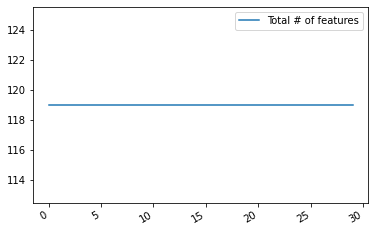

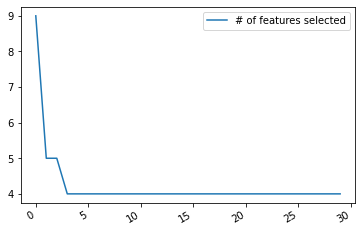

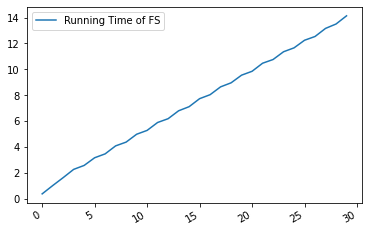

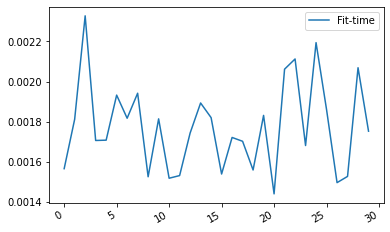

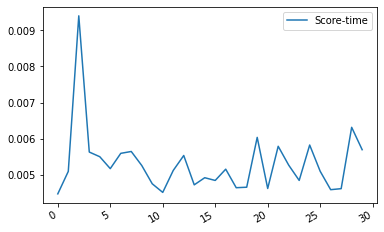

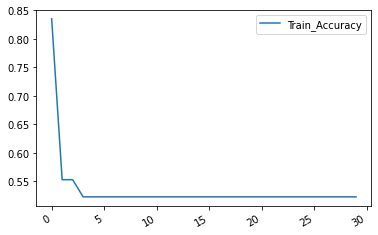

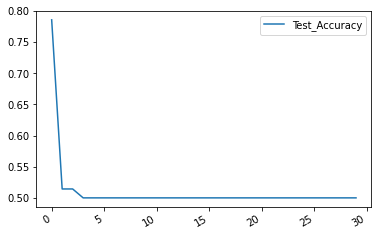

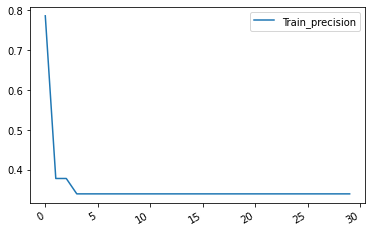

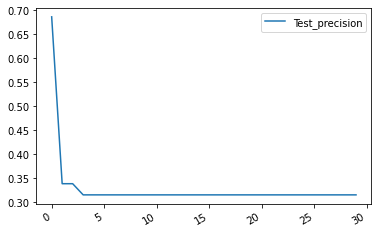

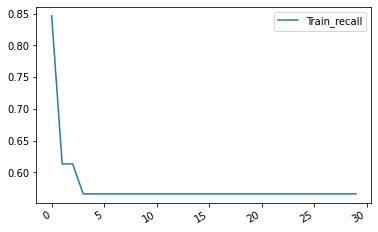

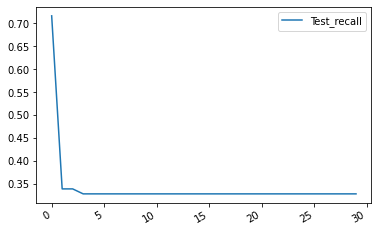

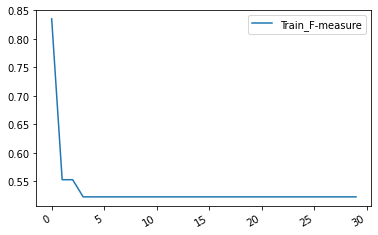

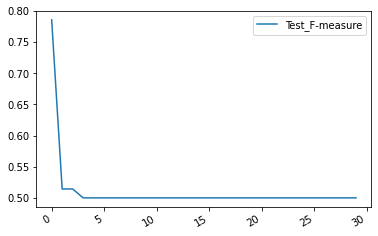

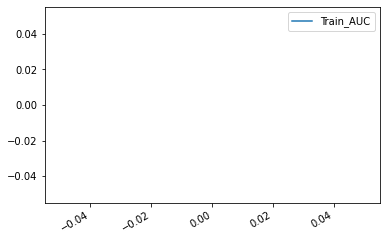

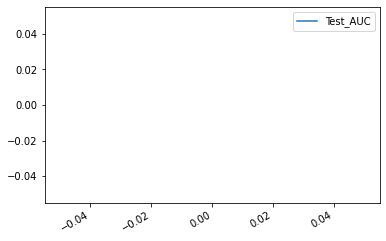

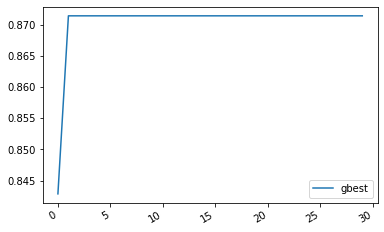

<Figure size 640x480 with 0 Axes>

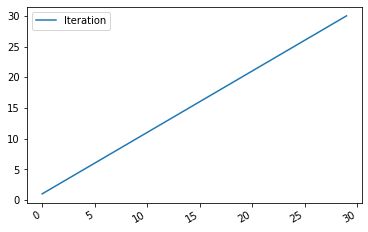

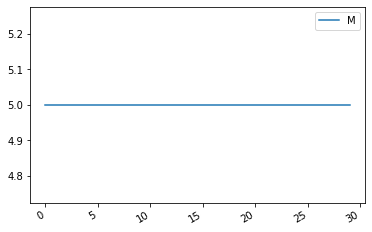

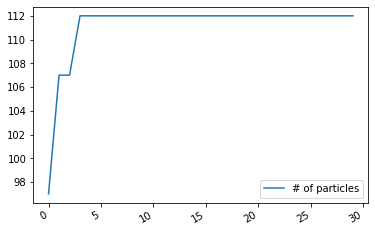

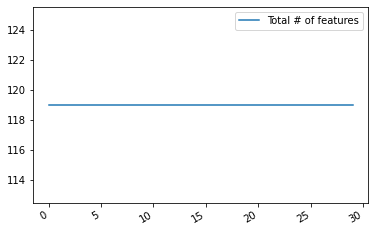

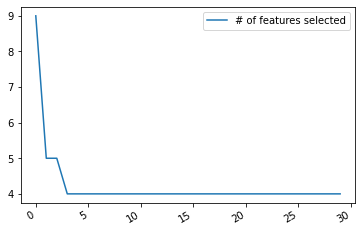

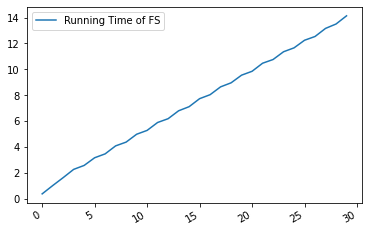

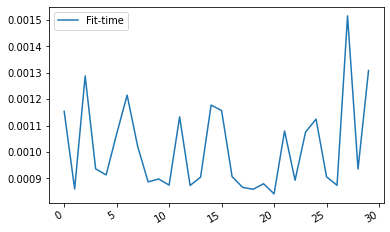

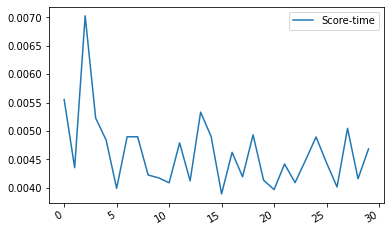

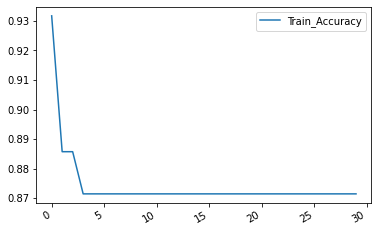

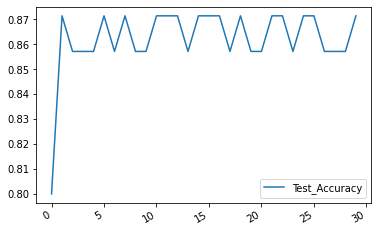

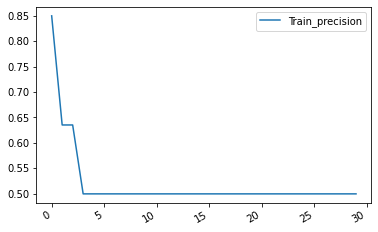

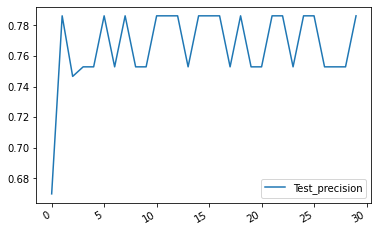

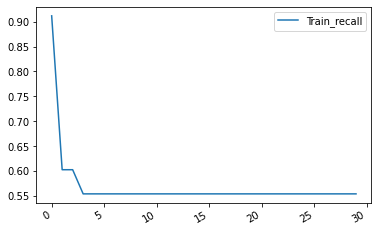

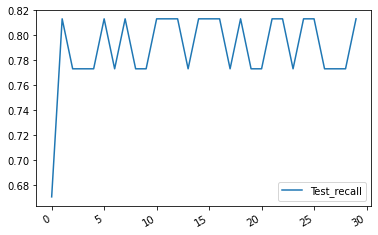

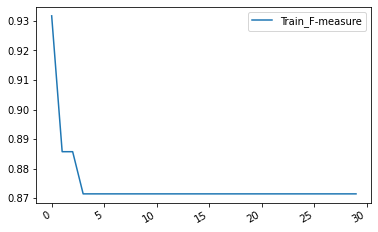

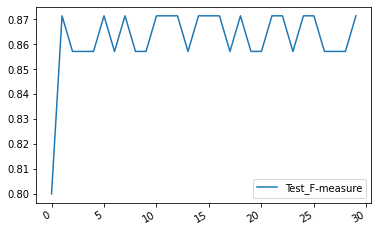

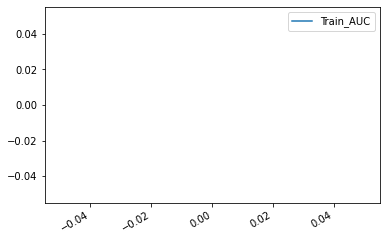

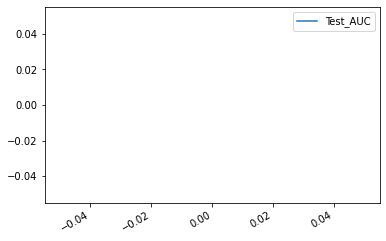

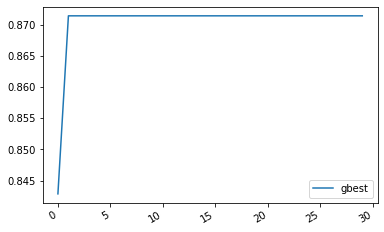

<Figure size 640x480 with 0 Axes>

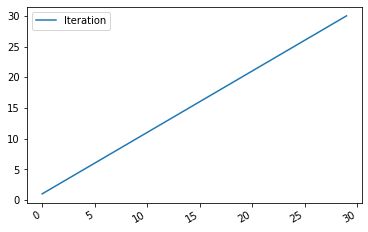

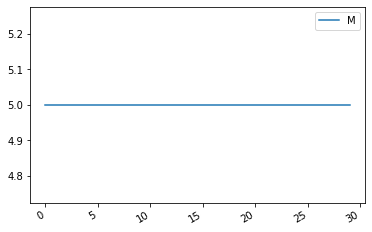

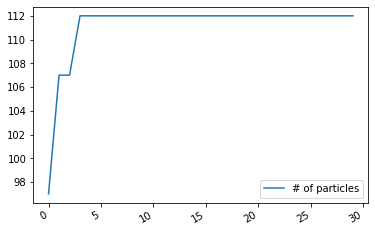

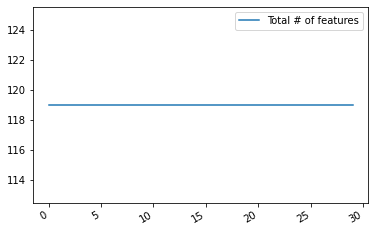

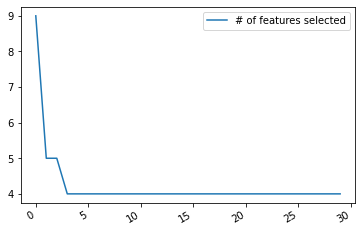

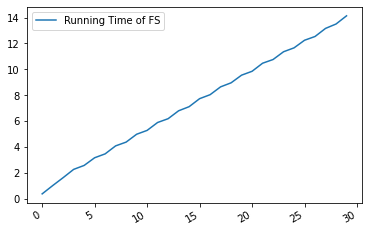

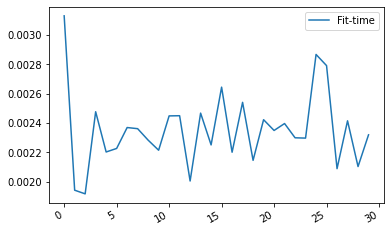

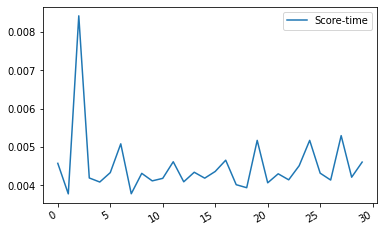

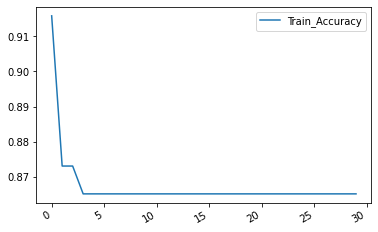

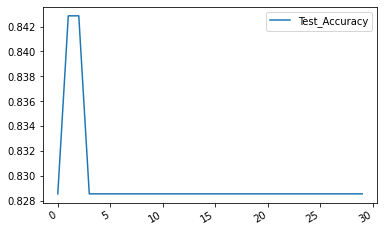

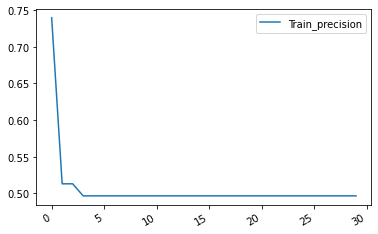

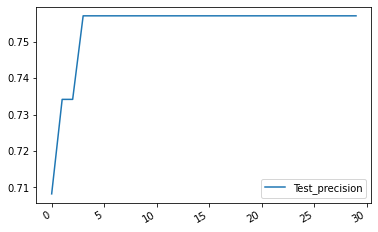

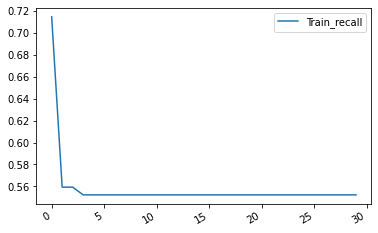

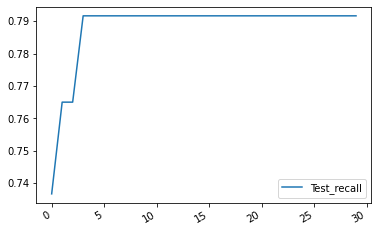

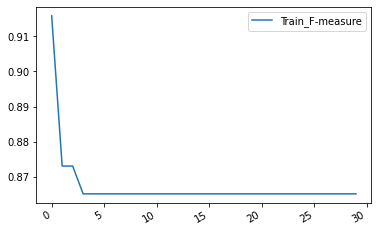

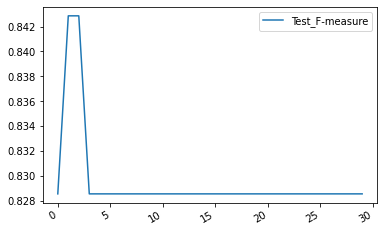

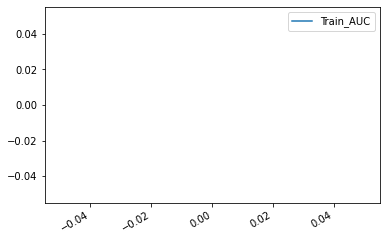

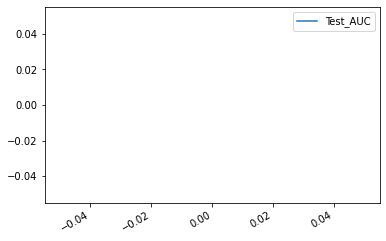

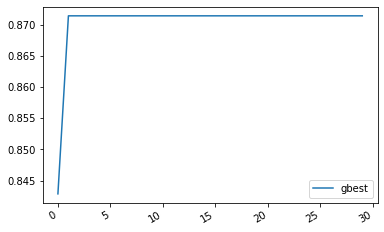

<Figure size 640x480 with 0 Axes>

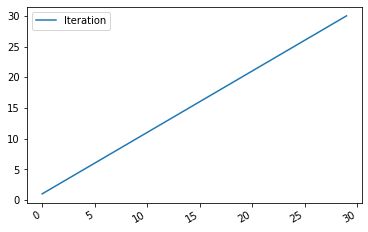

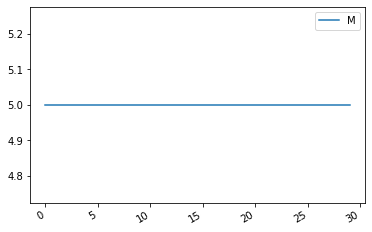

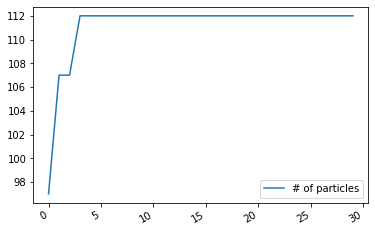

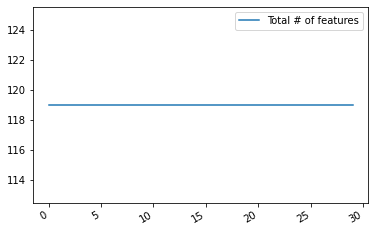

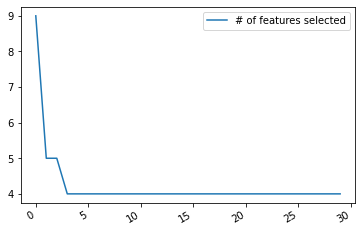

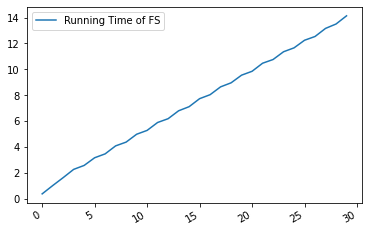

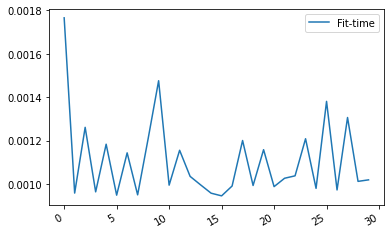

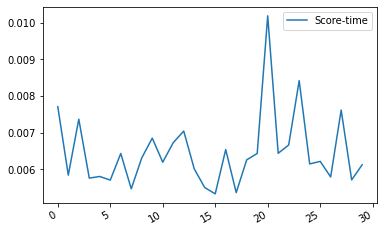

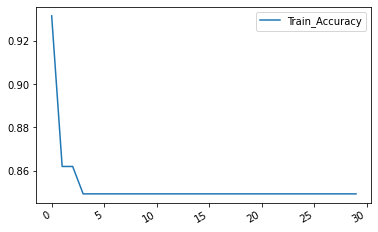

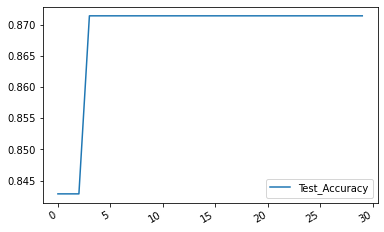

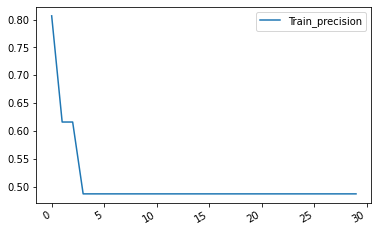

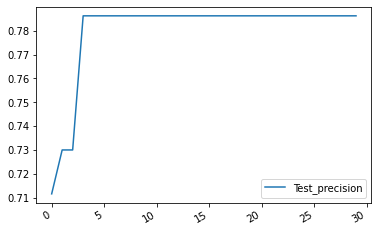

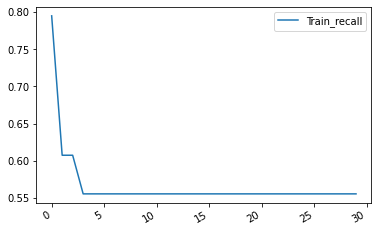

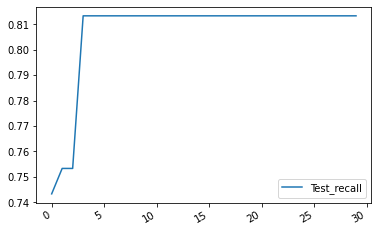

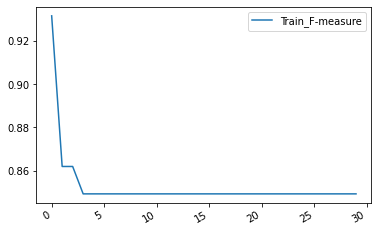

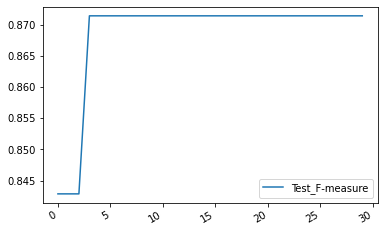

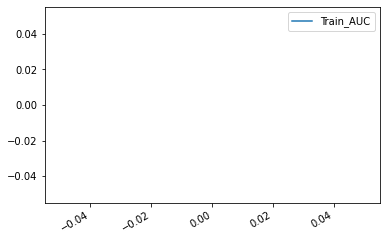

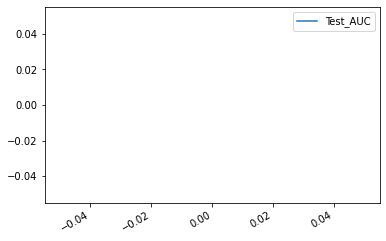

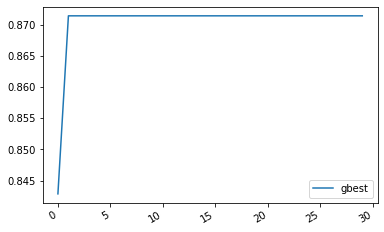

<Figure size 640x480 with 0 Axes>

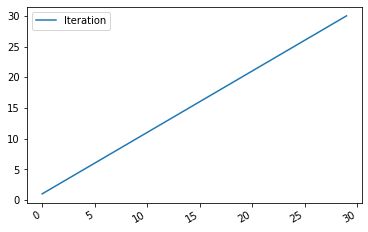

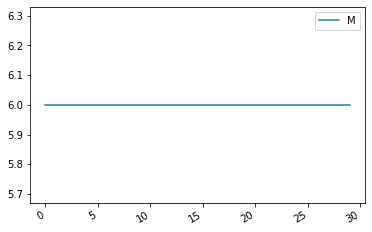

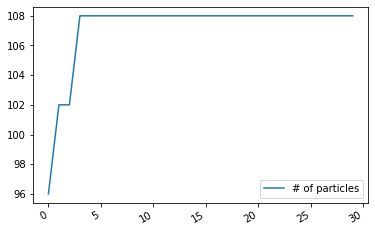

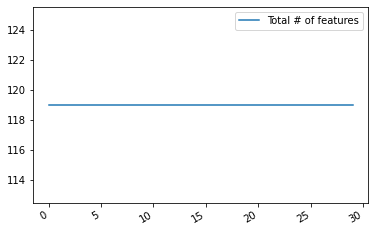

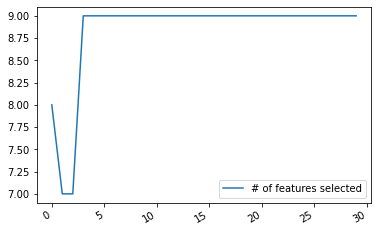

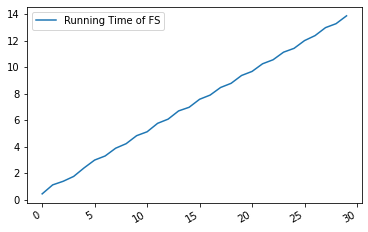

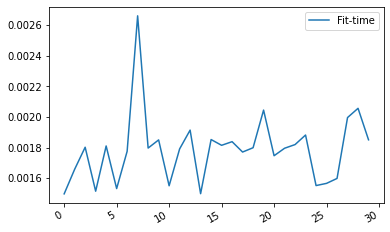

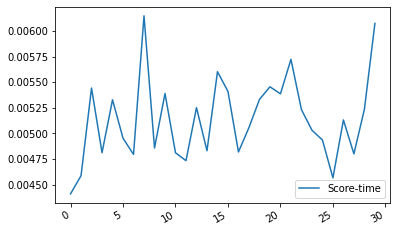

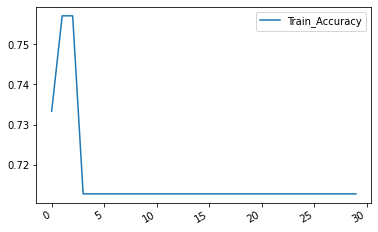

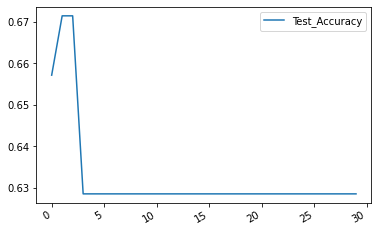

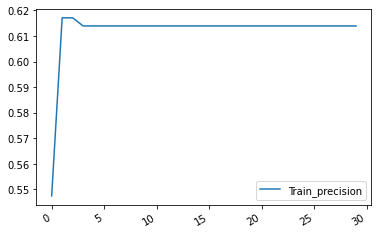

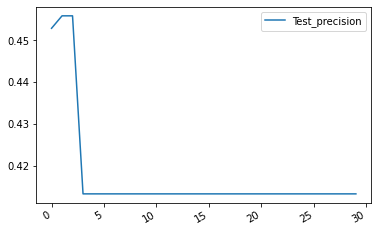

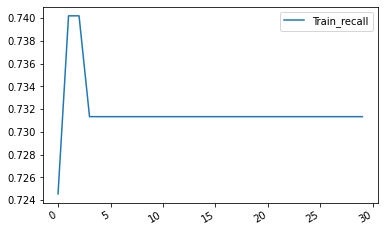

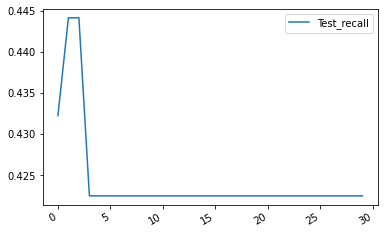

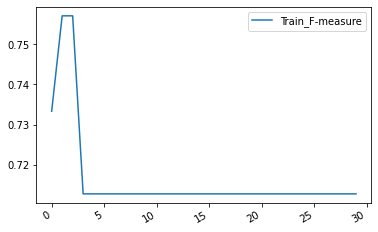

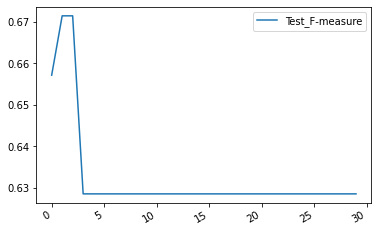

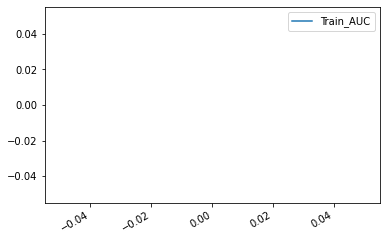

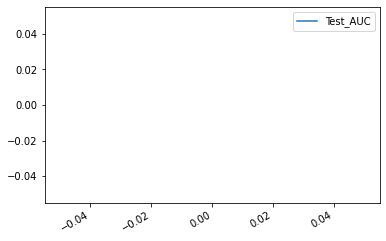

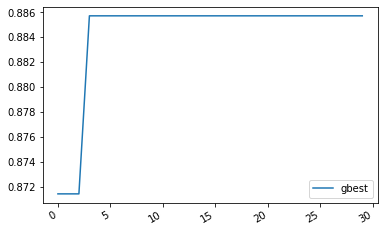

<Figure size 640x480 with 0 Axes>

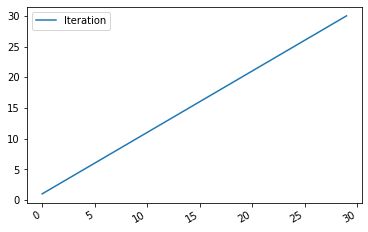

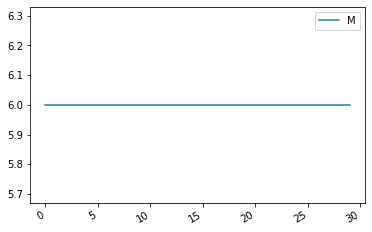

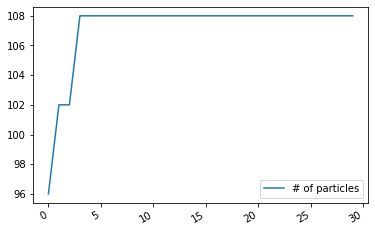

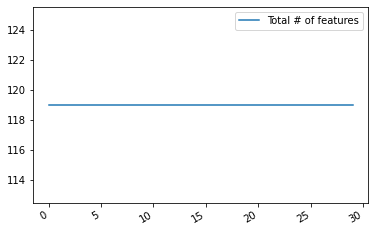

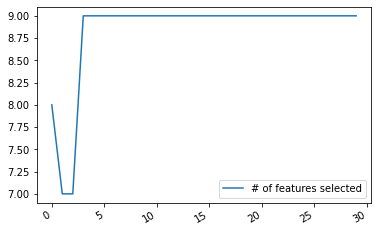

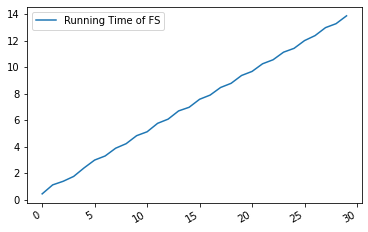

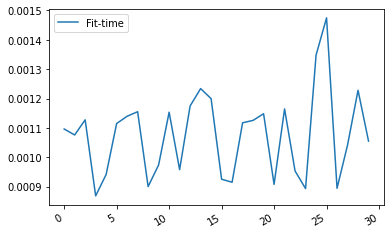

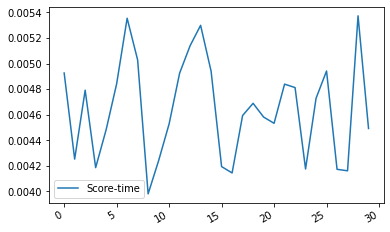

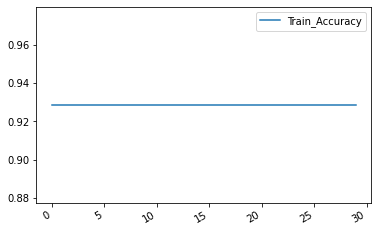

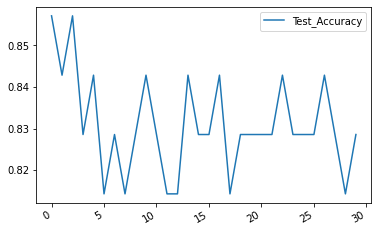

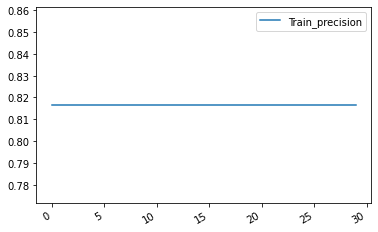

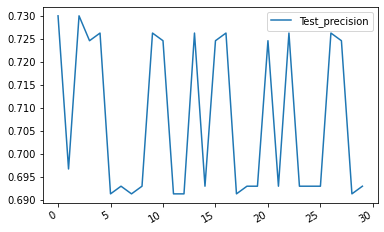

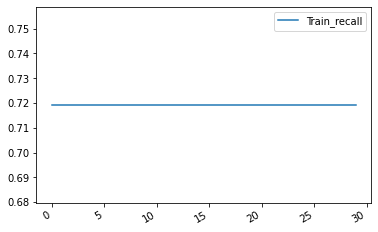

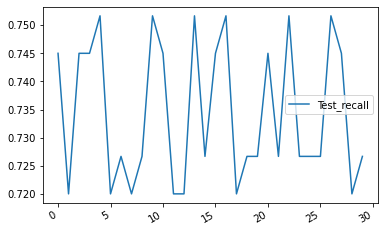

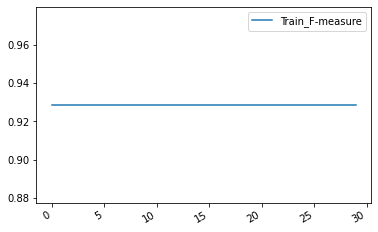

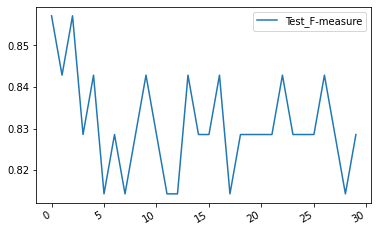

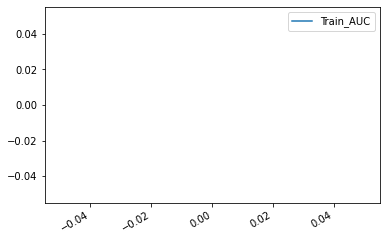

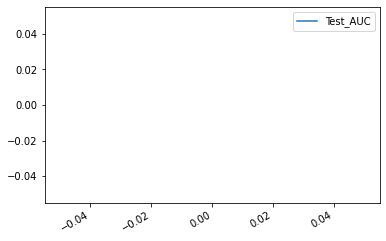

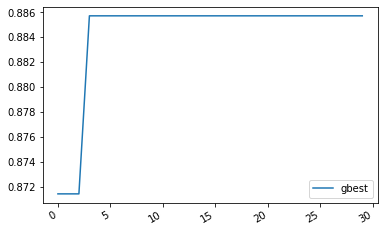

<Figure size 640x480 with 0 Axes>

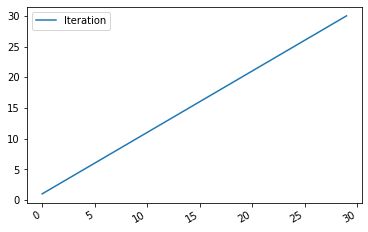

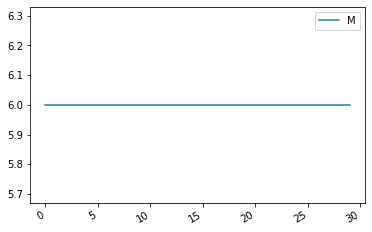

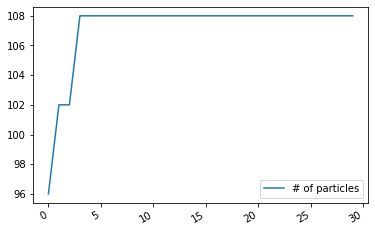

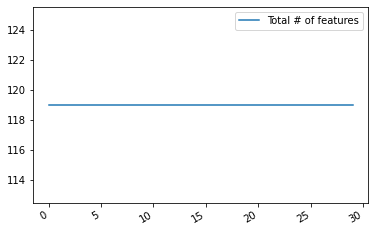

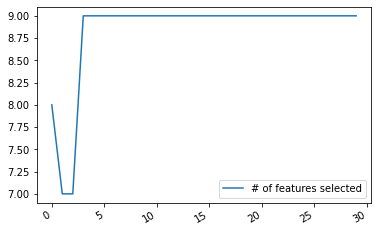

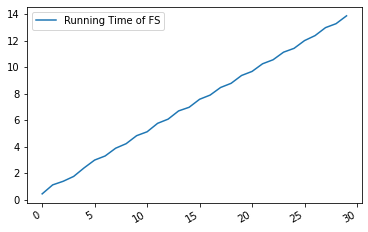

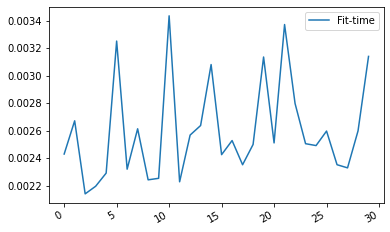

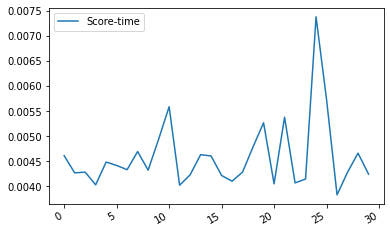

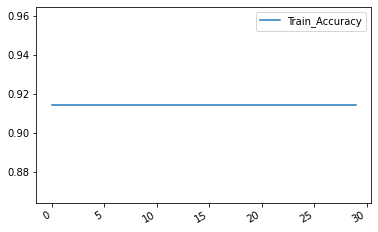

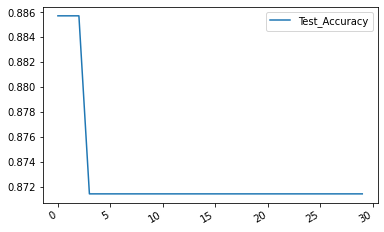

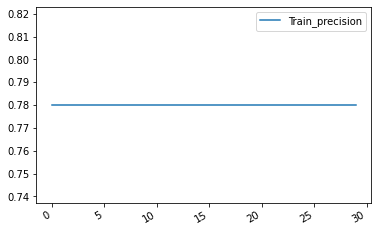

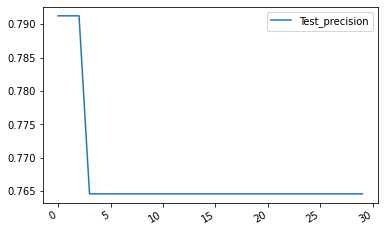

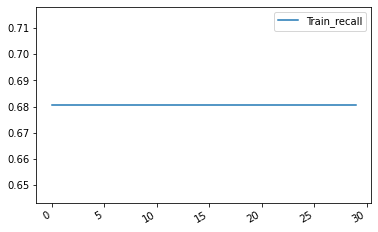

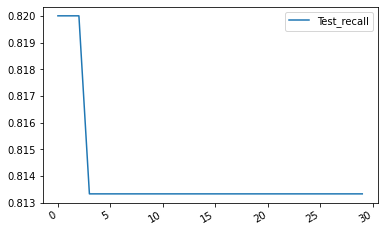

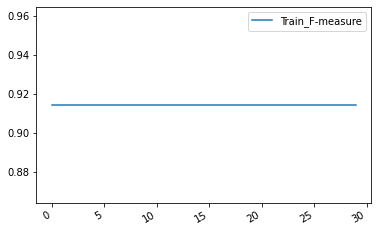

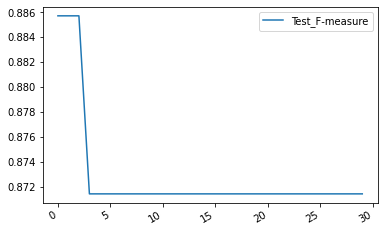

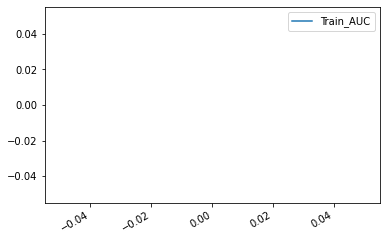

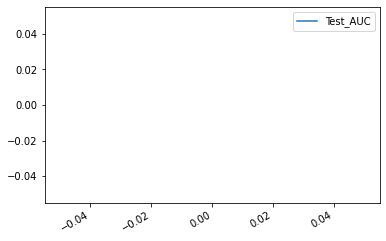

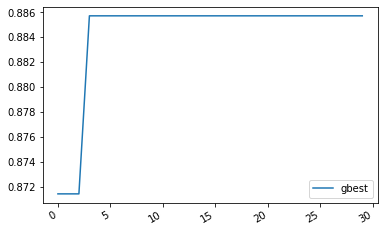

<Figure size 640x480 with 0 Axes>

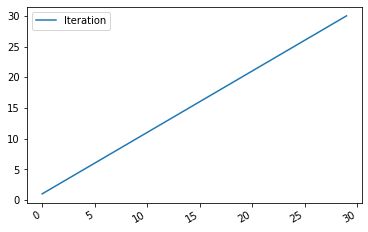

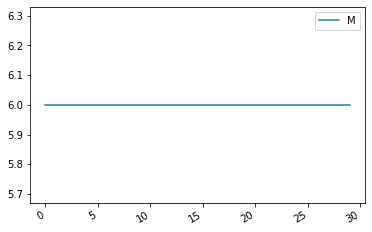

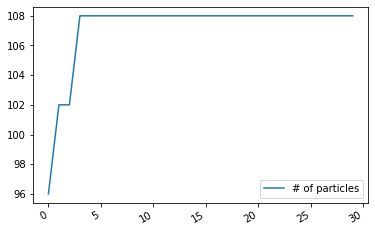

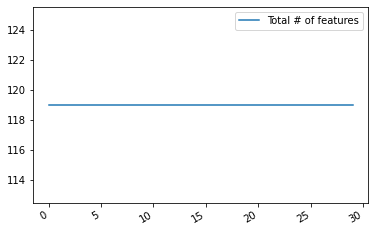

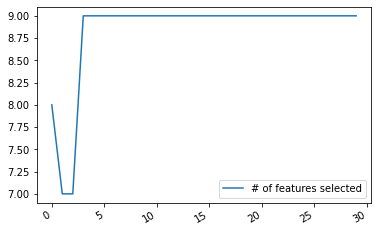

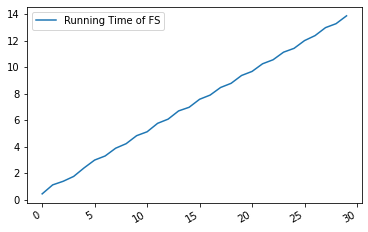

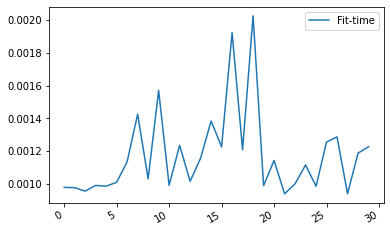

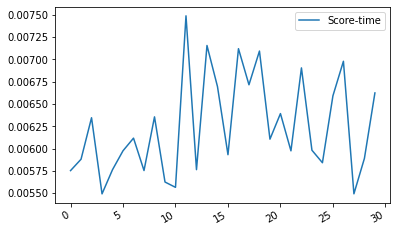

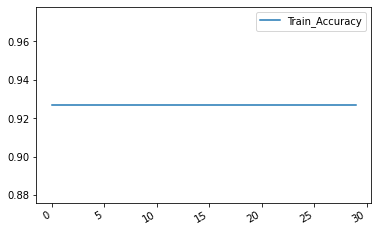

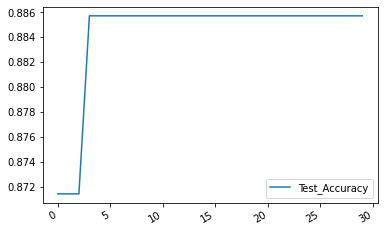

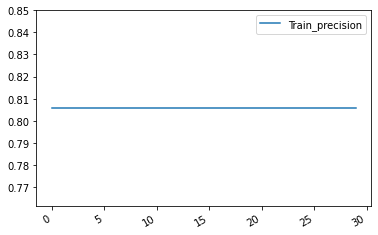

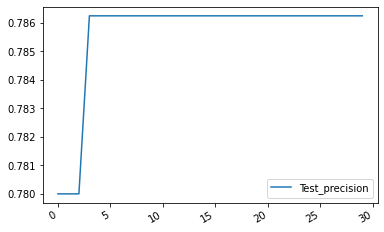

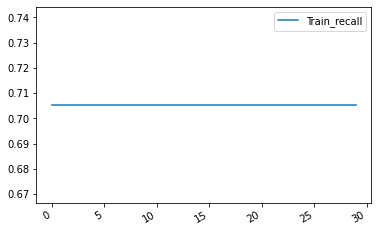

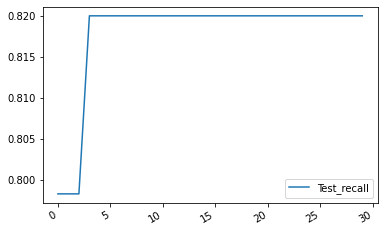

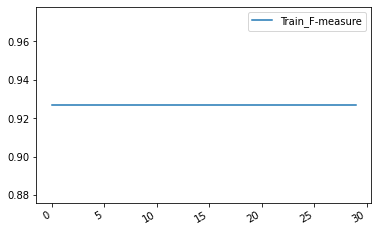

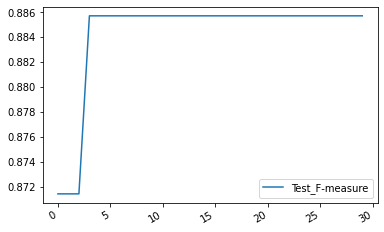

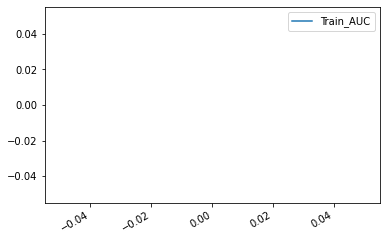

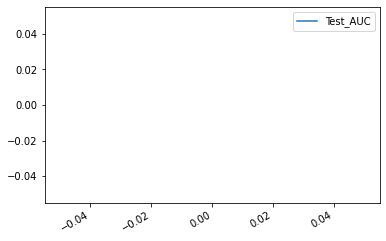

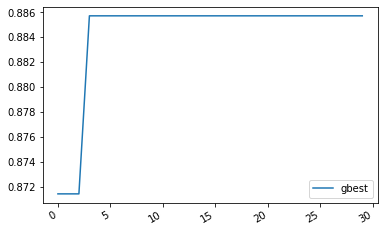

<Figure size 640x480 with 0 Axes>

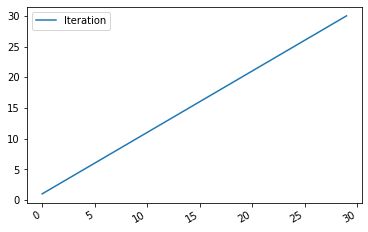

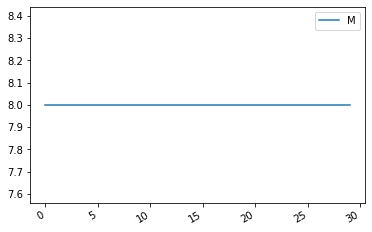

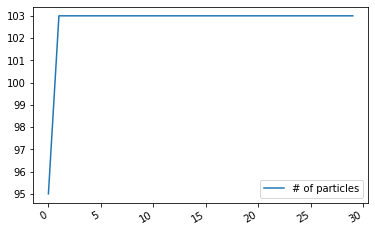

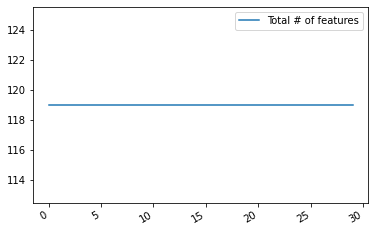

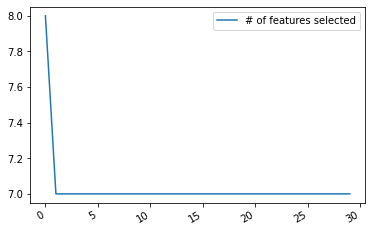

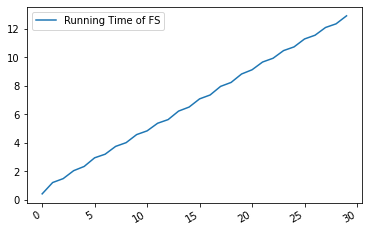

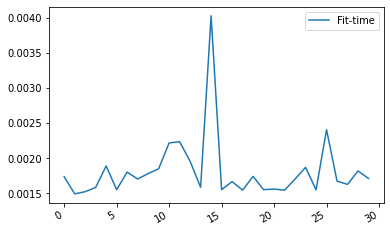

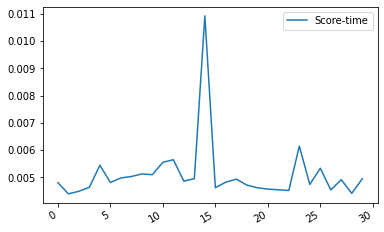

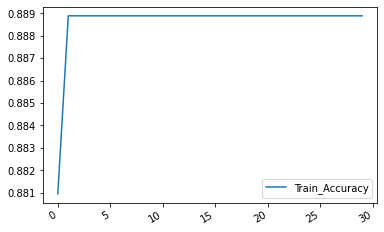

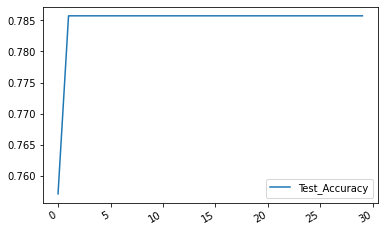

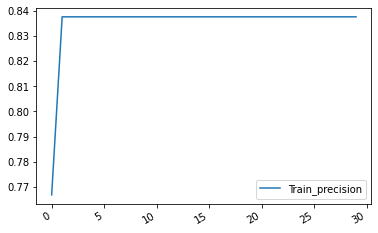

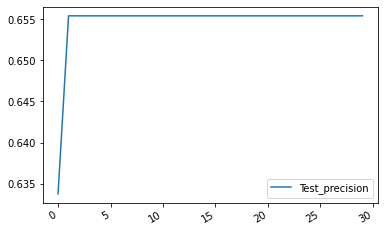

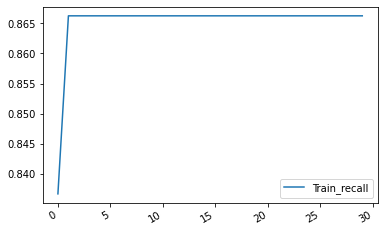

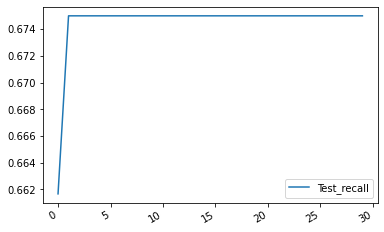

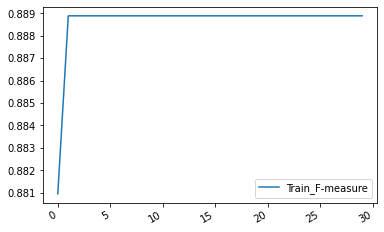

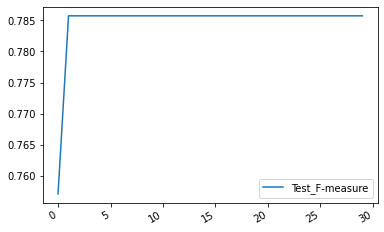

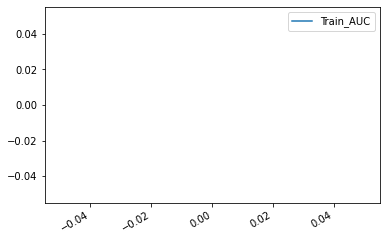

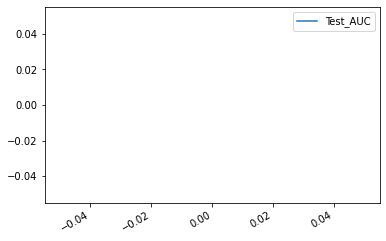

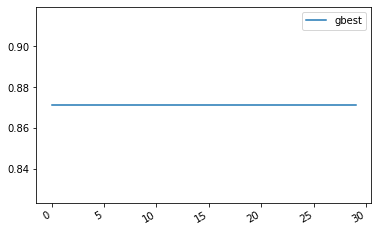

<Figure size 640x480 with 0 Axes>

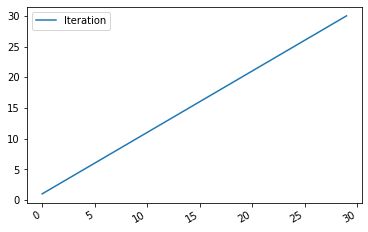

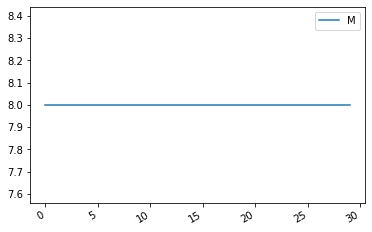

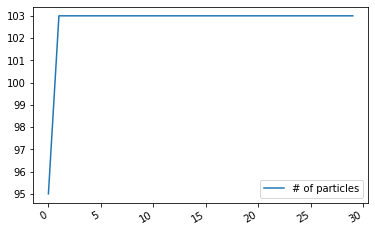

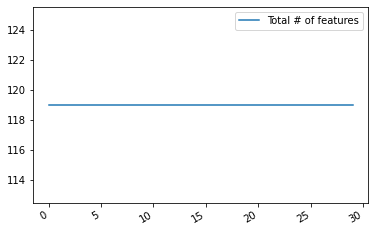

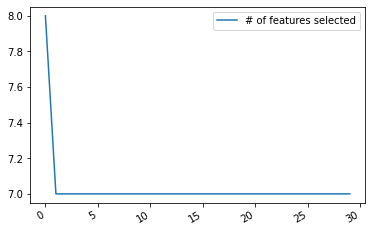

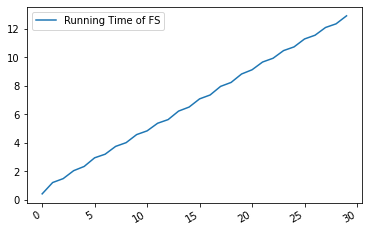

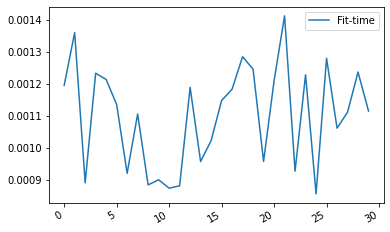

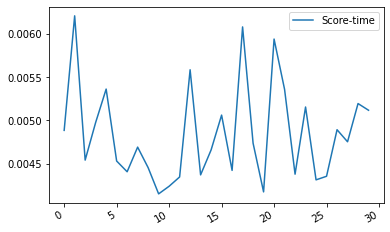

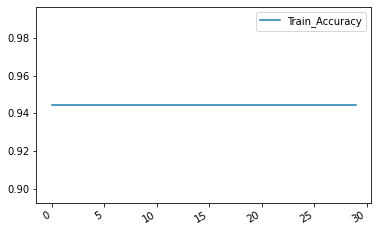

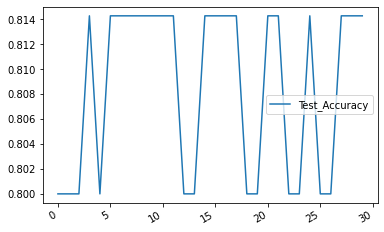

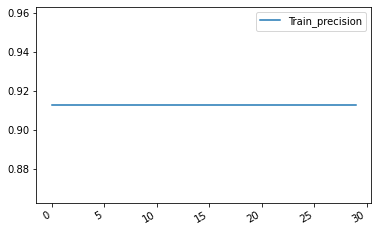

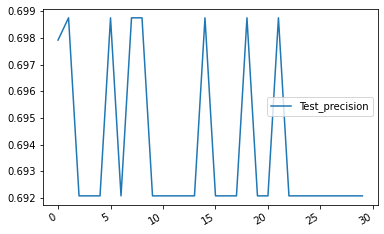

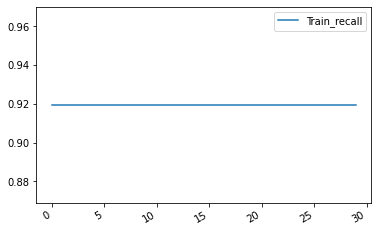

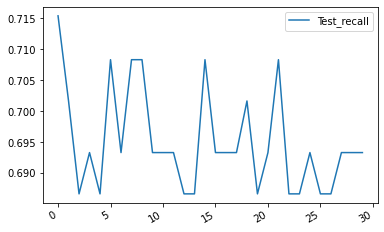

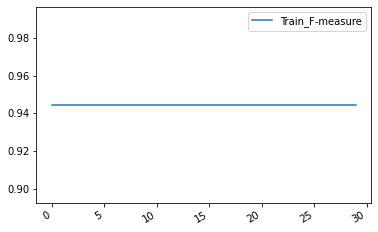

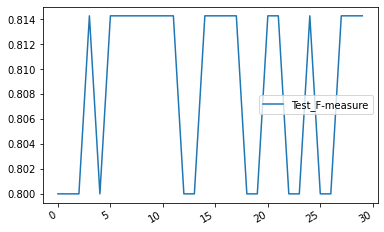

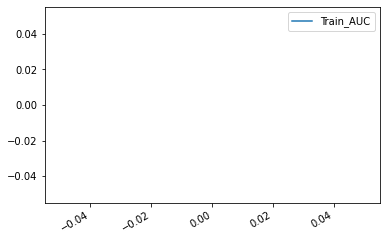

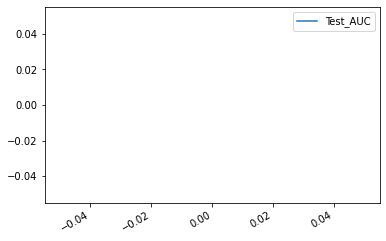

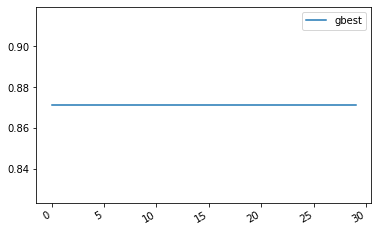

<Figure size 640x480 with 0 Axes>

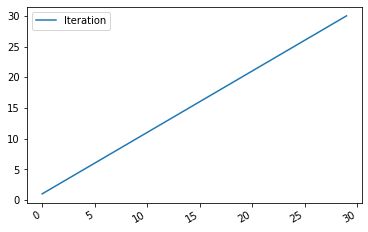

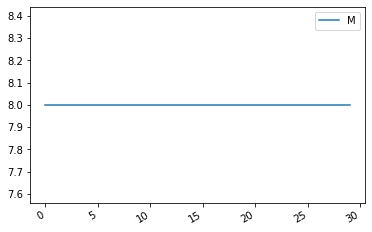

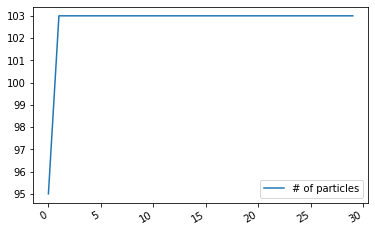

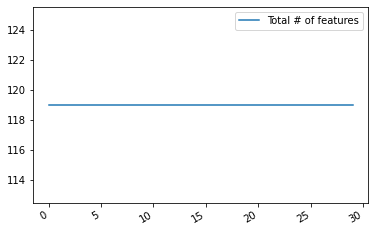

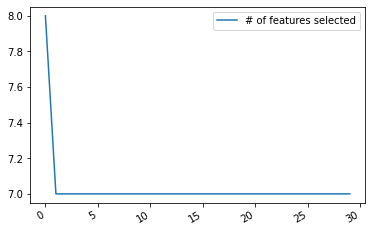

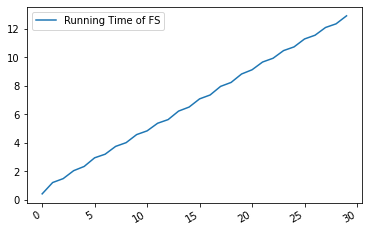

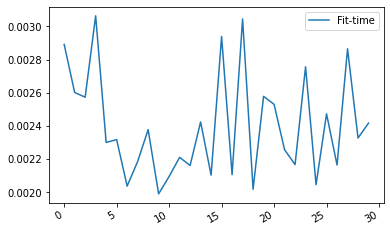

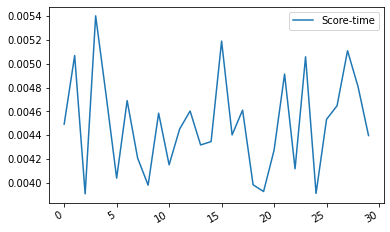

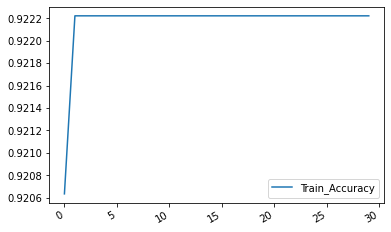

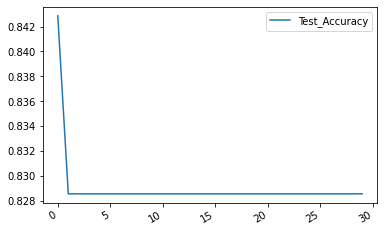

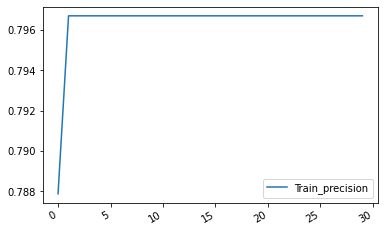

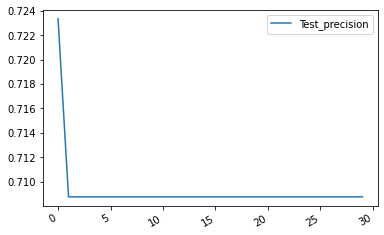

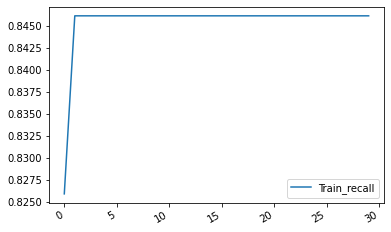

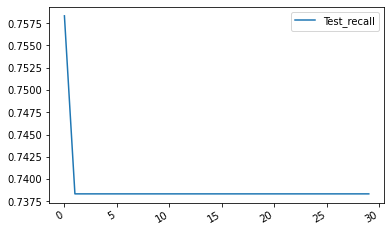

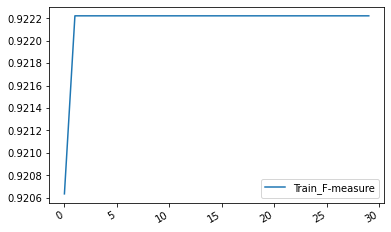

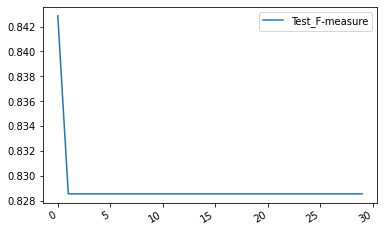

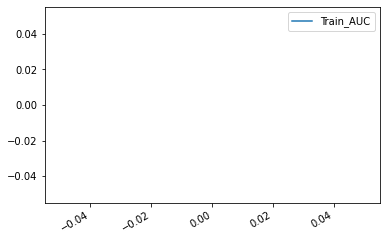

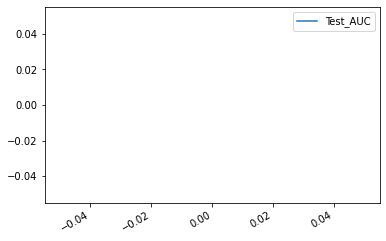

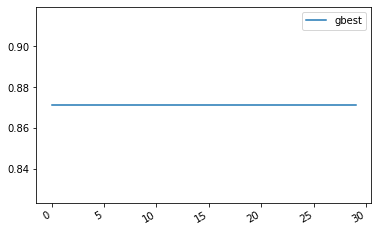

<Figure size 640x480 with 0 Axes>

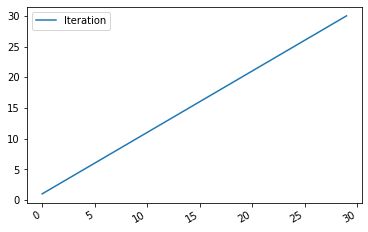

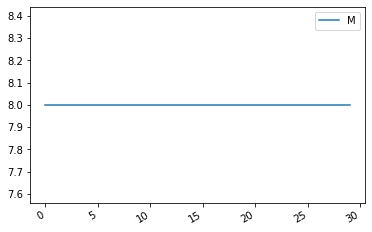

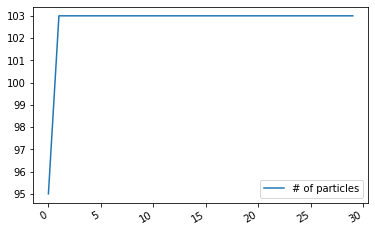

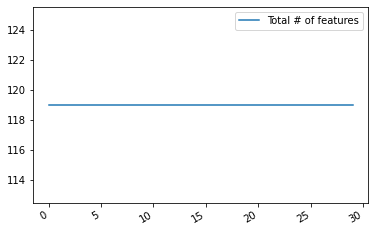

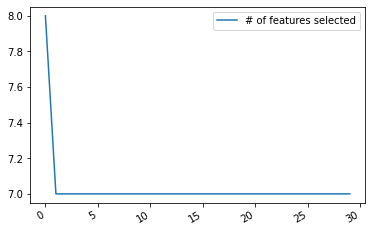

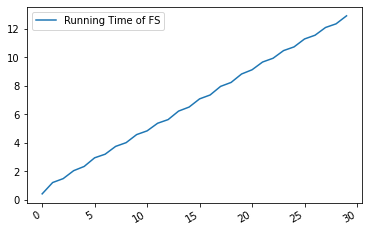

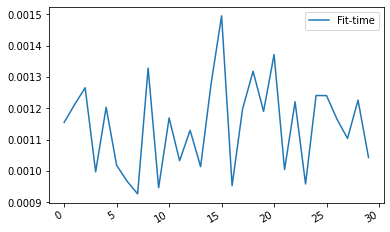

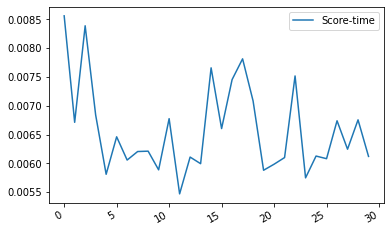

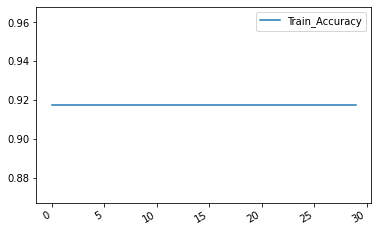

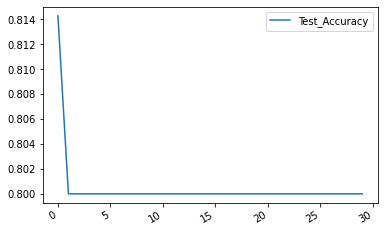

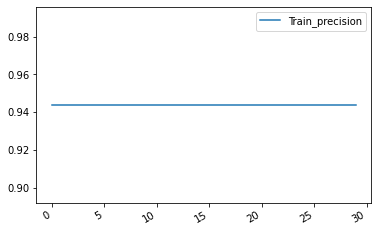

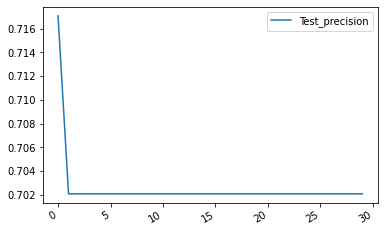

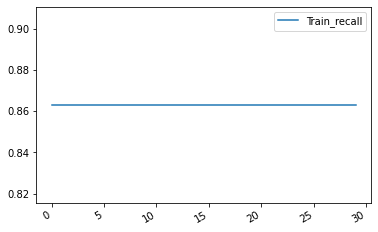

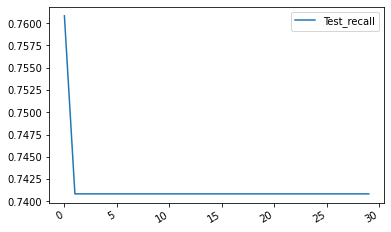

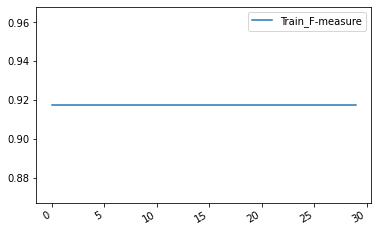

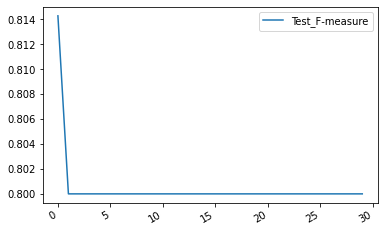

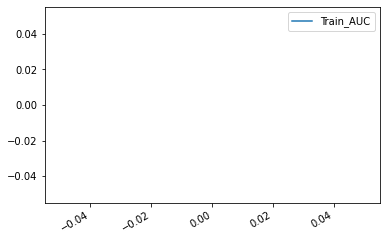

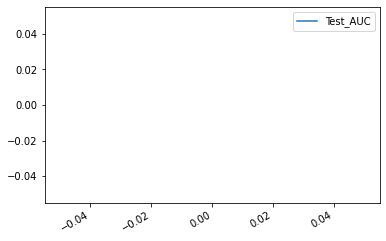

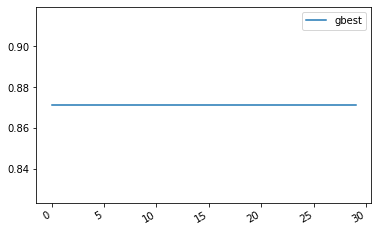

<Figure size 640x480 with 0 Axes>

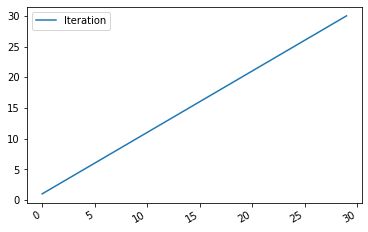

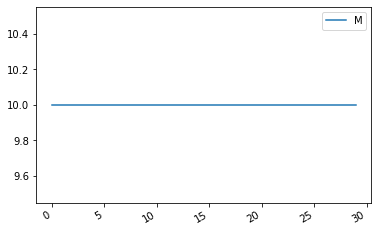

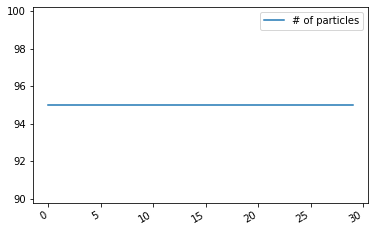

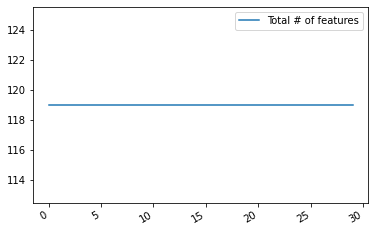

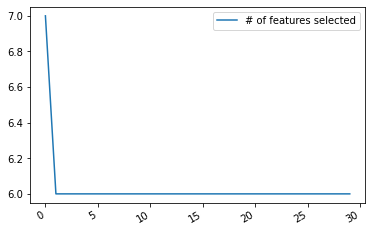

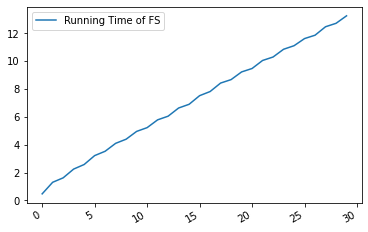

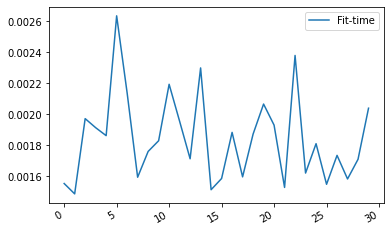

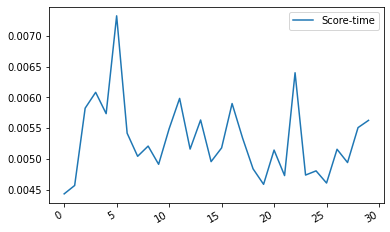

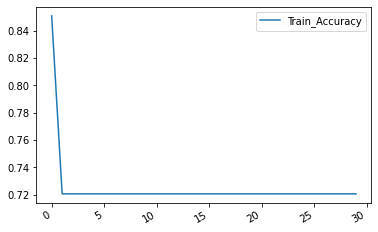

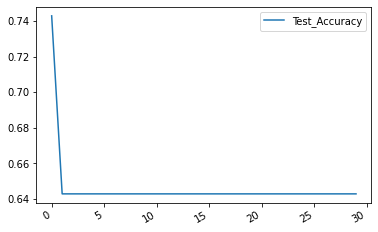

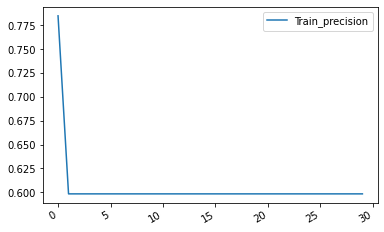

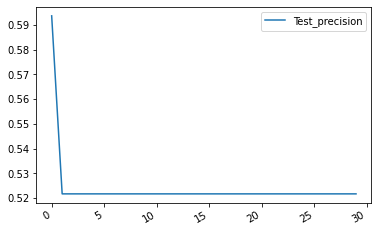

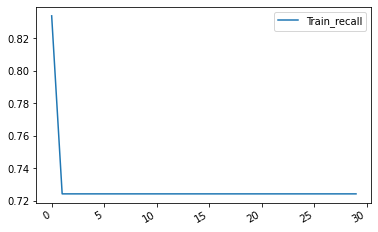

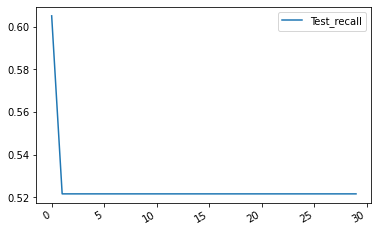

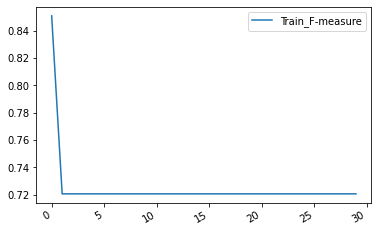

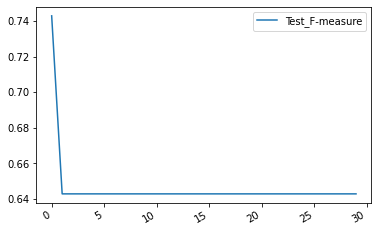

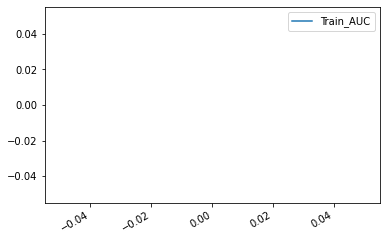

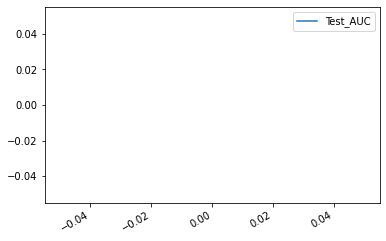

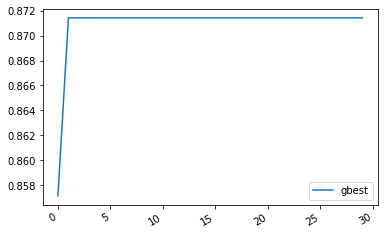

<Figure size 640x480 with 0 Axes>

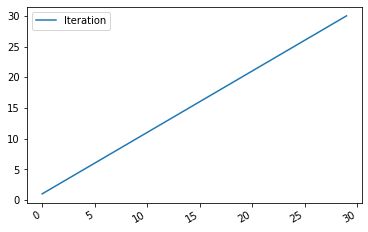

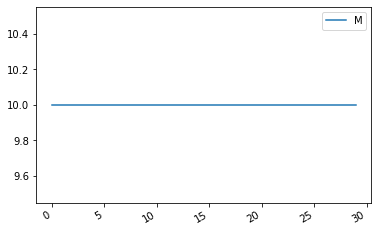

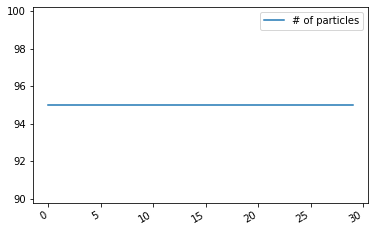

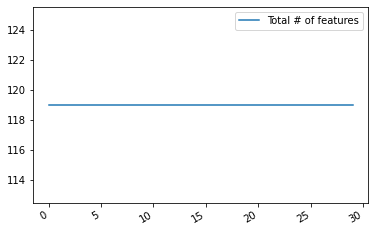

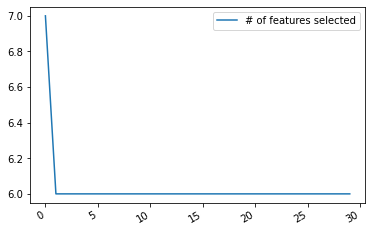

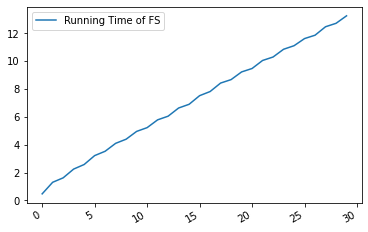

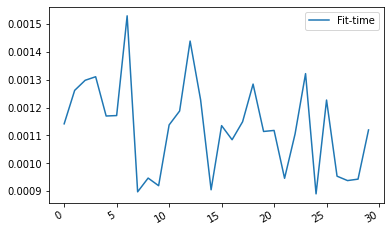

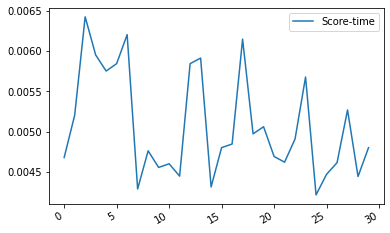

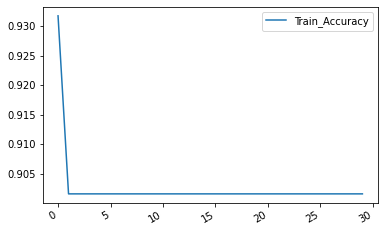

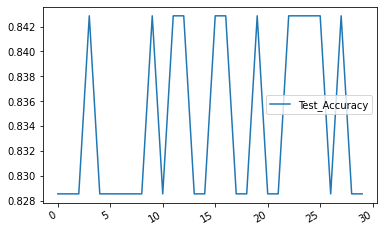

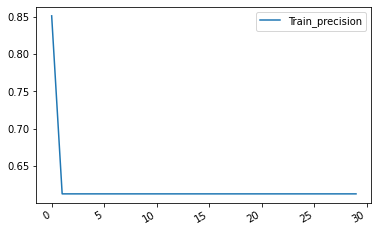

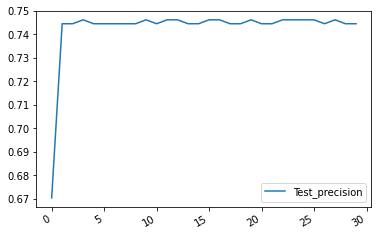

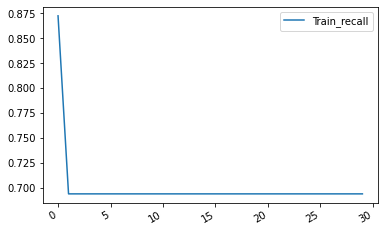

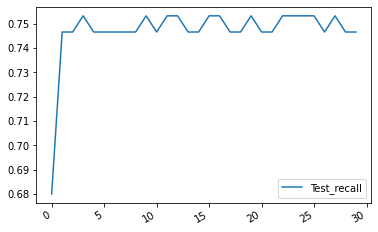

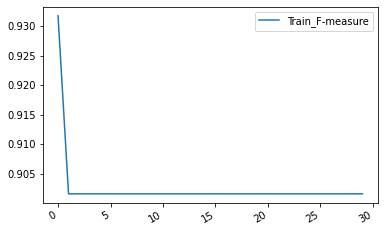

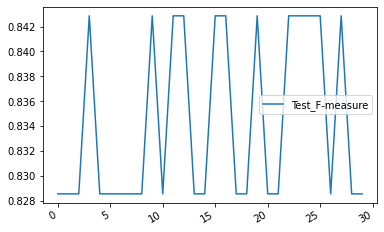

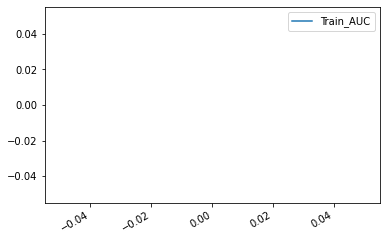

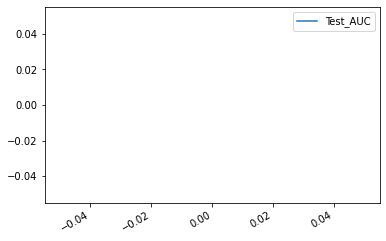

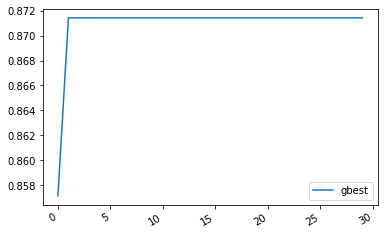

<Figure size 640x480 with 0 Axes>

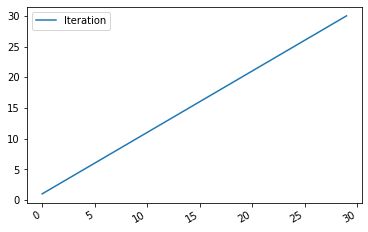

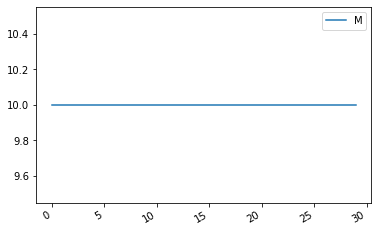

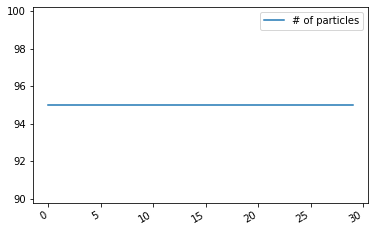

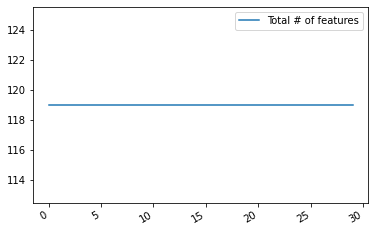

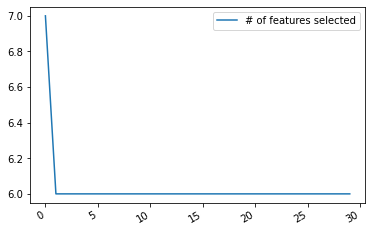

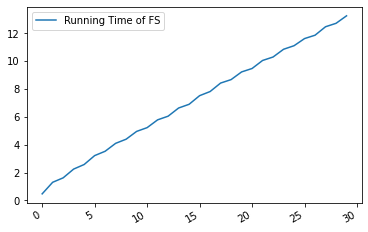

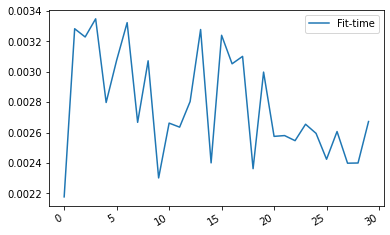

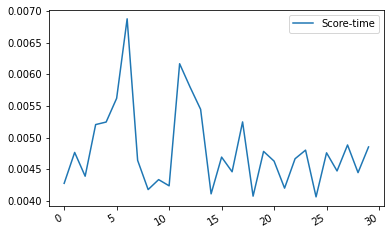

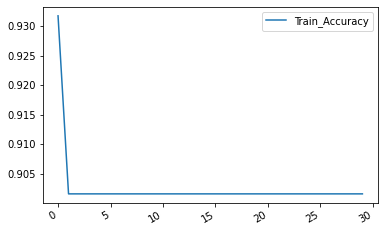

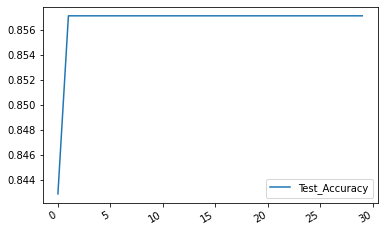

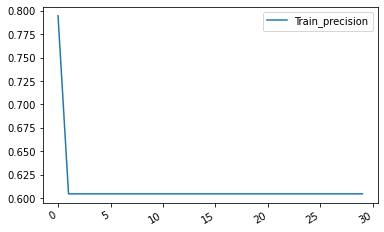

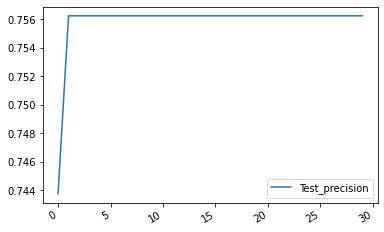

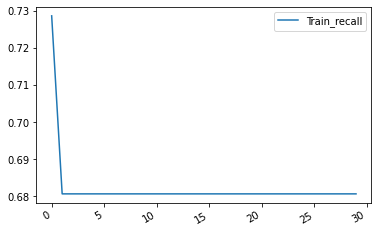

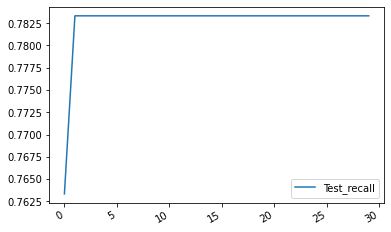

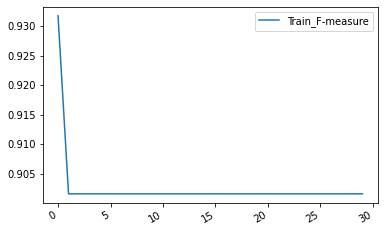

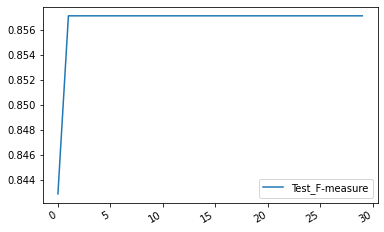

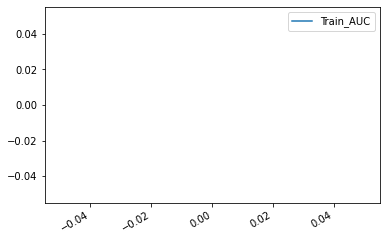

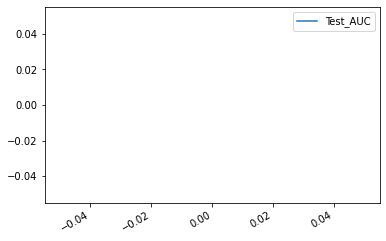

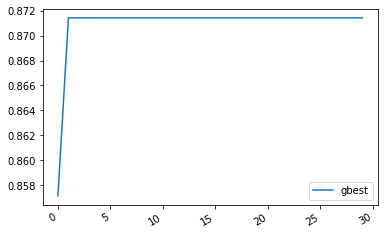

<Figure size 640x480 with 0 Axes>

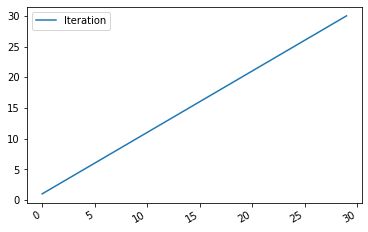

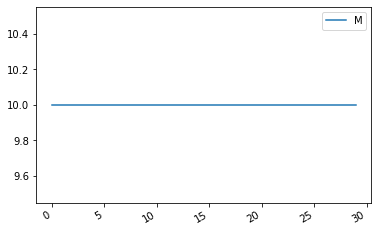

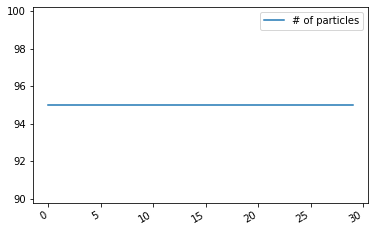

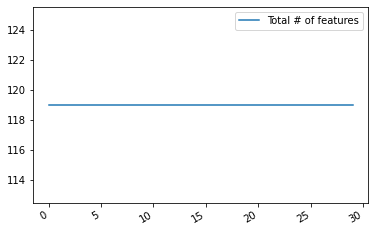

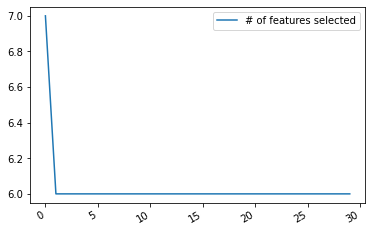

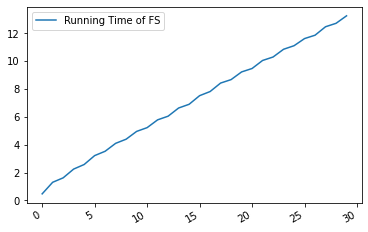

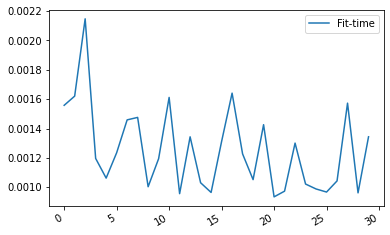

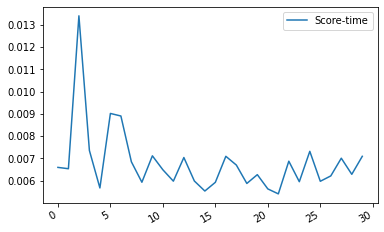

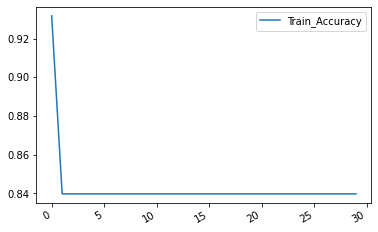

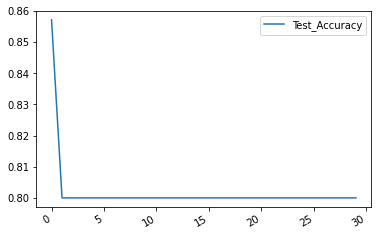

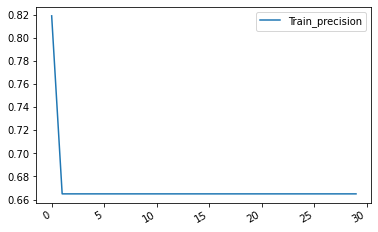

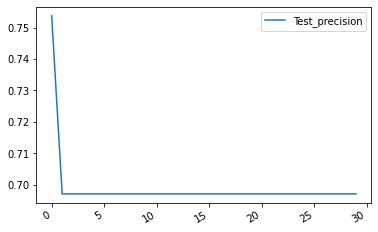

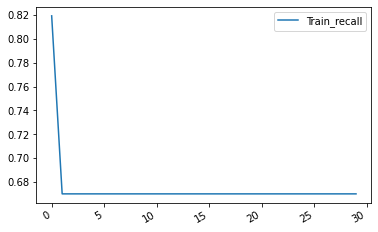

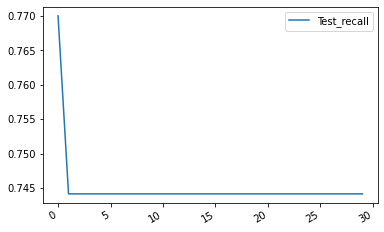

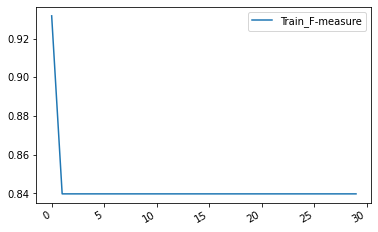

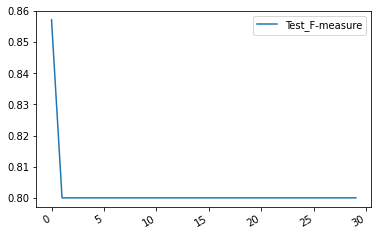

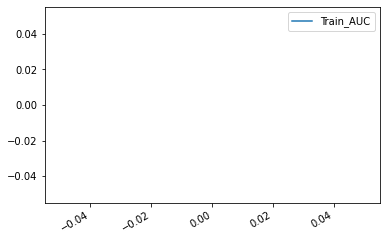

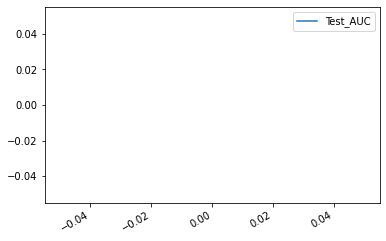

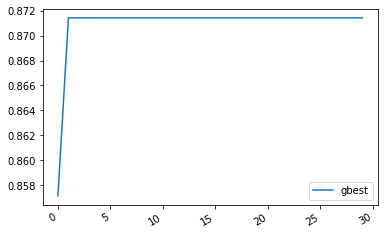

In [ ]:
from contextlib import redirect_stdout
import datetime
ds_name='SCADI'
with open(('/content/drive/My Drive/FYP/output_screen/%s_%s.txt')%(ds_name,datetime.datetime.now()), 'w') as f:
    with redirect_stdout(f):
      import traceback
      import copy
      import collections
      M_arr=[1,2,3,4,5,6,8,10]
      #M_arr=M_arr[::-1]
      for M in M_arr:
        import pandas as pd
        import numpy as np
        from skfeature.utility.mutual_information import su_calculation
        import math
        import pickle
        from sklearn.impute import SimpleImputer
        from sklearn.preprocessing import LabelEncoder
        import os
        import time
        enc = LabelEncoder()
        imp = SimpleImputer(missing_values=np.nan, strategy='mean')
        #ds_name='test_dataset_workflow'
        #ds_name='LSVT'
        df=pd.read_csv(('/content/drive/My Drive/FYP/Dataset/%s.csv')%(ds_name))
        df=df.replace('?',np.nan)
        enc.fit(df[df.columns[-1]])
        df[df.columns[-1]] = enc.transform(df[df.columns[-1]])
        imp=imp.fit(df)
        data_arr=imp.transform(df)
        #print(df.columns)
        df= pd.DataFrame(data=data_arr,columns=df.columns)
        print(df.head())
        ## creating directories
        if not os.path.exists(('/content/drive/My Drive/FYP/%s')%(ds_name)):
            reduced_datasets=('/content/drive/My Drive/FYP/%s/reduced_datasets')%(ds_name)
            results_csv=(('/content/drive/My Drive/FYP/%s/results_csv')%(ds_name))
            temp_storage=('/content/drive/My Drive/FYP/%s/temp')%(ds_name)
            results_graphs=(('/content/drive/My Drive/FYP/%s/results_graphs')%(ds_name))
            os.makedirs(('/content/drive/My Drive/FYP/%s')%(ds_name))
            os.makedirs(reduced_datasets)
            os.makedirs(results_csv)
            os.makedirs(results_graphs)
            os.makedirs(temp_storage)
          
        else:
          
          print("Error Already File Exists!!!!")
          reduced_datasets=('/content/drive/My Drive/FYP/%s/reduced_datasets')%(ds_name)
          results_csv=(('/content/drive/My Drive/FYP/%s/results_csv')%(ds_name))
          temp_storage=('/content/drive/My Drive/FYP/%s/temp')%(ds_name)
          results_graphs=(('/content/drive/My Drive/FYP/%s/results_graphs')%(ds_name))
          import sys
          #sys.exit("Error message")
        start = time.time()
        ##only one gbest
        gbest_tracer=-1
        ### Removing irrelvant features with delta value
        X = df.values
        n_samples, n_features = X.shape
        n_features = n_features-1
        y = X[:,-1]
        # t1[:,0] stores index of features, t1[:,1] stores symmetrical uncertainty of features
        t1 = np.zeros((n_features, 2))
        for i in range(n_features):
            f = X[:, i]
            t1[i, 0] = i
            t1[i, 1] = su_calculation(f, y)
        su_max = t1[:,1].max()
        delta = 0.1 * su_max
        '''print("Symmetrical Uncertainity ",t1[:,1])
        print("MAX SU ",su_max)
        '''
        F = t1[t1[:, 1] > delta, :]
        '''print("Features Selected ",F)'''
        print(("No. of Features selected with threshold :%f")%(len(F)))
        ### Calculating sub-swarm sizes and feature in sub-swarms
        # # sub swarms
        #M=10

        n_s_features=F.shape[0]
        #temp_fe=n_s_features
        temp_fe=n_s_features
        # if temp_fe<500:
        #   M=3
        # elif temp_fe>1000 and temp_fe<4000:
        #   M=6
        # elif temp_fe>4000:
        #   M=10
        # else:
        #   M=5
        #M=1
        print("No. of Sub-swarms ",M)
        reduced_datasets+='/M_'+str(M)
        results_csv+='/M_'+str(M)
        temp_storage+='/M_'+str(M)
        results_graphs+='/M_'+str(M)
        os.makedirs(reduced_datasets)
        os.makedirs(results_csv)
        os.makedirs(results_graphs)
        os.makedirs(temp_storage)
        #M=10
        N=n_s_features//20
        N=min(N,300)
        # if N<=0:
        #   N=4*n_s_features
        #   M=2
        #   print("No. of sub-swarms changed to ",M)
        N=max(N,100)
        l=math.floor(n_s_features/M)
        F1=F[F[:,1].argsort(kind='mergesort')]
        F1=F1[::-1]
        '''print("Descending order by SU ",F1)'''
        #####adding local search pf
        tnoff=len(F1)
        pf = [ (0.05+0.45*(math.exp(10*(element)/(tnoff-1))/(math.exp(10)-1)))for element in range(tnoff)]
        pf=np.array(pf)
        U= []
        pcf=[]
        SU_store=[]
        #U= []
        s=0
        for i in range(M):
          if s+l-1 < n_s_features:
            #U.append(F1[s:s+l-1,0])
            U.append(F1[s:s+l,0])
            SU_store.append(F1[s:s+l,1])
            pcf.append(pf[s:s+l])
            s=s+l
          else:
            #U.append(F1[s:n_s_features-1,0])
            U.append(F1[s:n_s_features,0])
            SU_store.append(F1[s:n_s_features,1])
            pcf.append(pf[s:n_s_features])
        '''print("Index of original features in Sub-swarms ",U)'''

        ### initialization of sub-swarms
        Fim=[]
        for i in U:
          #print(i)
          sum_v=0
          for j in i:
            #print(j)
            j=int(j)
            f=X[:,j]
            sum_v = sum_v+su_calculation(f, y)
          Fim.append(sum_v)

        '''print("Feature Importances ",Fim)'''
        SN=[]
        sum_fim=np.sum(Fim)
        #N=200
        #N=len(F)//20

        #N=math.floor((N+300)/2)
        #N=math.floor(0.5*(N+300))
        # if N <300:
        #   N=300
        # if N <300:
        #   N=300
        #N=300
        #N=300
        print("No. of particles ",N)
        for i in Fim:
          SN.append(math.floor(i/sum_fim*N))
        SN_max=min(N,2*N/M)
        SN_min=min(5,N/(2*M))
        for j,i in enumerate(SN):
          if i > SN_max:
            SN[j]=int(SN_max)
          elif i >= SN_min and i <= SN_max:
            SN[j]=int(i)
          elif i < SN_min:
            SN[j]=int(SN_min)
        print("Population size in sub-swarms ",SN)
        ### Main mechanisms
        import warnings
        warnings.filterwarnings('ignore')
        import random
        #from datetime import datetime

        #print time

        time_cal=0
        # now = datetime.now()
        # current_time = now.strftime("%H:%M:%S")
        # print("Current Time =", current_time)
        #inertia set
        #w=0.7298
        #c1=1.49618
        #c2=1.49618
        max_eval=7000
        curr_eval=0
        #max_eval=100
        swarms={}
        #created commonly for easy of calculations
        swarms['sub-swarm common rel_con']=np.zeros(len(SN))
        swarms['sub-swarm common rel_div']=np.zeros(len(SN))
        #adding filter
        # global_best_tracer=0.0
        # g_b_t_ind=0
        print("Initializing........")
        for i in range(0,len(SN)):
          swarms['sub-swarm '+str(i)]={}
          swarms['sub-swarm '+str(i)]['gbest']=None
          swarms['sub-swarm '+str(i)]['gbest-val']=None
          swarms['sub-swarm '+str(i)]['particles']={}
          ##added for divergence
          swarms['sub-swarm '+str(i)]['fit-par-t']=np.zeros(SN[i])
          swarms['sub-swarm '+str(i)]['fit-par-t-1']=np.zeros(SN[i])
          ###
          sub_swarm_particles=swarms['sub-swarm '+str(i)]['particles']
          for j in range(0,SN[i]):
            sub_swarm_particles['particle '+str(j)]={}
            sub_swarm_particles['particle '+str(j)]['cur_pos']=np.random.uniform(0,1,len(U[i]))
            #sub_swarm_particles['particle '+str(j)]['cur_vel']=np.random.uniform(0,1,len(U[i]))
            sub_swarm_particles['particle '+str(j)]['best_pos']=copy.deepcopy(sub_swarm_particles['particle '+str(j)]['cur_pos'])
            d_t=sub_swarm_particles['particle '+str(j)]['best_pos-val']=fitness_particle(swarms,i,j,curr_eval)
            #print(d_t)
            '''print("current,best position,fitness of particle of particle ",i," ",j," ",sub_swarm_particles['particle '+str(j)]['cur_pos'],sub_swarm_particles['particle '+str(j)]['best_pos'],d_t)
            '''
            #if (swarms['sub-swarm '+str(i)]['gbest'] is None )or (d_t>swarms['sub-swarm '+str(i)]['gbest-val']):
            if (d_t>gbest_tracer):
              '''print("Global best position,fitness before change ",swarms['sub-swarm '+str(i)]['gbest'],swarms['sub-swarm '+str(i)]['gbest-val'])
              '''
              swarms['sub-swarm '+str(i)]['gbest']=copy.deepcopy(sub_swarm_particles['particle '+str(j)]['cur_pos'])
              swarms['sub-swarm '+str(i)]['gbest-val']=d_t
              gbest_tracer=d_t
              '''print("Global best position,fitness after change ",swarms['sub-swarm '+str(i)]['gbest'],swarms['sub-swarm '+str(i)]['gbest-val'])
              '''
              #print(d_t)
              #sub_swarm_particles['particle '+str(j)]['best_pos-val']=***********
            else:
              if swarms['sub-swarm '+str(i)]['gbest-val']!=gbest_tracer:
                swarms['sub-swarm '+str(i)]['gbest']=np.zeros(len(U[i]))
                swarms['sub-swarm '+str(i)]['gbest-val']=gbest_tracer
            temp_p_f=d_t
            swarms['sub-swarm '+str(i)]['fit-par-t'][j]=temp_p_f
            swarms['sub-swarm '+str(i)]['fit-par-t-1'][j]=temp_p_f
            '''print("Fitness of particle in t,t-1 iterations ",swarms['sub-swarm '+str(i)]['fit-par-t'][j])
            print(swarms['sub-swarm '+str(i)]['fit-par-t-1'][j])
            '''
          
          ##adding fbest for sub-swarm

          temp_g_f=swarms['sub-swarm '+str(i)]['gbest-val']
          # if global_best_tracer<temp_g_f:
          #   global_best_tracer=temp_g_f
          #   g_b_t_ind=int(i)
          print("Global best particle accuracy in sub-swarm "+str(i)+" is ",temp_g_f)
          temp_M_D=MAxDist(swarms,i)
          swarms['sub-swarm '+str(i)]['fbest t']=temp_M_D
          swarms['sub-swarm '+str(i)]['fbest t-1']=temp_M_D
          #swarms['sub-swarm '+str(i)]['fbest t-2']=temp_M_D
          swarms['sub-swarm '+str(i)]['fbest t-2']=temp_M_D
          '''print("Best fitness of particle in ",i," ",j," t,t-1,t-2 iterations",swarms['sub-swarm '+str(i)]['fbest t'],swarms['sub-swarm '+str(i)]['fbest t-1'],swarms['sub-swarm '+str(i)]['fbest t-2'])
          '''
          print('Initializing Sub-Swarm '+str(i)+' Finished')
        #deleting unwanted sub-swarms
        # t_l=len(U[i])
        # for k in range(g_b_t_ind+1,t_l):
        #   del(swarms['sub-swarm '+str(k)])
        #   del(SN[k])
        #   del(U[k])
        #   del(Fim[k])
        # sum_fim=np.sum(Fim)
        c=1
        #stop criteria
        #stop_cre=100
        stop_cre=30
        #freq=0
        freq_gbest=0
        while c<=stop_cre :
        
          SN=[int(ele) for ele in SN]
          #w=0.9-0.5*c/stop_cre #Good Results when w is not dynamic
          print("Iteration # "+str(c))
          print("Population size in sub-swarms ",SN)
          print("Total No.of particles ",np.sum(SN))
          print(("Gbest %f")%(gbest_tracer))
          #print("Value of w :",str(w))
          pbest_cal=0
          for n_i in range(0,len(SN)):
            i=swarms['sub-swarm '+str(n_i)]
            if gbest_tracer!=swarms['sub-swarm '+str(n_i)]['gbest-val']:
              #swarms['sub-swarm '+str(n_i)]['gbest-val']=fitness_gbest(swarms,n_i,curr_eval)
              swarms['sub-swarm '+str(n_i)]['gbest-val']=gbest_tracer
              pbest_cal=1
            else:
              pbest_cal=0
            #print(i['particles'])
            for n_j in range(0,SN[n_i]):
              '''print("For ",n_i," ",n_j)'''
              j=i['particles']['particle '+str(n_j)]
              if pbest_cal:
                swarms['sub-swarm '+str(n_i)]['particles']['particle '+str(n_j)]['best_pos-val']=fitness_particle_re(swarms,n_i,n_j,curr_eval)
                if  swarms['sub-swarm '+str(n_i)]['particles']['particle '+str(n_j)]['best_pos-val']>gbest_tracer:
                  gbest_tracer= swarms['sub-swarm '+str(n_i)]['particles']['particle '+str(n_j)]['best_pos-val']
                  swarms['sub-swarm '+str(n_i)]['gbest-val']=gbest_tracer
                  swarms['sub-swarm '+str(n_i)]['gbest']=copy.deepcopy(swarms['sub-swarm '+str(n_i)]['particles']['particle '+str(n_j)]['best_pos'])
              #j['cur_vel']=w*j['cur_vel']+(c1*random.uniform(0, 1))*(j['best_pos']-j['cur_pos'])+(c2*random.uniform(0, 1))*(i['gbest']-j['cur_pos'])
              mu=0.5*(j['best_pos']+i['gbest'])
              pb1=i['particles']['particle '+str(np.random.randint(0,SN[n_i]))]['best_pos']
              pb2=i['particles']['particle '+str(np.random.randint(0,SN[n_i]))]['best_pos']
              #tri=np.random.uniform(0,1)*np.absolute(pb1-pb2)*math.exp(fitness_particle(swarms,n_i,n_j,curr_eval)-fitness_gbest(swarms,n_i,curr_eval))
              sub_swarm_particles=swarms['sub-swarm '+str(n_i)]['particles']
              tri=np.random.uniform(0,1)*np.absolute(pb1-pb2)*math.exp(sub_swarm_particles['particle '+str(n_j)]['best_pos-val']-swarms['sub-swarm '+str(n_i)]['gbest-val'])
              delta=np.absolute(j['best_pos']-i['gbest'])+tri
              r4=0.7
              cmpr4=np.random.uniform(0,1,len(j['cur_pos']))
              #print(len(j['cur_pos']))
              t_r4=cmpr4<r4
              f_r4=cmpr4>=r4
              '''
              print("Mu ",mu)
              print("tri ",tri)
              print("delta ",delta)
              print("random particle 1,2 ",pb1,pb2)
              print(np.random.normal(loc=mu,scale=delta))
              '''
              temp_store1=j['cur_pos']==1
              ### element-wise
              '''print("Before change current,best position,fitness of particle of particle ",n_i," ",n_j," ",sub_swarm_particles['particle '+str(n_j)]['cur_pos'],sub_swarm_particles['particle '+str(n_j)]['best_pos'],sub_swarm_particles['particle '+str(n_j)]['best_pos-val'])
              '''
              j['cur_pos'][t_r4]=np.random.normal(loc=mu,scale=delta,size=len(j['cur_pos']))[t_r4]
              j['cur_pos'][f_r4]=j['best_pos'][f_r4]
              # if np.random.uniform(0,1)<r4:
              #   j['cur_pos']=np.random.normal(loc=mu,scale=delta)
              # else:
              #   j['cur_pos']=j['best_pos']
              ###added 1 line
              #j['cur_vel']=normalizer(j['cur_vel'])
              #j['cur_pos']=j['cur_pos']+j['cur_vel']
              ###added 1 line
              #print(j['cur_pos'])
              j['cur_pos']=normalizer(j['cur_pos'])
              #######testing
              #print(id(j['cur_pos']))
              #print(id(swarms['sub-swarm '+str(n_i)]['particles']['particle '+str(n_j)]['cur_pos']))
              swarms['sub-swarm '+str(n_i)]['particles']['particle '+str(n_j)]['cur_pos']=copy.deepcopy(j['cur_pos'])
              #print(j['cur_pos'])
              temp_store2=j['cur_pos']==1
              #print(temp_store2)
              #freq+=1
              cond=(temp_store1==temp_store2).all()
              
              if not cond:
                #print(fitness_particle(swarms,i,j))
                #print(freq)
                try:
                  d_t_p_c=fitness_particle(swarms,n_i,n_j,curr_eval)
                  #print(id(d_t_p_c))
                  d_t_p_b=sub_swarm_particles['particle '+str(n_j)]['best_pos-val']
                  #d_t_p_b=fitness_particle_re(swarms,n_i,n_j,curr_eval)
                  #print(d_t_p_c,d_t_p_b)
                  '''print("After change current,best position,fitness of particle of particle ",n_i," ",n_j," ",sub_swarm_particles['particle '+str(n_j)]['cur_pos'],sub_swarm_particles['particle '+str(n_j)]['best_pos'],sub_swarm_particles['particle '+str(n_j)]['best_pos-val'])
                  '''
                  print(d_t_p_c,sub_swarm_particles['particle '+str(n_j)]['best_pos-val'],swarms['sub-swarm '+str(n_i)]['gbest-val'])
                  if d_t_p_c>d_t_p_b:
                    '''print("before change current,best position,fitness of particle of particle ",n_i," ",n_j," ",sub_swarm_particles['particle '+str(n_j)]['best_pos'],sub_swarm_particles['particle '+str(n_j)]['best_pos-val'])            
                    '''
                    #############testing
                    swarms['sub-swarm '+str(n_i)]['particles']['particle '+str(n_j)]['best_pos']=copy.deepcopy(swarms['sub-swarm '+str(n_i)]['particles']['particle '+str(n_j)]['cur_pos'])
                    swarms['sub-swarm '+str(n_i)]['particles']['particle '+str(n_j)]['best_pos-val']=d_t_p_c
                    #print(id(swarms['sub-swarm '+str(n_i)]['particles']['particle '+str(n_j)]['best_pos-val']))
                    #print('Best position of paricle '+str(n_j)+'in sub-swarm '+str(n_i)+'changed\n')
                    d_t_g_b=swarms['sub-swarm '+str(n_i)]['gbest-val']
                    #d_t_g_b=fitness_gbest(swarms,n_i,curr_eval)
                    '''print("before change current,best position,fitness of particle of particle ",n_i," ",n_j," ",sub_swarm_particles['particle '+str(n_j)]['best_pos'],sub_swarm_particles['particle '+str(n_j)]['best_pos-val'])            
                    '''
                    #print(d_t_g_b)
                    #print(d_t_p_c,d_t_g_b)
                    if d_t_p_c>gbest_tracer:
                      '''print("Global best position,fitness before change ",swarms['sub-swarm '+str(n_i)]['gbest'],swarms['sub-swarm '+str(n_i)]['gbest-val'])
                      '''
                      #######testing
                      swarms['sub-swarm '+str(n_i)]  ['gbest']=copy.deepcopy(swarms['sub-swarm '+str(n_i)]['particles']['particle '+str(n_j)]['cur_pos'])
                      swarms['sub-swarm '+str(n_i)]  ['gbest-val']=d_t_p_c
                      gbest_tracer=d_t_p_c
                      '''print("Global best position,fitness after change ",swarms['sub-swarm '+str(n_i)]['gbest'],swarms['sub-swarm '+str(n_i)]['gbest-val'])
                      '''
                      print('Global Best position in sub-swarm '+str(n_i)+'changed\n')
                    
                except Exception:
                  traceback.print_exc()
                  print("e1")
                  pass
                try:
                  #print(id(d_t_p_c))
                  temp_p_f=d_t_p_c
                  swarms['sub-swarm '+str(n_i)]['fit-par-t-1'][n_j]=swarms['sub-swarm '+str(n_i)]['fit-par-t'][n_j]
                  swarms['sub-swarm '+str(n_i)]['fit-par-t'][n_j]=temp_p_f
                  '''print("Fitness of particle in t,t-1 iterations ",swarms['sub-swarm '+str(n_i)]['fit-par-t'][n_j],swarms['sub-swarm '+str(n_i)]['fit-par-t-1'][n_j])
                  '''
                except:
                  #print(swarms['sub-swarm '+str(n_i)]['fit-par-t-1'])
                  #print(n_i,n_j,SN[n_i])
                  print("e2")
                  pass
            else:
              #print("Eureka!!")
              try:
                swarms['sub-swarm '+str(n_i)]['fit-par-t-1'][n_j]=swarms['sub-swarm '+str(n_i)]['fit-par-t'][n_j]
                swarms['sub-swarm '+str(n_i)]['fit-par-t'][n_j]= swarms['sub-swarm '+str(n_i)]['fit-par-t'][n_j]
              except:
                print("err")
                pass
              curr_eval=curr_eval+1
              pass
            swarms['sub-swarm common rel_con'][n_i]=relative_convergence(swarms,n_i,i,curr_eval)
            swarms['sub-swarm common rel_div'][n_i]=relative_divergence(swarms,n_i)
          print("Relative Convergence:")
          print(swarms['sub-swarm common rel_con'])
          print("Relative Divergence:")
          print(swarms['sub-swarm common rel_div'])
          print('gbest: ',gbest_tracer)
            ##
            #print(i['gbest'])
          if c%2==0:
            print("Local search Called")
            gbest_tracer=local_search(SN,swarms,gbest_tracer,F1,U,freq_gbest,c)
          adaptive_sub_swarm_size(SN,swarms,N,M,max_eval,curr_eval)
          #if c%5==0:
          if True:
            done=time.time()
            elapsed=done-start
            elapsed+=time_cal
            time_cal=elapsed
            print(("Total time taken: %f")%(time_cal/60))
            rt=time_cal/60
            save_file(ds_name)
            start=time.time()
          c=c+1
        plot_pdf('naive bayes')
        plot_pdf('tree')
        plot_pdf('svm_linear')
        plot_pdf('knn')

        print("For Naive Bayes")
        mean_clf('naive bayes')
        print("\nFor Tree")
        mean_clf('tree')
        print("\nFor SVM Linear")
        mean_clf('svm_linear')
        print("\nFor KNN")
        mean_clf('knn')
        # done=time.time()
        # elapsed=done-start-(extra_time)
        #print(("Total time taken: %f")%(elapsed/60))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def local_search(SN,swarms,gbest_tracer,t1,U,freq_gbest,c):
  import traceback
  max_iter=100
  ic=0
  avg_su=0
  sf_su=[]
  count_nf_gbest=0
  random_set=set()
  #temp_gbest=[]
  g_elite_comb=[]
  for k in range(0,len(SN)):
      try:
        #th=0.6
        tr_ind=swarms['sub-swarm '+str(k)]['gbest'] ==1
        g_elite_comb.extend(U[k][tr_ind])
        count_nf_gbest+=sum(tr_ind)
        #sf_su.extend(SU_store[k][tr_ind])
      except:
        #print("ok")
        #print("e1111")
        pass
  #print(sf_su)
  #avg_su=np.mean(sf_su)
  print(("No. of selected features in global search %d")%(count_nf_gbest))
  print("Selected feaures in global search",g_elite_comb)
  print("Starting Local search")
  #print(("Average SU %f")%(avg_su))
  lb=0.85
  if freq_gbest==2:
    lb=0.85-0.15*c/100
    freq_gbest=0
  print("Lower bound of particle ",lb)
  random_th=np.random.uniform(lb,1,max_iter)
  while ic<max_iter:
    print("Ieration",ic+1)
    g_elite_comb=[]
    avg_su=0
    sf_su=[]
    temp_gbest=[]
    for k in range(0,len(SN)):
        try:
          # th=0.6
          # while True:
          #   th=np.random.uniform(0,1,1)
          #   th=float(th)
          #   if th in random_set:
          #     pass
          #   else:
          #     random_set.add(th)
          #     break
          th=random_th[ic]
          tr_ind=swarms['sub-swarm '+str(k)]['gbest'] > th
          sf_su.extend(SU_store[k][tr_ind])
        except:
          #print("ok")
          #traceback.print_exc() 
          #print("e1111")
          pass
    #print(sf_su)
    #avg_su=np.mean(sf_su)
    top_per= np.random.uniform(0,1,1)*100
    avg_su=np.percentile(sf_su,top_per)
    print(("%f Percentaile SU %f")%(top_per,avg_su))
    pind=0
    randf=np.random.uniform(0,1,len(t1))
    #print(t1)
    for k in range(0,len(SN)):
      try:
        #print(pf[pind:pind+len(U[k])])
        rand=randf[pind:pind+len(U[k])]
        tr_ind=rand<pcf[k]
        #tr_ind_one=swarms['sub-swarm '+str(k)]['gbest']!=1
        #print("ok")
        #print(k)
        pind=pind+len(U[k])
        one_ind=np.logical_and(SU_store[k]>avg_su,tr_ind)
        zeros_ind=np.logical_and(SU_store[k]<=avg_su,tr_ind)
        #zeros_ind=np.logical_and(zeros_ind,tr_ind_one)
        temp_gbest_subswarm=copy.deepcopy(swarms['sub-swarm '+str(k)]['gbest'])
        temp_gbest_subswarm[one_ind]=1
        temp_gbest_subswarm[zeros_ind]=0
        temp_gbest.append(temp_gbest_subswarm)
        th=1
        tr_ind=temp_gbest_subswarm == th
        g_elite_comb.extend(U[k][tr_ind])
      except:
        #print("ok")
        #print("e2222")
        #traceback.print_exc() 
        #traceback.print_stack()
        pass
    #print(g_elite_comb)
    g_elite_comb=np.array(g_elite_comb)
    g_elite_comb=g_elite_comb.astype(int)
    print(("No. of features selected %d")%(len(g_elite_comb)))
    print("Selected feaures",g_elite_comb)
    y_c_dim=y.reshape(-1, 1) 
    X_fs=X[:,g_elite_comb]
    g_acc=knn(X_fs,y_c_dim)
    print(("Local search accuracy %f")%(g_acc))
    if (g_acc>gbest_tracer) or (g_acc>=gbest_tracer and  count_nf_gbest>len(g_elite_comb)):
      print("gbest changed in loacl search strategy!!!")
      #if g_acc>gbest_tracer:
      for k in range(0,len(SN)):
        try:
          swarms['sub-swarm '+str(k)]['gbest'] =copy.deepcopy(temp_gbest[k])
          #swarms['sub-swarm '+str(k)] ['gbest-val']=g_acc
          sub_swarm_particles=swarms['sub-swarm '+str(k)]['particles']
          sub_swarm_particles['particle '+str(SN[k])]={}
          sub_swarm_particles['particle '+str(SN[k])]['cur_pos']=copy.deepcopy(temp_gbest[k])
          sub_swarm_particles['particle '+str(SN[k])]['best_pos']=sub_swarm_particles['particle '+str(SN[k])]['cur_pos']
          d_t=sub_swarm_particles['particle '+str(SN[k])]['best_pos-val']=g_acc
          temp_p_f=d_t
          swarms['sub-swarm '+str(k)]['fit-par-t']=np.append(swarms['sub-swarm '+str(k)]['fit-par-t'],temp_p_f)
          swarms['sub-swarm '+str(k)]['fit-par-t-1']=np.append(swarms['sub-swarm '+str(k)]['fit-par-t-1'],temp_p_f)
          SN[k]=SN[k]+1
        except:
          #print("ok")
          #print("e4")
          pass
      print(("From %f to %f")%(gbest_tracer,g_acc))
      if count_nf_gbest>len(g_elite_comb):
        print(15*"#######")
        print(("Local startegy changed No. of selected features from %d to %d")%(count_nf_gbest,len(g_elite_comb)))
        count_nf_gbest=len(g_elite_comb)
      if g_acc>gbest_tracer:
        print(15*"#######")
        print(("Local startegy changed  accuracy From %f to %f")%(gbest_tracer,g_acc))
        gbest_tracer=g_acc
        return gbest_tracer
    ic=ic+1
  freq_gbest+=1
  return gbest_tracer

In [ ]:
# import numpy as np
# arr = np.array([[-0.30565392, -0.96605562],
#                 [ 0.85331367, -2.62963495],
#                 [ 0.87839643, -0.28283675],
#                 [ 0.72676698,  0.93213482],
#                 [-0.52007354,  0.27752806],
#                 [-0.08701666,  0.22764316],
#                 [-1.78897817,  0.50737573],
#                 [ 0.62260038, -1.96012161],
#                 [-1.98231706,  0.36523876],
#                 [-1.07587382, -2.3022289 ]])
# print(arr[:, 1].argsort())
# https://stackoverflow.com/questions/22698687/how-to-sort-2d-array-numpy-ndarray-based-to-the-second-column-in-python/22699957

# Utilitiy functions

In [ ]:
def plot_pdf(clf):
  import numpy as np
  import matplotlib.pyplot as plt
  from matplotlib.backends.backend_pdf import PdfPages
  import pandas as pd
  from matplotlib.pyplot import figure
  figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
  df=pd.read_csv(('%s/%s.csv')%(results_csv,clf))
  colunms=df.columns
  i=0
  with PdfPages(('%s/%s.pdf')%(results_graphs,clf)) as pdf:
    while True:
      if i>=df.shape[1]:
        break
      df[df.columns[i:i+1]].plot(subplots=True)
      pdf.savefig()
      i=i+1


In [ ]:
def mean_clf(clf):
  df=pd.read_csv(('%s/%s.csv')%(results_csv,clf))
  temp=((df.mean(axis = 0,skipna = True))) 
  print(temp)
  #(pd.DataFrame(df.mean(axis = 0,skipna = True)).T).to_csv(("%stest.csv")%(clf))
  temp.to_csv(("%s/%s_average.csv")%(results_csv,clf))

In [ ]:
# def normalizer(X_particle):
#   return (X_particle-X_particle.min())/(X_particle.max()-X_particle.min())

In [ ]:
def normalizer(X_particle):
  X_particle[X_particle>1.0]=1
  X_particle[X_particle<0.0]=0
  return X_particle

In [ ]:
def add_result_to_csv(score,fn,nsf):
  import csv
  fieldnames = ['Iteration','M','# of particles','Total # of features','# of features selected','Running Time of FS','Fit-time','Score-time','Train_Accuracy','Test_Accuracy','Train_precision','Test_precision','Train_recall','Test_recall','Train_F-measure','Test_F-measure','Train_AUC','Test_AUC','gbest']
  file_exists = os.path.isfile(('%s.csv')%(fn))
  with open(('%s.csv')%(fn), 'a', newline='') as csvfile:
      writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
      if not file_exists:
        writer.writeheader() 
      for i in score.keys():
        score[i]=np.mean(score[i])
      try:
        writer.writerow({'Iteration':c, 'M':M,'# of particles':np.sum(SN),'Total # of features':n_s_features,'# of features selected':nsf,'Running Time of FS':rt,'Fit-time':score['fit_time'],'Score-time':score['score_time'],'Train_Accuracy':score['train_accuracy'],'Test_Accuracy':score['test_accuracy'],'Train_precision':score['train_precision_macro'],'Test_precision':score['test_precision_macro'],'Train_recall':score['train_recall_macro'],'Test_recall':score['test_recall_macro'],'Train_F-measure':score['train_f1_micro'],'Test_F-measure':score['test_f1_micro'],'Train_AUC':score['train_roc_auc_ovr'],'Test_AUC':score['test_roc_auc_ovr'],'gbest':gbest_tracer})
      except:
        writer.writerow({'Iteration':c, 'M':M,'# of particles':np.sum(SN),'Total # of features':n_s_features,'# of features selected':nsf,'Running Time of FS':rt,'Fit-time':score['fit_time'],'Score-time':score['score_time'],'Train_Accuracy':score['train_accuracy'],'Test_Accuracy':score['test_accuracy'],'Train_precision':score['train_precision_macro'],'Test_precision':score['test_precision_macro'],'Train_recall':score['train_recall_macro'],'Test_recall':score['test_recall_macro'],'Train_F-measure':score['train_f1_micro'],'Test_F-measure':score['test_f1_micro'],'gbest':gbest_tracer})
  return

In [ ]:
def nb_tree_svm(df):
  X=df.values
  y=X[:,-1]
  X=X[:,:-1]
  from sklearn.model_selection import KFold, cross_val_score
  from sklearn import svm
  from sklearn import tree
  from sklearn.naive_bayes import GaussianNB
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import cross_validate
  from sklearn.model_selection import StratifiedKFold
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.model_selection import KFold
  #from sklearn.calibration import CalibratedClassifiertCV
  #from sklearn.multiclass import OneVsRestClassifier
  
  try:
    #print(e)
    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
    clf = GaussianNB()
    scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
    #scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro']
    nb_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
  except :
    try:
      k_fold=StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
      clf = GaussianNB()
      scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
      nb_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
    except:
      k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
      clf = GaussianNB()
      #scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
      scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro']
      nb_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
  fn=('%s/naive bayes')%(results_csv)
  add_result_to_csv(nb_score,fn,df.shape[1]-1)
  #########################################################################################################
  try:
    #print(e)
    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
    scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
    #scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro']
    clf = tree.DecisionTreeClassifier()
    tree_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
  except:
    try:
      k_fold=StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
      clf = tree.DecisionTreeClassifier()
      scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
      tree_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
    except:
      #print(e)
      k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
      #scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
      scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro']
      clf = tree.DecisionTreeClassifier()
      tree_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
  fn=('%s/tree')%(results_csv)
  add_result_to_csv(tree_score,fn,df.shape[1]-1)
  #######################################################################################################
  if False:
    try:
      k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
      scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
      #scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro']
      clf = svm.SVC(kernel='linear',probability=True)
      svm_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
    except:
      try:
        k_fold=StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
        scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
        clf = svm.SVC(kernel='linear',probability=True)
        svm_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
      except:
        k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
        #scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
        scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro']
        clf = svm.SVC(kernel='linear',probability=True)
        svm_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
    fn=('%s/svm_linear')%(results_csv)
    add_result_to_csv(svm_score,fn,df.shape[1]-1)
  else:
    try:
      k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
      #scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
      scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro']
      #clf = svm.SVC(kernel='linear',probability=True)
      clf=svm.LinearSVC()
      svm_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
    except:
      try:
        k_fold=StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
        scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
        clf = svm.SVC(kernel='linear',probability=True)
        svm_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
      except:
        k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
        #scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
        scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro']
        clf = svm.SVC(kernel='linear',probability=True)
        svm_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
    fn=('%s/svm_linear')%(results_csv)
    add_result_to_csv(svm_score,fn,df.shape[1]-1)
  ########################################################################################################
  try:
    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
    scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
    #scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro']
    clf = KNeighborsClassifier(n_neighbors=1,p=1)
    knn_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
  except:
    try:
      k_fold=StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
      scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
      clf = KNeighborsClassifier(n_neighbors=1,p=1)
      knn_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
    except:
      k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
      #scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
      scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro']
      clf = KNeighborsClassifier(n_neighbors=1,p=1)
      knn_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
  fn=('%s/knn')%(results_csv)
  add_result_to_csv(knn_score,fn,df.shape[1]-1)
  return nb_score,tree_score,svm_score,knn_score

In [ ]:
def knn(X,y):
  """knn with Leave one out  cv"""
  if X.shape[1]<1:
    return 0
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import cross_validate
  from sklearn.model_selection import LeaveOneOut
  #import numpy as np
  k_fold = LeaveOneOut()
  clf = KNeighborsClassifier(n_neighbors=1,p=2)
  #return np.mean(cross_val_score(clf, X, y, cv=k_fold, n_jobs=-1))
  #scoring = ['balanced_accuracy']
  scoring = ['accuracy']
  knn_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1)
  #return np.mean(knn_score['test_balanced_accuracy'])
  return np.mean(knn_score['test_accuracy'])

In [ ]:
# def knn(X,y):
#   """knn with 10 fold cv"""
#   if X.shape[1]<1:
#     return 0
#   from sklearn.neighbors import KNeighborsClassifier
#   from sklearn.model_selection import cross_val_score
#   import numpy as np
#   #create a new KNN model
#   #knn_cv = KNeighborsClassifier(n_neighbors=5)
#   knn_cv = KNeighborsClassifier(n_neighbors=3,p=1,n_jobs=-1)
#   #train model with cv of 5 
#   cv_scores = cross_val_score(knn_cv, X, y, cv=10,n_jobs=-1)
#   #print each cv score (accuracy) and average them
#   #print(cv_scores)
#   #print(‘cv_scores mean:{}’.format(np.mean(cv_scores)))
#   return np.mean(cv_scores)

## fitness functions

In [ ]:
def fitness_particle_re(swarms,i,j,curr_eval):
  curr_eval=curr_eval+1
  #th=0.6
  sub_swarm_particles=swarms['sub-swarm '+str(i)]['particles']
  p_elite_comb=[]
  for k in range(0,len(SN)):
    if k ==i:
      th1=th2=1
      # for fs_index in range(0,len(U[k])):
      #   # if sub_swarm_particles['particle '+str(j)]['cur_pos'][fs_index] == th1:
      #   #   #print("yes")
      #   #   p_elite_comb.append(U[k][fs_index])
      tr_ind=sub_swarm_particles['particle '+str(j)]['best_pos'] == th1
      # print(tr_ind)
      p_elite_comb.extend(U[k][tr_ind])
    else:
      try:
        ## for NO modify
        th=1
        # for fs_index in range(0,len(U[k])):
        #   if  swarms['sub-swarm '+str(i)]['gbest'][fs_index] == th:
        #     #print("yes")
        #     p_elite_comb.append(U[k][fs_index])
        # print(tr_ind)
        tr_ind=swarms['sub-swarm '+str(k)]['gbest'] == th
        p_elite_comb.extend(U[k][tr_ind])
      except:
        #print("ok")
        #print("e3")
        pass
 #print(p_elite_comb)
  p_elite_comb=np.array(p_elite_comb)
  p_elite_comb=p_elite_comb.astype(int)
  y_c_dim=y.reshape(-1, 1) 
  X_fs=X[:,p_elite_comb]
  p_acc=knn(X_fs,y_c_dim)
  return p_acc

In [ ]:
def fitness_particle(swarms,i,j,curr_eval):
  curr_eval=curr_eval+1
  #th=0.6
  sub_swarm_particles=swarms['sub-swarm '+str(i)]['particles']
  p_elite_comb=[]
  for k in range(0,len(SN)):
    if k ==i:
      th1=th2=1
      # for fs_index in range(0,len(U[k])):
      #   # if sub_swarm_particles['particle '+str(j)]['cur_pos'][fs_index] == th1:
      #   #   #print("yes")
      #   #   p_elite_comb.append(U[k][fs_index])
      tr_ind=sub_swarm_particles['particle '+str(j)]['cur_pos'] == th1
      # print(tr_ind)
      p_elite_comb.extend(U[k][tr_ind])
    else:
      try:
        ## for NO modify
        th=1
        # for fs_index in range(0,len(U[k])):
        #   if  swarms['sub-swarm '+str(i)]['gbest'][fs_index] == th:
        #     #print("yes")
        #     p_elite_comb.append(U[k][fs_index])
        # print(tr_ind)
        tr_ind=swarms['sub-swarm '+str(k)]['gbest'] == th
        p_elite_comb.extend(U[k][tr_ind])
      except:
        #print("ok")
        #print("e3")
        pass
 #print(p_elite_comb)
  p_elite_comb=np.array(p_elite_comb)
  p_elite_comb=p_elite_comb.astype(int)
  y_c_dim=y.reshape(-1, 1) 
  X_fs=X[:,p_elite_comb]
  p_acc=knn(X_fs,y_c_dim)
  return p_acc

In [ ]:
###addede fitness finder for gbest only
def fitness_gbest(swarms,i,curr_eval):
  #th=0.6
  curr_eval=curr_eval+1
  sub_swarm_particles=swarms['sub-swarm '+str(i)]['particles']
  g_elite_comb=[]
  for k in range(0,len(SN)):
    if k == i:
      th1=th2=1
      # for fs_index in range(0,len(U[k])):
      #   if swarms['sub-swarm '+str(i)]['gbest'][fs_index] == th2:
      #     g_elite_comb.append(U[k][fs_index])
      tr_ind=swarms['sub-swarm '+str(i)]['gbest'] == th2
      g_elite_comb.extend(U[k][tr_ind])
    else:
      try:
        th=1
        # for fs_index in range(0,len(U[k])):
        #   if swarms['sub-swarm '+str(i)]['gbest'][fs_index] == th:
        #     g_elite_comb.append(U[k][fs_index])
        tr_ind=swarms['sub-swarm '+str(k)]['gbest'] == th
        g_elite_comb.extend(U[k][tr_ind])
      except:
        #print("ok")
        #print("e4")
        pass
  #print(g_elite_comb)
  g_elite_comb=np.array(g_elite_comb)
  g_elite_comb=g_elite_comb.astype(int)
  y_c_dim=y.reshape(-1, 1) 
  X_fs=X[:,g_elite_comb]
  g_acc=knn(X_fs,y_c_dim)
  #print(g_acc)
  #print(pb_acc)
  return g_acc

## relative convergence and divergence

In [ ]:
#added
def MAxDist(swarms,i):
  c_maxdist=float('inf')
  b_maxdist=float('inf')
  for j in range(SN[i]):
    #dist=np.sum(np.abs(swarms['sub-swarm '+str(i)]['particles']['particle '+str(j)]['best_pos']-swarms['sub-swarm '+str(i)]['gbest']))
    dist=np.sum(np.abs(swarms['sub-swarm '+str(i)]['particles']['particle '+str(j)]['cur_pos']-swarms['sub-swarm '+str(i)]['gbest']))
    if c_maxdist>dist:
      c_maxdist=dist
    dist=np.sum(np.abs(swarms['sub-swarm '+str(i)]['particles']['particle '+str(j)]['best_pos']-swarms['sub-swarm '+str(i)]['gbest']))
    if b_maxdist>dist:
      b_maxdist=dist
  return 0.7*(b_maxdist)+0.3*(c_maxdist)

In [ ]:
#added
def MAxDist(swarms,i):
  c_maxdist=list()
  b_maxdist=list()
  for j in range(SN[i]):
    #dist=np.sum(np.abs(swarms['sub-swarm '+str(i)]['particles']['particle '+str(j)]['best_pos']-swarms['sub-swarm '+str(i)]['gbest']))
    dist=np.sum(np.abs(swarms['sub-swarm '+str(i)]['particles']['particle '+str(j)]['cur_pos']-swarms['sub-swarm '+str(i)]['gbest']))
    #if c_maxdist>dist:
    c_maxdist.append(dist)
    dist=np.sum(np.abs(swarms['sub-swarm '+str(i)]['particles']['particle '+str(j)]['best_pos']-swarms['sub-swarm '+str(i)]['gbest']))
    #if b_maxdist>dist:
    b_maxdist.append(dist)
  return 0.7*(1-np.std(b_maxdist))+0.3*(1-np.std(c_maxdist))

In [ ]:
#added
def MAxDist(swarms,i):
  '''based on position best'''
  c_maxdist=list()
  #b_maxdist=list()
  for j in range(SN[i]):
    #dist=np.sum(np.abs(swarms['sub-swarm '+str(i)]['particles']['particle '+str(j)]['best_pos']-swarms['sub-swarm '+str(i)]['gbest']))
    #dist=np.sum(np.abs(swarms['sub-swarm '+str(i)]['particles']['particle '+str(j)]['cur_pos']-swarms['sub-swarm '+str(i)]['gbest']))
    dist=swarms['sub-swarm '+str(i)]['particles']['particle '+str(j)]['best_pos-val']
    #if c_maxdist>dist:
    c_maxdist.append(dist)
    #dist=np.sum(np.abs(swarms['sub-swarm '+str(i)]['particles']['particle '+str(j)]['best_pos']-swarms['sub-swarm '+str(i)]['gbest']))
    #if b_maxdist>dist:
    #b_maxdist.append(dist)
  return 0.7*(swarms['sub-swarm '+str(i)]['gbest-val'])+0.3*(np.mean(c_maxdist))

In [ ]:
#added
def relative_convergence(swarms,i,sub_swarm,curr_eval):
  # FBEST T-2 STORES RELATIVE CONVERGENCE PREVIOUS
  # FBEST T-1 STORES PREVIOUS SUM
  # FBEST T STORES CURRENT SUM
  # t1=sub_swarm['fbest t']
  # t2=sub_swarm['fbest t-1']
  # t3=sub_swarm['fbest t-2']
  sub_swarm['fbest t']=sub_swarm['fbest t']+MAxDist(swarms,i)
  differ=sub_swarm['fbest t']-sub_swarm['fbest t-1']
  differ=(differ-sub_swarm['fbest t-2'])/2
  sub_swarm['fbest t-1']=sub_swarm['fbest t']
  sub_swarm['fbest t-2']=differ
  # try:
  #   rel_con=((t1-t2)-(t2-t3))/2
  # except:
  #   rel_con=0
  # sub_swarm['fbest t-2']=t2
  # sub_swarm['fbest t-1']=t1
  # #sub_swarm['fbest t']=fitness_gbest(swarms,i,curr_eval)
  # #sub_swarm['fbest t']=swarms['sub-swarm '+str(i)]['gbest-val']
  # sub_swarm['fbest t']=MAxDist(swarms,i)
  return differ

In [ ]:
def relative_convergence(swarms,i,sub_swarm,curr_eval):
  t1=sub_swarm['fbest t']
  t2=sub_swarm['fbest t-1']
  t3=sub_swarm['fbest t-2']
  try:
    rel_con=((t1-t2)-(t2-t3))/2
  except:
    rel_con=0
  sub_swarm['fbest t-2']=t2
  sub_swarm['fbest t-1']=t1
  #sub_swarm['fbest t']=fitness_gbest(swarms,i,curr_eval)
  #sub_swarm['fbest t']=swarms['sub-swarm '+str(i)]['gbest-val']
  sub_swarm['fbest t']=MAxDist(swarms,i)
  return rel_con

In [ ]:
def relative_divergence(swarms,i):
  import math
  term1=swarms['sub-swarm '+str(i)]['fit-par-t']
  term2=swarms['sub-swarm '+str(i)]['fit-par-t-1']
  etta=0.5
  #return np.mean((term1-np.mean(term1)))-etta*(np.mean(term2-np.mean(term2)))
  return (1-sdi(collections.Counter(term1)))-etta*(1-sdi(collections.Counter(term2)))

## adaptive size mechanisms

In [ ]:
#added
def adaptive_sub_swarm_size(SN,swarms,N,M,max_eval,curr_eval):
  from voting import diversity
  rel_con_arr=swarms['sub-swarm common rel_con']
  rel_div_arr=swarms['sub-swarm common rel_div']
  temp_SN=np.zeros(len(SN)) #it holds the temporary calculated sizes of all sub-swarms
  for i in range(0,len(SN)):
    rel_con=rel_con_arr[i]
    rel_div=rel_div_arr[i]
    temp_pbest=list()
    if rel_con<0 and rel_div>0 and SN[i]>N/M:
      for j in range(SN[i]):
        temp_pbest.append(swarms['sub-swarm '+str(i)]['particles']['particle '+str(j)]['best_pos-val'])
      temp_SN[i]=SN[i]-0.5*((rel_con_arr.max()-rel_con)/(rel_con_arr.max()-rel_con_arr.min())+(rel_div_arr.max()-rel_div)/(rel_div_arr.max()-rel_div_arr.min())*(SN[i]-math.floor(diversity.golosov(collections.Counter(temp_pbest).values()))))
      #SN[i]=SN[i]-0.5*((rel_con_arr.max()-rel_con)/(rel_con_arr.max()-rel_con_arr.min())+(rel_div_arr.max()-rel_div)/(rel_div_arr.max()-rel_div_arr.min())*(SN[i]-SN.max())
    elif rel_con>0 and rel_div<0 and SN[i]<N/M:
      for j in range(SN[i]):
        temp_pbest.append(swarms['sub-swarm '+str(i)]['particles']['particle '+str(j)]['best_pos-val'])
      temp_SN[i]=SN[i]+((rel_con_arr.max()-rel_con)/(rel_con_arr.max()-rel_con_arr.min())*(rel_div_arr.max()-rel_div)/(rel_div_arr.max()-rel_div_arr.min())*(SN[i]-math.floor(diversity.golosov(collections.Counter(temp_pbest).values()))))
      #SN[i]=SN[i]+((rel_con_arr.max()-rel_con)/(rel_con_arr.max()-rel_con_arr.min())*(rel_div_arr.max()-rel_div)/(rel_div_arr.max()-rel_div_arr.min())*(SN.max()-SN[i])
    elif rel_con<0 and rel_div<0 and SN[i]<N/M :
      if curr_eval<0.5*max_eval:
        for j in range(SN[i]):
          temp_pbest.append(swarms['sub-swarm '+str(i)]['particles']['particle '+str(j)]['best_pos-val'])
        temp_SN[i]=SN[i]+0.5*((rel_con_arr.max()-rel_con)/(rel_con_arr.max()-rel_con_arr.min())+(rel_div_arr.max()-rel_div)/(rel_div_arr.max()-rel_div_arr.min())*(SN[i]-math.floor(diversity.golosov(collections.Counter(temp_pbest).values()))))
        #SN[i]=SN[i]+0.5*((rel_con_arr.max()-rel_con)/(rel_con_arr.max()-rel_con_arr.min())+(rel_div_arr.max()-rel_div)/(rel_div_arr.max()-rel_div_arr.min())*(SN.max()-SN[i])
    else:
      temp_SN[i]=SN[i]
  temp_delta=temp_SN-SN
  #print(temp_delta)
  for i in range(len(temp_delta)):
    try:
      #print(temp_delta[i])
      if int(temp_delta[i])<0:
        print("Particle Deletion Strategy called for sub-swarm "+str(i)+" with delta: "+str(int(temp_delta[i])))
        particle_deletion(swarms,i,SN,abs(temp_delta[i]))
        #pass
      elif int(temp_delta[i])>0:
        print("Particle Generation Strategy called for sub-swarm "+str(i))
        particle_generation(swarms,i,SN,abs(temp_delta[i]),curr_eval)
        #pass
        #print("Hello")
      #print(i)
    except:
      pass

In [ ]:
##added
def adaptive_sub_swarm_size(SN,swarms,N,M,max_eval,curr_eval):
  from voting import diversity
  temp_SN=np.zeros(len(SN)) #it holds the temporary calculated sizes of all sub-swarms
  for i in range(0,len(SN)):
    temp_pbest=list()
    for j in range(SN[i]):
      temp_pbest.append(swarms['sub-swarm '+str(i)]['particles']['particle '+str(j)]['best_pos-val'])
    
    temp_SN[i]=math.floor(diversity.golosov(collections.Counter(temp_pbest).values()))
  temp_delta=temp_SN-SN
  #print(temp_delta)
  for i in range(len(temp_delta)):
    try:
      #print(temp_delta[i])
      if int(temp_delta[i])<0:
        print("Particle Deletion Strategy called for sub-swarm "+str(i)+" with delta: "+str(int(temp_delta[i])))
        particle_deletion(swarms,i,SN,abs(temp_delta[i]))
        #pass
      elif int(temp_delta[i])>0:
        print("Particle Generation Strategy called for sub-swarm "+str(i))
        particle_generation(swarms,i,SN,abs(temp_delta[i]),curr_eval)
        #pass
        #print("Hello")
      #print(i)
    except:
      pass

In [ ]:
def adaptive_sub_swarm_size(SN,swarms,N,M,max_eval,curr_eval):
  rel_con_arr=swarms['sub-swarm common rel_con']
  rel_div_arr=swarms['sub-swarm common rel_div']
  temp_SN=np.zeros(len(SN)) #it holds the temporary calculated sizes of all sub-swarms
  for i in range(0,len(SN)):
    rel_con=rel_con_arr[i]
    rel_div=rel_div_arr[i]
    if rel_con<0 and rel_div>0 and SN[i]>N/M:
      temp_SN[i]=SN[i]-0.5*((rel_con_arr.max()-rel_con)/(rel_con_arr.max()-rel_con_arr.min())+(rel_div_arr.max()-rel_div)/(rel_div_arr.max()-rel_div_arr.min())*(SN[i]-max(SN)))
      #SN[i]=SN[i]-0.5*((rel_con_arr.max()-rel_con)/(rel_con_arr.max()-rel_con_arr.min())+(rel_div_arr.max()-rel_div)/(rel_div_arr.max()-rel_div_arr.min())*(SN[i]-SN.max())
    elif rel_con>0 and rel_div<0 and SN[i]<N/M:
      temp_SN[i]=SN[i]+((rel_con_arr.max()-rel_con)/(rel_con_arr.max()-rel_con_arr.min())*(rel_div_arr.max()-rel_div)/(rel_div_arr.max()-rel_div_arr.min())*(max(SN)-SN[i]))
      #SN[i]=SN[i]+((rel_con_arr.max()-rel_con)/(rel_con_arr.max()-rel_con_arr.min())*(rel_div_arr.max()-rel_div)/(rel_div_arr.max()-rel_div_arr.min())*(SN.max()-SN[i])
    elif rel_con<0 and rel_div<0 and SN[i]<N/M :
      if curr_eval<0.5*max_eval:
        temp_SN[i]=SN[i]+0.5*((rel_con_arr.max()-rel_con)/(rel_con_arr.max()-rel_con_arr.min())+(rel_div_arr.max()-rel_div)/(rel_div_arr.max()-rel_div_arr.min())*(max(SN)-SN[i]))
        #SN[i]=SN[i]+0.5*((rel_con_arr.max()-rel_con)/(rel_con_arr.max()-rel_con_arr.min())+(rel_div_arr.max()-rel_div)/(rel_div_arr.max()-rel_div_arr.min())*(SN.max()-SN[i])
    else:
      temp_SN[i]=SN[i]
  temp_delta=temp_SN-SN
  #print(temp_delta)
  for i in range(len(temp_delta)):
    try:
      #print(temp_delta[i])
      if int(temp_delta[i])<0:
        print("Particle Deletion Strategy called for sub-swarm "+str(i)+" with delta: "+str(int(temp_delta[i])))
        particle_deletion(swarms,i,SN,abs(temp_delta[i]))
        #pass
      elif int(temp_delta[i])>0:
        print("Particle Generation Strategy called for sub-swarm "+str(i))
        particle_generation(swarms,i,SN,abs(temp_delta[i]),curr_eval)
        #pass
        #print("Hello")
      #print(i)
    except:
      pass

## particle deletion startegies

In [ ]:
def fitness_guided_b_clu_str(swarms,i,SN):
  #fitness_particles_swarm_i=np.zeros(SN[i])
  fitness_particles_swarm_i=np.zeros(len(swarms['sub-swarm '+str(i)]['particles']))
  #print(swarms['sub-swarm '+str(i)]['particles'])
  #print(len(swarms['sub-swarm '+str(i)]['particles']))
  for j in range(0,len(swarms['sub-swarm '+str(i)]['particles'])):
    try:
      #fitness_particles_swarm_i[j]=fitness_particle(swarms,i,j)
      fitness_particles_swarm_i[j]=swarms['sub-swarm '+str(i)]['particles']['particle '+str(j)]['best_pos-val']
    except:
      #print(i,j)
      print("e5")
      pass
  F1=fitness_particles_swarm_i.argsort(kind='mergesort')
  F1=F1[::-1]
  #print(F1)
  k=1 #i=1 in paper 
  sub_swarm_particles=swarms['sub-swarm '+str(i)]['particles']
  ind_min=0
  val_min=float('inf')
  c_rem=0
  cluster_res=[]
  while len(swarms['sub-swarm '+str(i)]['particles'])-c_rem>2:
    #print(len(swarms['sub-swarm '+str(i)]['particles']))
    if F1[k]!=-1:
      cur_particle=sub_swarm_particles['particle '+str(F1[k])]['cur_pos']
      val_min=float('inf')
      for i_F1 in range(k+1,len(F1)):
        if F1[i_F1]!=-1:
          try:
            dis=np.abs(cur_particle-sub_swarm_particles['particle '+str(F1[i_F1])]['cur_pos']).sum()
          except:
            print(i_F1)
            print("e6")
            pass
          if dis<val_min:
            val_min=dis
            ind_min=i_F1
      cluster_res.append([F1[k],F1[ind_min]])
      F1[ind_min]=-1
      c_rem=c_rem+2
    #line side right
    k=k+1
  return cluster_res


In [ ]:
def particle_deletion(swarms,i,SN,delta_N):
  chk=0
  while True:
    #print(chk)
    chk=chk+1
    if chk>1000:
      print("feeling drain")
      SN[i]=len(swarms['sub-swarm '+str(i)]['particles'])
      return
    ele_del=[]
    cluster_res=fitness_guided_b_clu_str(swarms,i,SN)
    #print(cluster_res)
    print("\tcurrent  NO. of Deleted particles : "+str(int(SN[i]-len(swarms['sub-swarm '+str(i)]['particles']))))
    crowd_deg=np.zeros(len(cluster_res))
    dc=0
    #print(cluster_res)
    for k in cluster_res:
      t_i=swarms['sub-swarm '+str(i)]['particles']
      #print(k[0])
      dis=np.abs(t_i['particle '+str(k[0])]['cur_pos']-t_i['particle '+str(k[1])]['cur_pos']).sum()
      crowd_deg[dc]=dis
      dc=dc+1
    min_par_val=min(len(swarms['sub-swarm '+str(i)]['particles'])-(SN[i]-delta_N),len(cluster_res))
    F1=crowd_deg.argsort(kind='mergesort')
    #print(min_par_val)
    tot_len=len(swarms['sub-swarm '+str(i)]['particles'])
    for k in range(int(min_par_val)):
      #print(k)
      # p1_fit=fitness_particle(swarms,i,cluster_res[k][0])
      # p2_fit=fitness_particle(swarms,i,cluster_res[k][1])
      p1_fit=swarms['sub-swarm '+str(i)]['particles']['particle '+str(cluster_res[k][0])]['best_pos-val']
      p2_fit=swarms['sub-swarm '+str(i)]['particles']['particle '+str(cluster_res[k][1])]['best_pos-val']
      if p1_fit<p2_fit:
        del(swarms['sub-swarm '+str(i)]['particles']['particle '+str(cluster_res[k][0])])
        ele_del.append(cluster_res[k][0])
      else:
        del(swarms['sub-swarm '+str(i)]['particles']['particle '+str(cluster_res[k][1])])
        ele_del.append(cluster_res[k][1])
    np.delete(swarms['sub-swarm '+str(i)]['fit-par-t'],ele_del)
    np.delete(swarms['sub-swarm '+str(i)]['fit-par-t-1'],ele_del)
    p=0
    s_s_p={}
    #print(len(swarms['sub-swarm '+str(i)]['particles']))
    for k in range(tot_len):
      #print(k)
      t_i=swarms['sub-swarm '+str(i)]['particles']
      try:
        s_s_p['particle '+str(p)]={}
        s_s_p['particle '+str(p)]['cur_pos']=t_i['particle '+str(k)]['cur_pos']
        #s_s_p['particle '+str(p)]['cur_vel']=t_i['particle '+str(k)]['cur_vel']
        s_s_p['particle '+str(p)]['best_pos-val']=t_i['particle '+str(k)]['best_pos-val']
        s_s_p['particle '+str(p)]['best_pos']=t_i['particle '+str(k)]['best_pos']
        p=p+1
      except:
        print("\te7")
        del(s_s_p['particle '+str(p)])
        pass
    swarms['sub-swarm '+str(i)]['particles']=s_s_p
    #print(swarms['sub-swarm '+str(i)]['particles']['particle '+str(0)]['cur_pos'])
    #print(len(swarms['sub-swarm '+str(i)]['particles']),SN[i]-delta_N)
    #print(len(swarms['sub-swarm '+str(i)]['particles']),int(SN[i]-abs(delta_N)))
    #if len(swarms['sub-swarm '+str(i)]['particles'])==int(SN[i]-abs(delta_N)):
    if int(SN[i]-len(swarms['sub-swarm '+str(i)]['particles']))==int(abs(delta_N)):
      # np.delete(swarms['sub-swarm '+str(i)]['fit-par-t'],ele_del)
      # np.delete(swarms['sub-swarm '+str(i)]['fit-par-t-1'],ele_del)
      print("\tcurrent  NO. of Deleted particles : "+str(int(SN[i]-len(swarms['sub-swarm '+str(i)]['particles']))))
      SN[i]=len(swarms['sub-swarm '+str(i)]['particles'])
      return 
    else:
      # np.delete(swarms['sub-swarm '+str(i)]['fit-par-t'],ele_del)
      # np.delete(swarms['sub-swarm '+str(i)]['fit-par-t-1'],ele_del)
      # if int(SN[i]-len(swarms['sub-swarm '+str(i)]['particles']))==int(abs(delta_N)):
      #   SN[i]=len(swarms['sub-swarm '+str(i)]['particles'])
      #   return
      if len(swarms['sub-swarm '+str(i)]['particles'])<SN[i]-delta_N:
        print("bug")
        return
      if len(swarms['sub-swarm '+str(i)]['particles'])==2:
        SN[i]=2
        return
    # else:
    #   print(swarms['sub-swarm '+str(i)]['particles'])
    #   return

## particle generation startegy

In [ ]:
def particle_generation(swarms,i,SN,delta_N,curr_eval):
  import math
  import random
  F_F=swarms['sub-swarm '+str(i)]['fit-par-t'].argsort(kind='mergesort')
  #print(delta_N+1)
  ind_sli=int(delta_N+1)
  F_F=F_F[:ind_sli]
  #F1=F1[::-1]
  sub_swarm_particles=swarms['sub-swarm '+str(i)]['particles']
  #print(sub_swarm_particles)
  for p in range(int(delta_N)):
    h=max(1,math.floor(0.1*random.uniform(0,1)*len(U[i]))) 
    sub_swarm_particles['particle '+str(SN[i]+p)]={}
    sub_swarm_particles['particle '+str(SN[i]+p)]['cur_pos']=np.random.uniform(0,1,len(U[i]))
    sub_swarm_particles['particle '+str(SN[i]+p)]['cur_pos'][:h]=1
    sub_swarm_particles['particle '+str(SN[i]+p)]['cur_pos']=0.5*(sub_swarm_particles['particle '+str(SN[i]+p)]['cur_pos']+swarms['sub-swarm '+str(i)]['gbest'])
    #sub_swarm_particles['particle '+str(SN[i]+p)]['cur_vel']=np.random.uniform(0,1,len(U[i]))
    sub_swarm_particles['particle '+str(SN[i]+p)]['best_pos']=sub_swarm_particles['particle '+str(SN[i]+p)]['cur_pos']
    #print(sub_swarm_particles)
    d_t=sub_swarm_particles['particle '+str(SN[i]+p)]['best_pos-val']=fitness_particle(swarms,i,SN[i]+p,curr_eval)
    if (d_t>gbest_tracer):
      '''print("Global best position,fitness before change ",swarms['sub-swarm '+str(i)]['gbest'],swarms['sub-swarm '+str(i)]['gbest-val'])
      '''
      swarms['sub-swarm '+str(i)]['gbest']=copy.deepcopy(sub_swarm_particles['particle '+str(j)]['cur_pos'])
      swarms['sub-swarm '+str(i)]['gbest-val']=d_t
      gbest_tracer=d_t
      '''print("Global best position,fitness after change ",swarms['sub-swarm '+str(i)]['gbest'],swarms['sub-swarm '+str(i)]['gbest-val'])
      '''
      #print(d_t)
      #sub_swarm_particles['particle '+str(j)]['best_pos-val']=***********
    else:
      if swarms['sub-swarm '+str(i)]['gbest-val']!=gbest_tracer:
        swarms['sub-swarm '+str(i)]['gbest']=np.zeros(len(U[i]))
        swarms['sub-swarm '+str(i)]['gbest-val']=gbest_tracer
    temp_p_f=d_t
    # swarms['sub-swarm '+str(i)]['fit-par-t'][SN[i]+p]=temp_p_f
    # swarms['sub-swarm '+str(i)]['fit-par-t-1'][SN[i]+p]=temp_p_f
    #print(swarms['sub-swarm '+str(i)]['fit-par-t'])
    swarms['sub-swarm '+str(i)]['fit-par-t']=np.append(swarms['sub-swarm '+str(i)]['fit-par-t'],temp_p_f)
    swarms['sub-swarm '+str(i)]['fit-par-t-1']=np.append(swarms['sub-swarm '+str(i)]['fit-par-t-1'],temp_p_f)
    #print(swarms['sub-swarm '+str(i)]['fit-par-t'])
    #print(temp_p_f)
    #print("hello")
  SN[i]=SN[i]+int(delta_N)
  

## saving functions

In [ ]:
def save_obj(obj, name ):
    with open( name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
def load_obj(name ):
    with open( name + '.pkl', 'rb') as f:
        return pickle.load(f)
def save_file(ds_name):
  print("Save reduced dataset at iteration: "+str(c))
  g_elite_comb=[]
  th=1.0
  for k in range(0,len(SN)):
    # for fs_index in range(0,len(U[k])):
    #   try:
    #     #th=0.6*Fim[k]
    #     #th=0.6*(1-(Fim[k]/sum_fim))
    #     if swarms['sub-swarm '+str(k)]['gbest'][fs_index] == th:
    #       g_elite_comb.append(U[k][fs_index])
    #   except:
    #     pass
    tr_ind=swarms['sub-swarm '+str(k)]['gbest'] == th
    #print(swarms['sub-swarm '+str(k)]['gbest'])
    #print(tr_ind)
    #print(swarms['sub-swarm '+str(k)]['gbest'])
    #print(U[k])
    #print(U[k][tr_ind])
    g_elite_comb.extend(U[k][tr_ind])
    #print(len(U[k]),len(U[k][tr_ind]))
  print("Total No. of Features:",n_features)
  try:
    print("NO. of Features Selected:",len(g_elite_comb))
    print("Selected Features: ",g_elite_comb)
  except:
    print("e8")
    pass
  target_no=n_features
  g_elite_comb.append(target_no)
  g_elite_comb=np.array(g_elite_comb)
  g_elite_comb=g_elite_comb.astype(int)
  X_gfs=X[:,g_elite_comb]
  
  #print(X_gfs)
  DF = pd.DataFrame(X_gfs)
  DF.columns=df.columns[g_elite_comb]
  #DF['class']=y
  
  #print time
  # now = datetime.now()
  # current_time = now.strftime("%H:%M:%S")
  # print("Current Time =", current_time)
  #done = time.time()
  #elapsed = done - start
  DF.to_csv(('%s/iteration%d.csv')%(reduced_datasets,c),index=False) 
  name=('%s/iteration%d')%(temp_storage,c)
  #save_obj(swarms, name )
  nbs,tres,svms,knns=nb_tree_svm(DF)
  print("Naive Bayes Train-accuracy: ",nbs['train_accuracy']," Test-accuracy: ",nbs['test_accuracy'])
  print("Trees Train-accuracy: ",tres['train_accuracy']," Test-accuracy: ",tres['test_accuracy'])
  print("SVM Linear Train-accuracy: ",svms['train_accuracy']," Test-accuracy: ",svms['test_accuracy'])
  print("Knn Train-accuracy: ",knns['train_accuracy']," Test-accuracy: ",knns['test_accuracy'])
  # import csv   
  # fields=[ds_name,c,n_features,len(g_elite_comb),elapsed/60,len(SN),np.sum(SN),nbs,tres,svms,knns]
  # with open(r'/content/drive/My Drive/FYP/Result/VS_CCPSO_Result.csv', 'a') as f:
  #   writer = csv.writer(f)
  #   writer.writerow(fields)
  #print("Time Elapsed in (min):",elapsed/60)
  